# DEEP LEARNING PROJECT

In [ ]:
!pip install jupyter_contrib_nbextensions

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428786 sha256=ca6b89c094f1e567aa3b92f7180aa6c7c11032817801cf677f0c24c4162b9e32
  Stored in directory: c:\users\22549275\appdata\local\pip\cache\wheels\e7\99\91\7f24a075786a6760f3ac32ab5fa92e1d1a90e0d2cd8958adfd
  Created wheel for jupyter-contrib-core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=987aaf7632b3b164fe03e763a3ffc6092195066eb17ffdd3ecd8f706ea1ba121
  Stored in directory: c:\users\22549275\appdata\local\pip\cache\wheels\57\9f\80\32c07b8a950a45f6cf8cd5980c22a27ce514c27b795250e497
Successfully built jupyter-contrib-nbextensions jupyter-contrib-core


In [ ]:
jupytercontrib nbextension install

SyntaxError: invalid syntax (578159871.py, line 1)

### Import necessary packages

In [ ]:
#lets install some packages as they do not exist in this user.
!pip install torch
!pip install torchvision
!pip install tqdm
!pip install -U scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import shutil
import time
import collections
import math
import pandas as pd
import copy

In [ ]:
shutil.unpack_archive("C:/Users/22549275/OneDrive - MMU/Downloads/deeplearning/Dataset (1).zip", "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess")

### Data Description

In [ ]:
import os
from PIL import Image

# Define the path to your dataset
dataset_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/Dataset3"

# Size
size = sum(len(files) for _, _, files in os.walk(dataset_path))
print("Size of dataset:", size)

# Type
# Assuming all images are in JPG format
data_types = "JPG"
print("Data type of images:", data_types)

# Dimensions
dimensions = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        # Open each image using Pillow
        image_path = os.path.join(root, file)
        with Image.open(image_path) as img:
            dimensions.append(img.size)
dimensions = set(dimensions)
print("Image dimensions:", dimensions)

# Labeling
label_names = sorted(os.listdir(dataset_path))
print("Class names:", label_names)
labeling = "Labeled"
print("Labeling:", labeling)

# Balance
if labeling == "Labeled":
    class_counts = {}
    for label in label_names:
        class_counts[label] = len(os.listdir(os.path.join(dataset_path, label)))
    balance = "Balanced" if (max(class_counts.values()) / min(class_counts.values())) <= 2 else "Imbalanced"
    print("Class distribution:\n", class_counts)
    print("Balance:", balance)
else:
    print("Cannot determine balance as dataset is unlabeled.")


Size of dataset: 4041
Data type of images: JPG
Image dimensions: {(606, 875)}
Class names: ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
Labeling: Labeled
Class distribution:
 {'shirt-shortsleeve': 1347, 'sweatshirt-female': 1347, 'sweatshirt-male': 1347}
Balance: Balanced


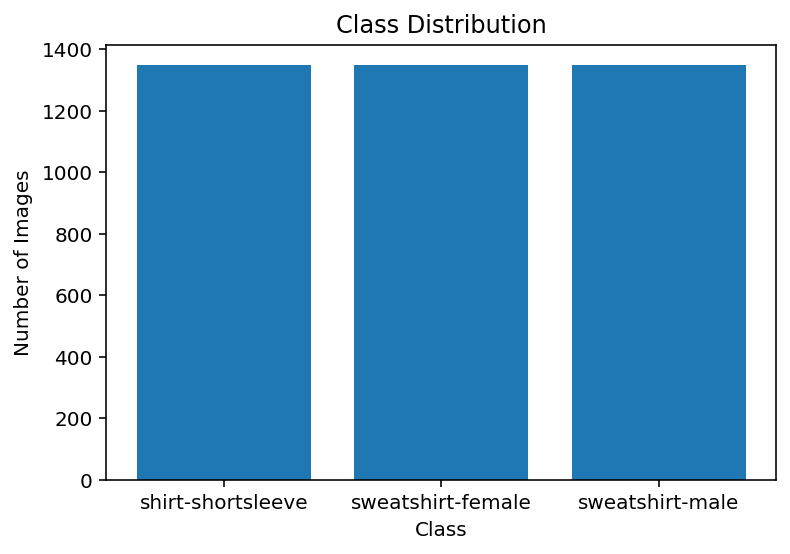

In [ ]:
import matplotlib.pyplot as plt

class_counts = {}
for label in label_names:
    class_counts[label] = len(os.listdir(os.path.join(dataset_path, label)))

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

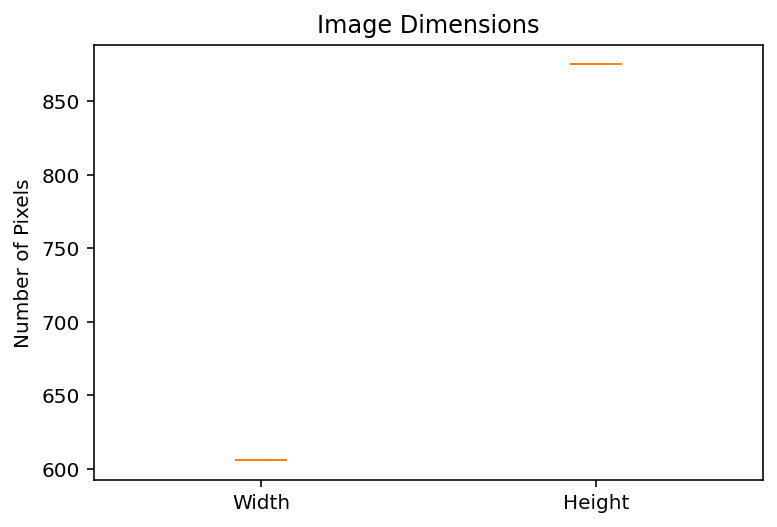

In [ ]:
import numpy as np

widths, heights = zip(*dimensions)
widths = np.array(widths)
heights = np.array(heights)

fig, ax = plt.subplots()
ax.boxplot([widths, heights])
ax.set_xticklabels(['Width', 'Height'])
ax.set_ylabel("Number of Pixels")
ax.set_title("Image Dimensions")
plt.show()

In [ ]:
import os
from PIL import Image

label_names1 = os.listdir(dataset_path)

dimensions_count = {}

for label in label_names1:
    label_path = os.path.join(dataset_path, label)
    images = os.listdir(label_path)
    for image_file in images:
        image_path = os.path.join(label_path, image_file)
        with Image.open(image_path) as img:
            dim = img.size
            if dim not in dimensions_count:
                dimensions_count[dim] = 1
            else:
                dimensions_count[dim] += 1

print("Image dimensions and number of images:")
for dim, count in dimensions_count.items():
    print(dim, ":", count)

Image dimensions and number of images:
(606, 875) : 4041


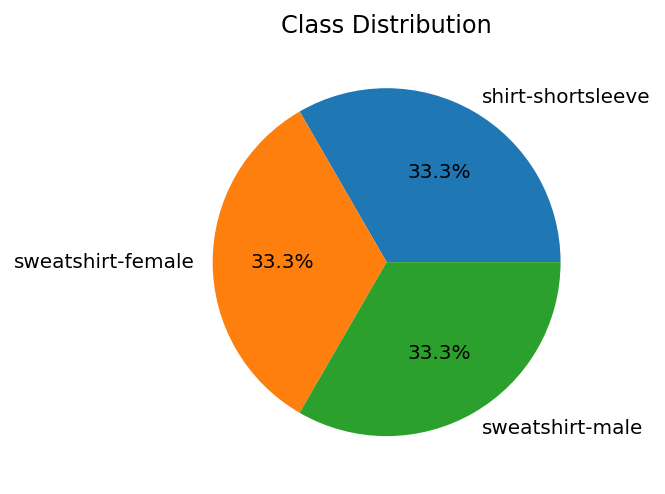

In [ ]:
if labeling == "Labeled" and balance == "Balanced":
    plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
    plt.title("Class Distribution")
    plt.show()

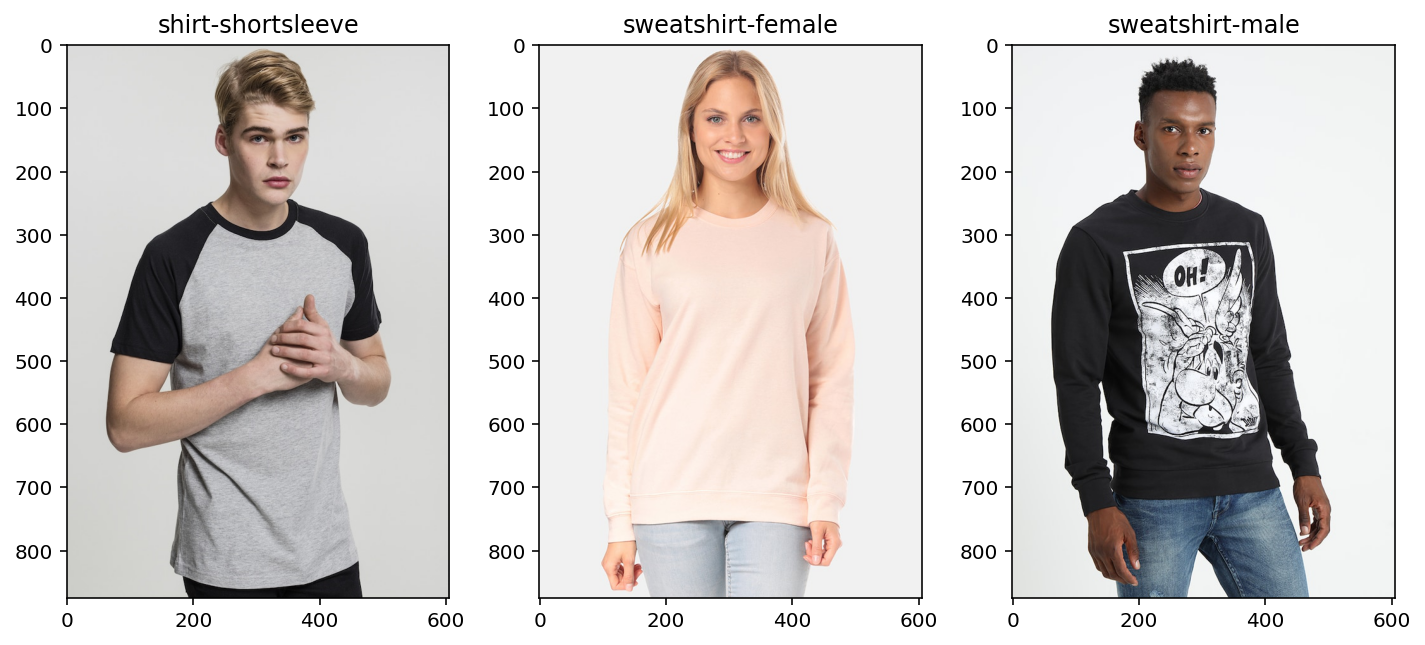

In [ ]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(10, 6))
axs = axs.ravel()

for i in range(3):
    label = label_names[i]
    img_path = os.path.join(dataset_path, label, random.choice(os.listdir(os.path.join(dataset_path, label))))
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(label)

plt.tight_layout()
plt.show()

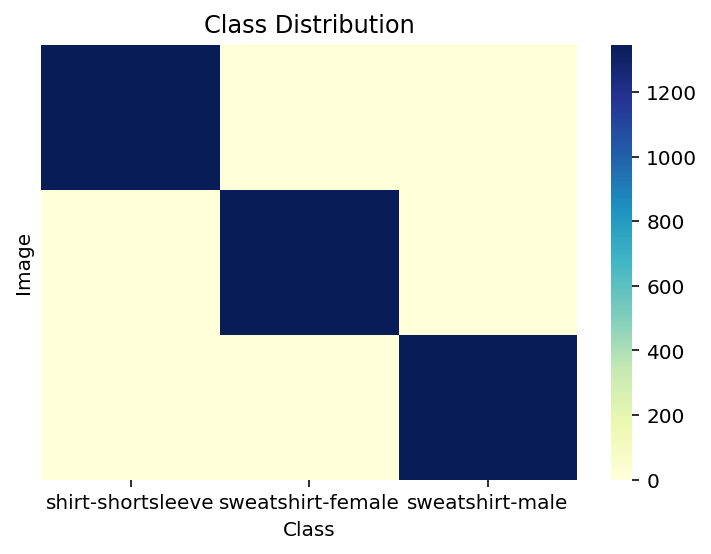

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = {}
for label in label_names:
    class_counts[label] = len(os.listdir(os.path.join(dataset_path, label)))

class_dist = []
for label in label_names:
    dist = [0] * len(label_names)
    dist[label_names.index(label)] = class_counts[label]
    class_dist.append(dist)

sns.heatmap(class_dist, xticklabels=label_names, yticklabels=False, cmap="YlGnBu")
plt.xlabel("Class")
plt.ylabel("Image")
plt.title("Class Distribution")
plt.show()

### Data Preparation

In [ ]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import splitfolders

In [ ]:
# splitting of the datasets into train,test and valid
splitfolders.ratio("C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/Dataset3",
                   output="C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data",
                   seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

Copying files: 4041 files [00:10, 370.64 files/s]


In [ ]:
#This code run through the test folder that exist within the split folder
#to extract all the images from the test folder and returning it tothe same test folder
# the catch is that  it still retains the original folders('trouser,shirt.shoe)
#but all the extracted image are subfolder('trouser,shirt,shoe) are on the same level in the main test folder
import os
import shutil

# Set the path to the input and output directory for the test folder
input_output_dir = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test"

# Create the output directory for the new test folder if it doesn't already exist
if not os.path.exists(input_output_dir):
    os.makedirs(input_output_dir)

# Loop through each class folder in the input directory for the test folder
for class_folder in os.listdir(input_output_dir):
    # Skip any files in the input directory that are not folders
    if not os.path.isdir(os.path.join(input_output_dir, class_folder)):
        continue

    # Loop through each image in the class folder and copy it to the output directory for the new test folder
    for img_file in os.listdir(os.path.join(input_output_dir, class_folder)):
        if not img_file.endswith('.jpg'):  # skip non-image files
            continue
        src_path = os.path.join(input_output_dir, class_folder, img_file)
        dst_path = os.path.join(input_output_dir, img_file)
        shutil.copyfile(src_path, dst_path)

In [ ]:
# this code creats a new subfolder "unknown"  within the test mainfolder
# moves the 3 class subfolders into the unknown subfolder
#only one subfolder "unknown" will exist within the test subfolder
#unknown folder now has 3 subfolders
import os
import shutil

source_folder = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test"
destination_folder = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test/unknown"

# Create the destination subfolder if it doesn't already exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of all files in the source folder
files = os.listdir(source_folder)

# Move each file from the source folder to the destination subfolder

for file_name in files:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    try:
        shutil.move(source_path, destination_path)
    except shutil.Error:
        print(f"Successful")
        pass


Successful


In [ ]:
folder_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test"

# Delete all directories except for one "unknown"
unknown_count = 0
for root, dirs, files in os.walk(folder_path, topdown=False):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        if dir == "unknown":
            unknown_count += 1
            if unknown_count > 1:
                print(f"Deleting directory {dir_path}")
                shutil.rmtree(dir_path)
        elif os.path.relpath(dir_path, folder_path) != ".":
            print(f"Deleting directory {dir_path}")
            shutil.rmtree(dir_path)

# Delete all images outside of "unknown"
image_extensions = [".jpg", ".jpeg", ".png", ".gif"]
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path) and not file.startswith("unknown") and os.path.splitext(file_path)[1] in image_extensions:
        #print(f"Deleting file {file_path}")
        os.remove(file_path)

Deleting directory C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test\unknown\shirt-shortsleeve
Deleting directory C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test\unknown\sweatshirt-female
Deleting directory C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test\unknown\sweatshirt-male


In [ ]:
#This delete the existing subfolders in the previous code
import os
import shutil

folder_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test"

# Delete all directories except for "unknown"
for root, dirs, files in os.walk(folder_path, topdown=False):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        if dir != "unknown" and os.path.relpath(dir_path, folder_path) != ".":
            print(f"Deleting directory {dir_path}")
            shutil.rmtree(dir_path)

# Delete all images outside of "unknown"
image_extensions = [".jpg", ".jpeg", ".png", ".gif"]
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path) and not file.startswith("unknown") and os.path.splitext(file_path)[1] in image_extensions:
        print(f"Deleting file {file_path}")
        os.remove(file_path)

In [ ]:
# Set the paths for the train and validation folders
train_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/train"
valid_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/val"

# Create a new folder to store the combined data
combined_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/train_val"
os.makedirs(combined_path, exist_ok=True)

# Copy the files from the train and validation folders to the new combined folder
for class_folder in os.listdir(train_path):
    class_path = os.path.join(train_path, class_folder)
    combined_class_path = os.path.join(combined_path, class_folder)
    os.makedirs(combined_class_path, exist_ok=True)
    for file in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file), os.path.join(combined_class_path, file))

for class_folder in os.listdir(valid_path):
    class_path = os.path.join(valid_path, class_folder)
    combined_class_path = os.path.join(combined_path, class_folder)
    os.makedirs(combined_class_path, exist_ok=True)
    for file in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file), os.path.join(combined_class_path, file))

#### Dataset Description of train, test, validation and train_validation

In [ ]:
import os

# Define the paths to your datasets
train_path = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/train'
val_path = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/val'
test_path = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/test'
train_val_path = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/train_val'

# Get the number of samples and classes in each dataset
def get_dataset_info(path):
    num_samples = 0
    classes = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
                num_samples += 1
        for dir in dirs:
            if dir not in classes:
                classes.append(dir)
    return num_samples, len(classes)

# Get the size and class distribution of each dataset
train_size, num_classes_train = get_dataset_info(train_path)
val_size, num_classes_val = get_dataset_info(val_path)
test_size, num_classes_test = get_dataset_info(test_path)
train_val_size, num_classes_train_val = get_dataset_info(train_val_path)

# Print the descriptions of each dataset
print(f'Training set size: {train_size} samples with {num_classes_train} classes')
print(f'Validation set size: {val_size} samples with {num_classes_val} classes')
print(f'Testing set size: {test_size} samples with {num_classes_test} classes')
print(f'Training and Validation set size: {train_val_size} samples with {num_classes_train_val} classes')


Training set size: 2424 samples with 3 classes
Validation set size: 807 samples with 3 classes
Testing set size: 810 samples with 1 classes
Training and Validation set size: 3231 samples with 3 classes


In [ ]:
# Get the class distribution of each dataset
def get_class_distribution(dataset_path):
    class_counts = {}
    for root, _, files in os.walk(dataset_path):
        for file in files:
            class_name = os.path.basename(root)
            if class_name not in class_counts:
                class_counts[class_name] = 0
            class_counts[class_name] += 1
    return class_counts

train_dist = get_class_distribution(train_path)
val_dist = get_class_distribution(val_path)
test_dist = get_class_distribution(test_path)
train_val_dist = get_class_distribution(train_val_path)

# Print the class distribution of each dataset
print('Class distribution of training set:')
for class_name, count in train_dist.items():
    print(f'{class_name}: {count} samples')
print()

print('Class distribution of validation set:')
for class_name, count in val_dist.items():
    print(f'{class_name}: {count} samples')
print()

print('Class distribution of testing set:')
for class_name, count in test_dist.items():
    print(f'{class_name}: {count} samples')
print()

print('Class distribution of training and validation set:')
for class_name, count in train_val_dist.items():
    print(f'{class_name}: {count} samples')
print()

Class distribution of training set:
shirt-shortsleeve: 808 samples
sweatshirt-female: 808 samples
sweatshirt-male: 808 samples

Class distribution of validation set:
shirt-shortsleeve: 269 samples
sweatshirt-female: 269 samples
sweatshirt-male: 269 samples

Class distribution of testing set:
unknown: 810 samples

Class distribution of training and validation set:
shirt-shortsleeve: 1077 samples
sweatshirt-female: 1077 samples
sweatshirt-male: 1077 samples



### DEEP LEARNING PROJECT IMPLEMENTATION - Varying Batch size across AlexNet, VGG16, and ResNet152

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### AlexNet model Batch size 32

In [ ]:
batch_size = 32
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])



In [ ]:
data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]




In [ ]:
number_of_classes = len(train_ds.classes)
print(number_of_classes)

3


In [ ]:
train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
#This is an additional code to check the mean and standard deviation of your dataset
#- you can then use it to replace the values in transforms.Normalize to improve your work.

means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in train_ds:
    means += torch.mean(img, dim = (1,2))
    stds += torch.std(img, dim = (1,2))

means /= len(train_ds)
stds /= len(train_ds)

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Calculated means: tensor([0.8833, 0.8840, 1.0772])
Calculated stds: tensor([1.1245, 1.1897, 1.1825])


In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

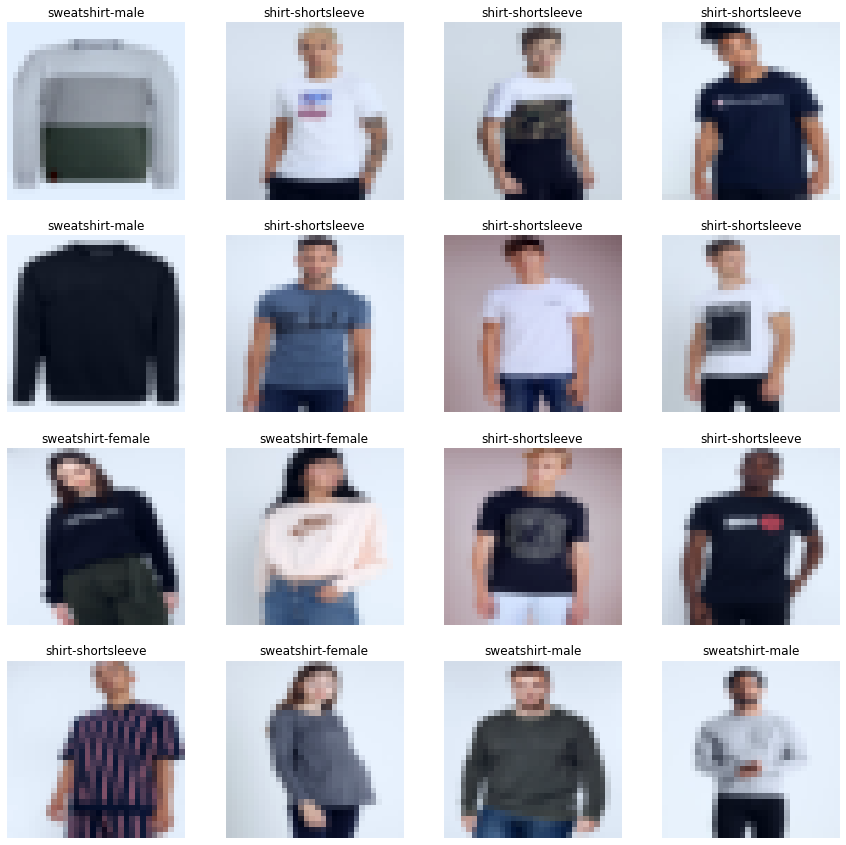

In [ ]:
N_IMAGES = 20

indices = random.sample(range(len(train_ds)), N_IMAGES)

images, labels = zip(*[train_ds[i] for i in indices])

classes = train_ds.classes

plot_images(images, labels, classes)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1),  # in_channels, out_channels, kernel_size, stride, padding
            nn.MaxPool2d(2),  # kernel_size
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h




In [ ]:
OUTPUT_DIM = 3

model = AlexNet(OUTPUT_DIM)

def initialize_parameters(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
        nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, gain=nn.init.calculate_gain('relu'))
        nn.init.constant_(m.bias.data, 0)

model.apply(initialize_parameters)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU(inplace=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

This is to display the number of trainable parameters.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 23,243,587 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

CHOSE_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=CHOSE_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 0s
	Train Loss: 4.852 | Train Acc: 38.12%
	 Val. Loss: 1.049 |  Val. Acc: 46.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 59s
	Train Loss: 0.906 | Train Acc: 56.58%
	 Val. Loss: 0.744 |  Val. Acc: 65.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 59s
	Train Loss: 0.602 | Train Acc: 74.62%
	 Val. Loss: 0.603 |  Val. Acc: 74.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 59s
	Train Loss: 0.494 | Train Acc: 78.08%
	 Val. Loss: 0.526 |  Val. Acc: 74.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 59s
	Train Loss: 0.407 | Train Acc: 83.83%
	 Val. Loss: 0.423 |  Val. Acc: 83.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 0s
	Train Loss: 0.361 | Train Acc: 86.04%
	 Val. Loss: 0.446 |  Val. Acc: 83.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 59s
	Train Loss: 0.314 | Train Acc: 87.88%
	 Val. Loss: 0.409 |  Val. Acc: 83.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 0s
	Train Loss: 0.286 | Train Acc: 89.38%
	 Val. Loss: 0.490 |  Val. Acc: 80.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 59s
	Train Loss: 0.263 | Train Acc: 89.08%
	 Val. Loss: 0.477 |  Val. Acc: 85.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 0s
	Train Loss: 0.199 | Train Acc: 92.92%
	 Val. Loss: 0.367 |  Val. Acc: 87.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 1s
	Train Loss: 0.215 | Train Acc: 92.21%
	 Val. Loss: 0.365 |  Val. Acc: 86.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 0s
	Train Loss: 0.158 | Train Acc: 94.25%
	 Val. Loss: 0.591 |  Val. Acc: 85.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 0s
	Train Loss: 0.190 | Train Acc: 93.08%
	 Val. Loss: 0.432 |  Val. Acc: 85.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 1s
	Train Loss: 0.161 | Train Acc: 93.88%
	 Val. Loss: 0.491 |  Val. Acc: 84.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 0s
	Train Loss: 0.123 | Train Acc: 95.25%
	 Val. Loss: 0.527 |  Val. Acc: 87.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 1s
	Train Loss: 0.127 | Train Acc: 95.58%
	 Val. Loss: 0.682 |  Val. Acc: 84.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 2s
	Train Loss: 0.143 | Train Acc: 95.00%
	 Val. Loss: 0.413 |  Val. Acc: 87.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 1s
	Train Loss: 0.114 | Train Acc: 95.75%
	 Val. Loss: 0.542 |  Val. Acc: 84.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 1s
	Train Loss: 0.119 | Train Acc: 95.33%
	 Val. Loss: 0.703 |  Val. Acc: 79.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 1s
	Train Loss: 0.090 | Train Acc: 97.25%
	 Val. Loss: 0.573 |  Val. Acc: 85.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 1s
	Train Loss: 0.067 | Train Acc: 97.04%
	 Val. Loss: 0.635 |  Val. Acc: 85.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 1s
	Train Loss: 0.083 | Train Acc: 97.50%
	 Val. Loss: 0.569 |  Val. Acc: 84.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 1s
	Train Loss: 0.149 | Train Acc: 95.04%
	 Val. Loss: 0.569 |  Val. Acc: 84.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 2s
	Train Loss: 0.099 | Train Acc: 96.62%
	 Val. Loss: 0.713 |  Val. Acc: 84.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 0s
	Train Loss: 0.091 | Train Acc: 96.58%
	 Val. Loss: 0.661 |  Val. Acc: 86.88%


#### Losses and Accuracy plots.

In [ ]:
import matplotlib.pyplot as plt

# Reset the matplotlib settings to defaults
plt.rcdefaults()

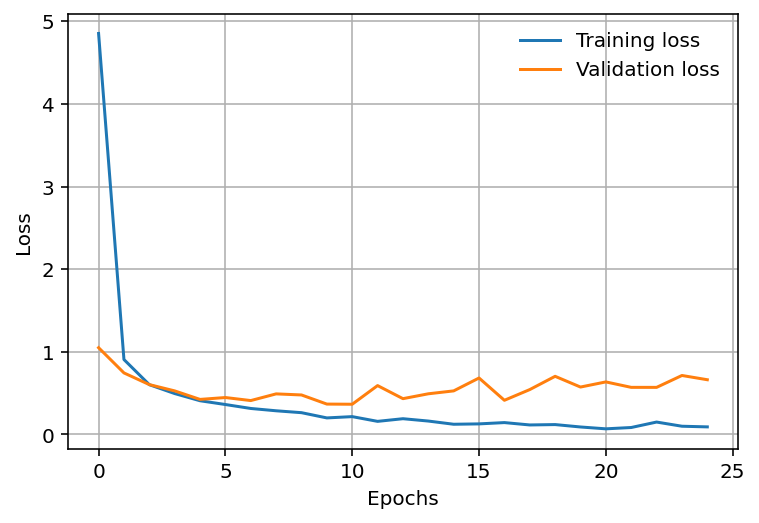

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

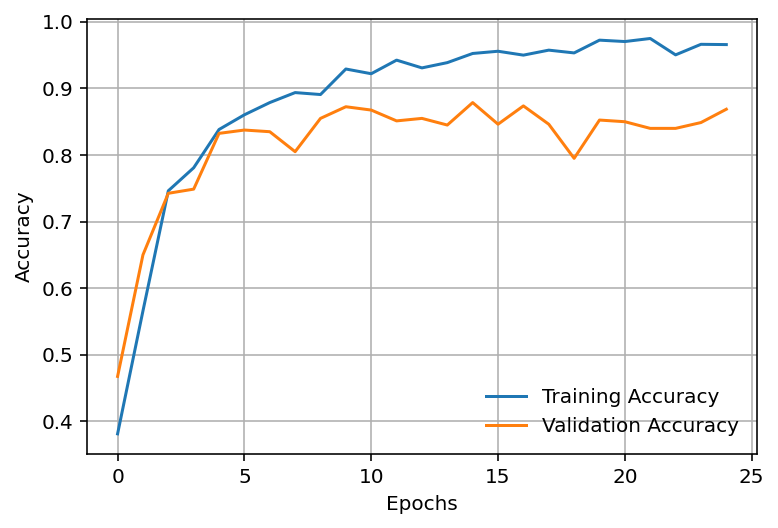

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

In [ ]:
path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model"

In [ ]:
os.mkdir(path)

In [ ]:
pred_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions"
os.mkdir(pred_path )

Loading the best model

In [ ]:
model.load_state_dict(torch.load('best-model.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter, device)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_AlexNet32.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_AlexNet32.csv')
predicted_csv.sample(30)

id  shirt-shortsleeve  sweatshirt-female  \
78     shirt-shortsleeve (14)       9.999737e-01       6.851383e-07   
729      sweatshirt-male (63)       2.261113e-04       1.370330e-02   
160   shirt-shortsleeve (518)       9.999000e-01       7.756990e-06   
285  sweatshirt-female (1106)       5.093557e-02       3.201668e-01   
156   shirt-shortsleeve (502)       2.978249e-01       3.735592e-02   
616     sweatshirt-male (135)       5.241044e-05       9.452678e-03   
201   shirt-shortsleeve (692)       6.363825e-01       2.003242e-01   
542    sweatshirt-male (1010)       1.198669e-04       1.101932e-02   
391  sweatshirt-female (1991)       1.363279e-05       9.977453e-01   
362  sweatshirt-female (1650)       1.472191e-03       9.935479e-01   
126   shirt-shortsleeve (364)       9.999999e-01       6.978749e-10   
578    sweatshirt-male (1134)       2.974736e-02       3.694952e-01   
72   shirt-shortsleeve (1320)       9.999070e-01       3.334294e-06   
548     sweatshirt-male (103)       1.160275e-01       2.168006e-01   
536   sweatshirt-female (958)       7.749319e-04       8.102129e-01   
770     sweatshirt-male (835)       1.071599e-04       9.456010e-04   
556     sweatshirt-male (107)       4.005522e-04       3.089406e-01   
444  sweatshirt-female (2396)       1.557210e-07       2.443288e-02   
60   shirt-shortsleeve (1285)       9.999889e-01       3.008049e-08   
176   shirt-shortsleeve (578)       9.968399e-01       1.971181e-04   
146   shirt-shortsleeve (459)       5.933937e-01       6.790866e-02   
403  sweatshirt-female (2060)       2.454835e-08       9.999982e-01   
320  sweatshirt-female (1337)       7.673951e-04       9.601212e-01   
780     sweatshirt-male (874)       2.301617e-05       3.129817e-02   
143   shirt-shortsleeve (447)       4.234275e-01       4.078042e-01   
732     sweatshirt-male (637)       2.827223e-02       6.477358e-01   
443  sweatshirt-female (2394)       2.051490e-06       9.820515e-01   
516   sweatshirt-female (822)       1.175448e-03       7.178068e-01   
523   sweatshirt-female (845)       7.182738e-06       9.999449e-01   
199   shirt-shortsleeve (685)       9.999931e-01       1.018298e-07   

     sweatshirt-male  
78      2.559035e-05  
729     9.860706e-01  
160     9.221872e-05  
285     6.288977e-01  
156     6.648191e-01  
616     9.904949e-01  
201     1.632932e-01  
542     9.888608e-01  
391     2.240977e-03  
362     4.979960e-03  
126     1.206947e-07  
578     6.007574e-01  
72      8.960885e-05  
548     6.671718e-01  
536     1.890123e-01  
770     9.989472e-01  
556     6.906588e-01  
444     9.755670e-01  
60      1.110108e-05  
176     2.963002e-03  
146     3.386976e-01  
403     1.841459e-06  
320     3.911139e-02  
780     9.686788e-01  
143     1.687682e-01  
732     3.239920e-01  
443     1.794628e-02  
516     2.810177e-01  
523     4.794138e-05  
199     6.784444e-06

In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

Index(['id', 'shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male'], dtype='object')

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
18   shirt-shortsleeve (1076)                  1                  0   
785     sweatshirt-male (899)                  0                  0   
134   shirt-shortsleeve (400)                  1                  0   
299  sweatshirt-female (1175)                  0                  1   
474    sweatshirt-female (50)                  0                  1   
607    sweatshirt-male (1303)                  0                  0   
719     sweatshirt-male (583)                  0                  0   
375  sweatshirt-female (1785)                  0                  1   
548     sweatshirt-male (103)                  0                  0   
642     sweatshirt-male (251)                  0                  0   
766      sweatshirt-male (81)                  0                  0   
179   shirt-shortsleeve (583)                  1                  0   
564    sweatshirt-male (1095)                  0                  0   
690     sweatshirt-male (484)                  0                  0   
110   shirt-shortsleeve (294)                  1                  0   
679     sweatshirt-male (435)                  0                  0   
414  sweatshirt-female (2146)                  0                  1   
62   shirt-shortsleeve (1288)                  1                  0   
422  sweatshirt-female (2228)                  0                  1   
101    shirt-shortsleeve (24)                  1                  0   

     sweatshirt-male  
18                 0  
785                1  
134                0  
299                0  
474                0  
607                1  
719                1  
375                0  
548                1  
642                1  
766                1  
179                0  
564                1  
690                1  
110                0  
679                1  
414                0  
62                 0  
422                0  
101                0

In [ ]:
ground_path = "C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth"
os.mkdir(ground_path)

In [ ]:
Ground_truth.to_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

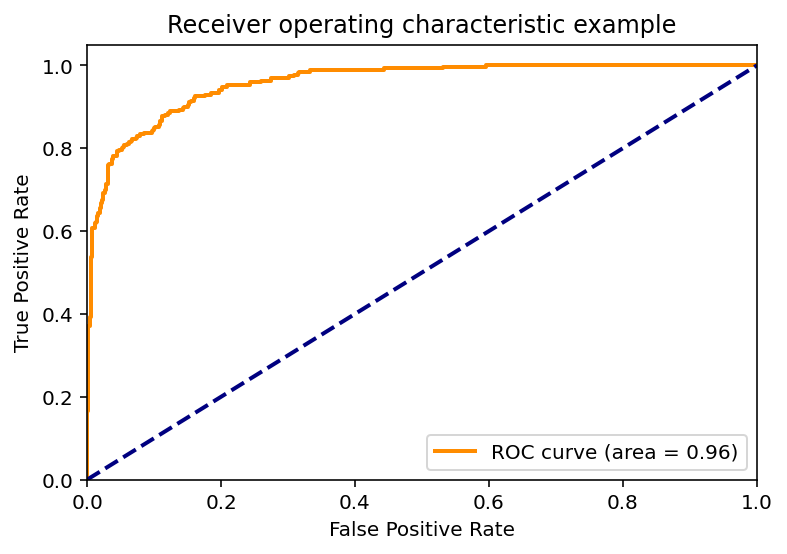

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\2224565932.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


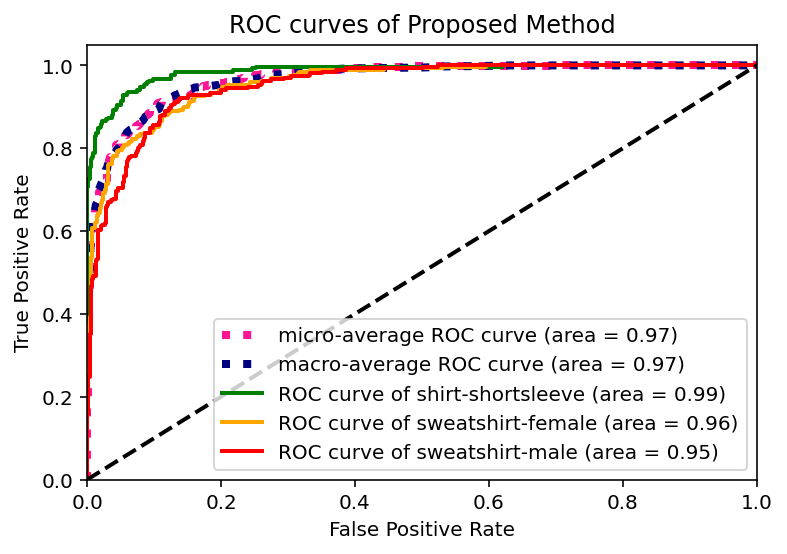

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

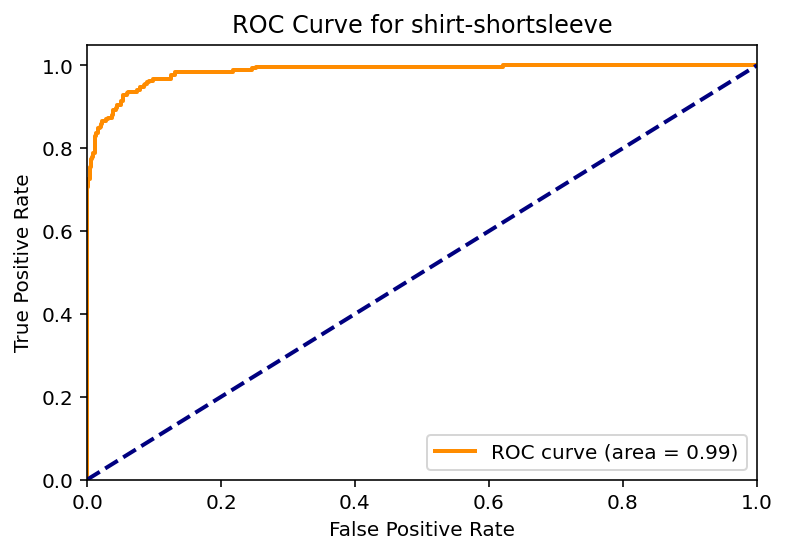

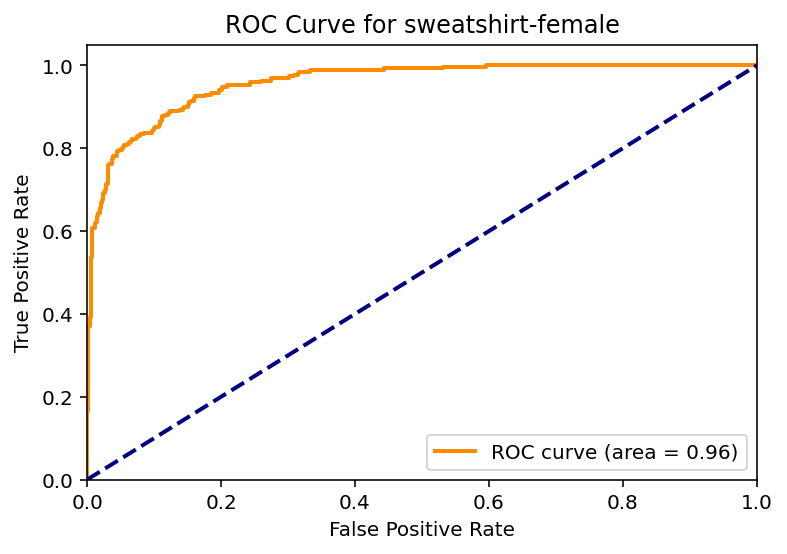

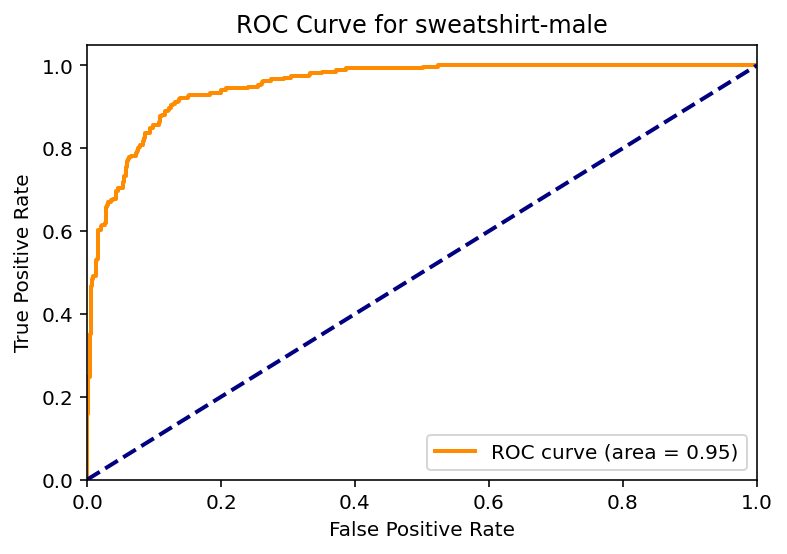

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
 class_name = os.path.basename(root)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[238  17  15]
 [  8 225  37]
 [ 11  30 229]]
[0 1 2]
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


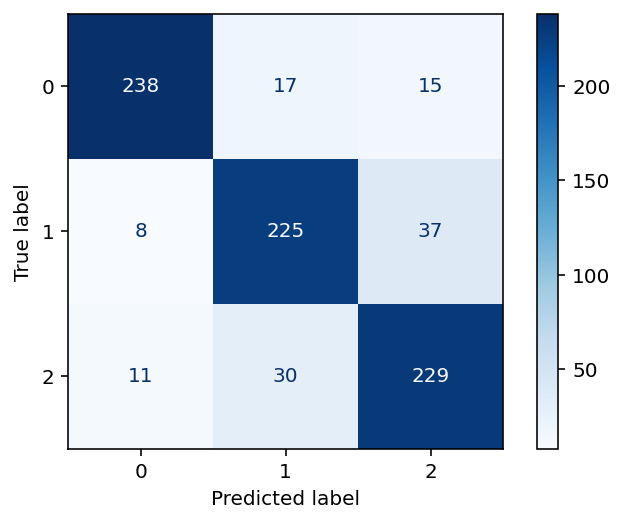

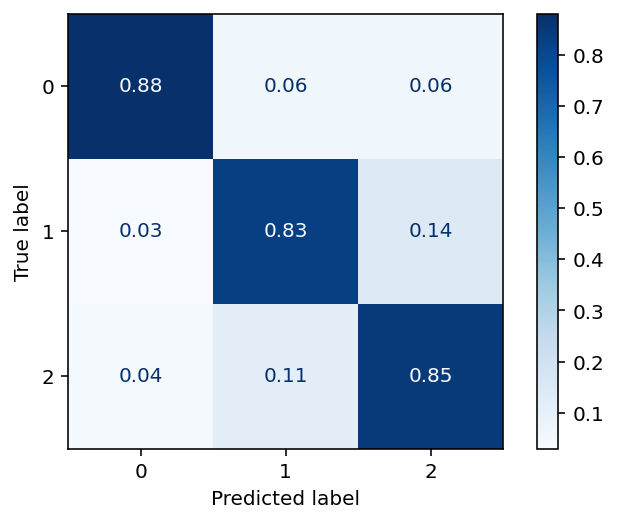

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

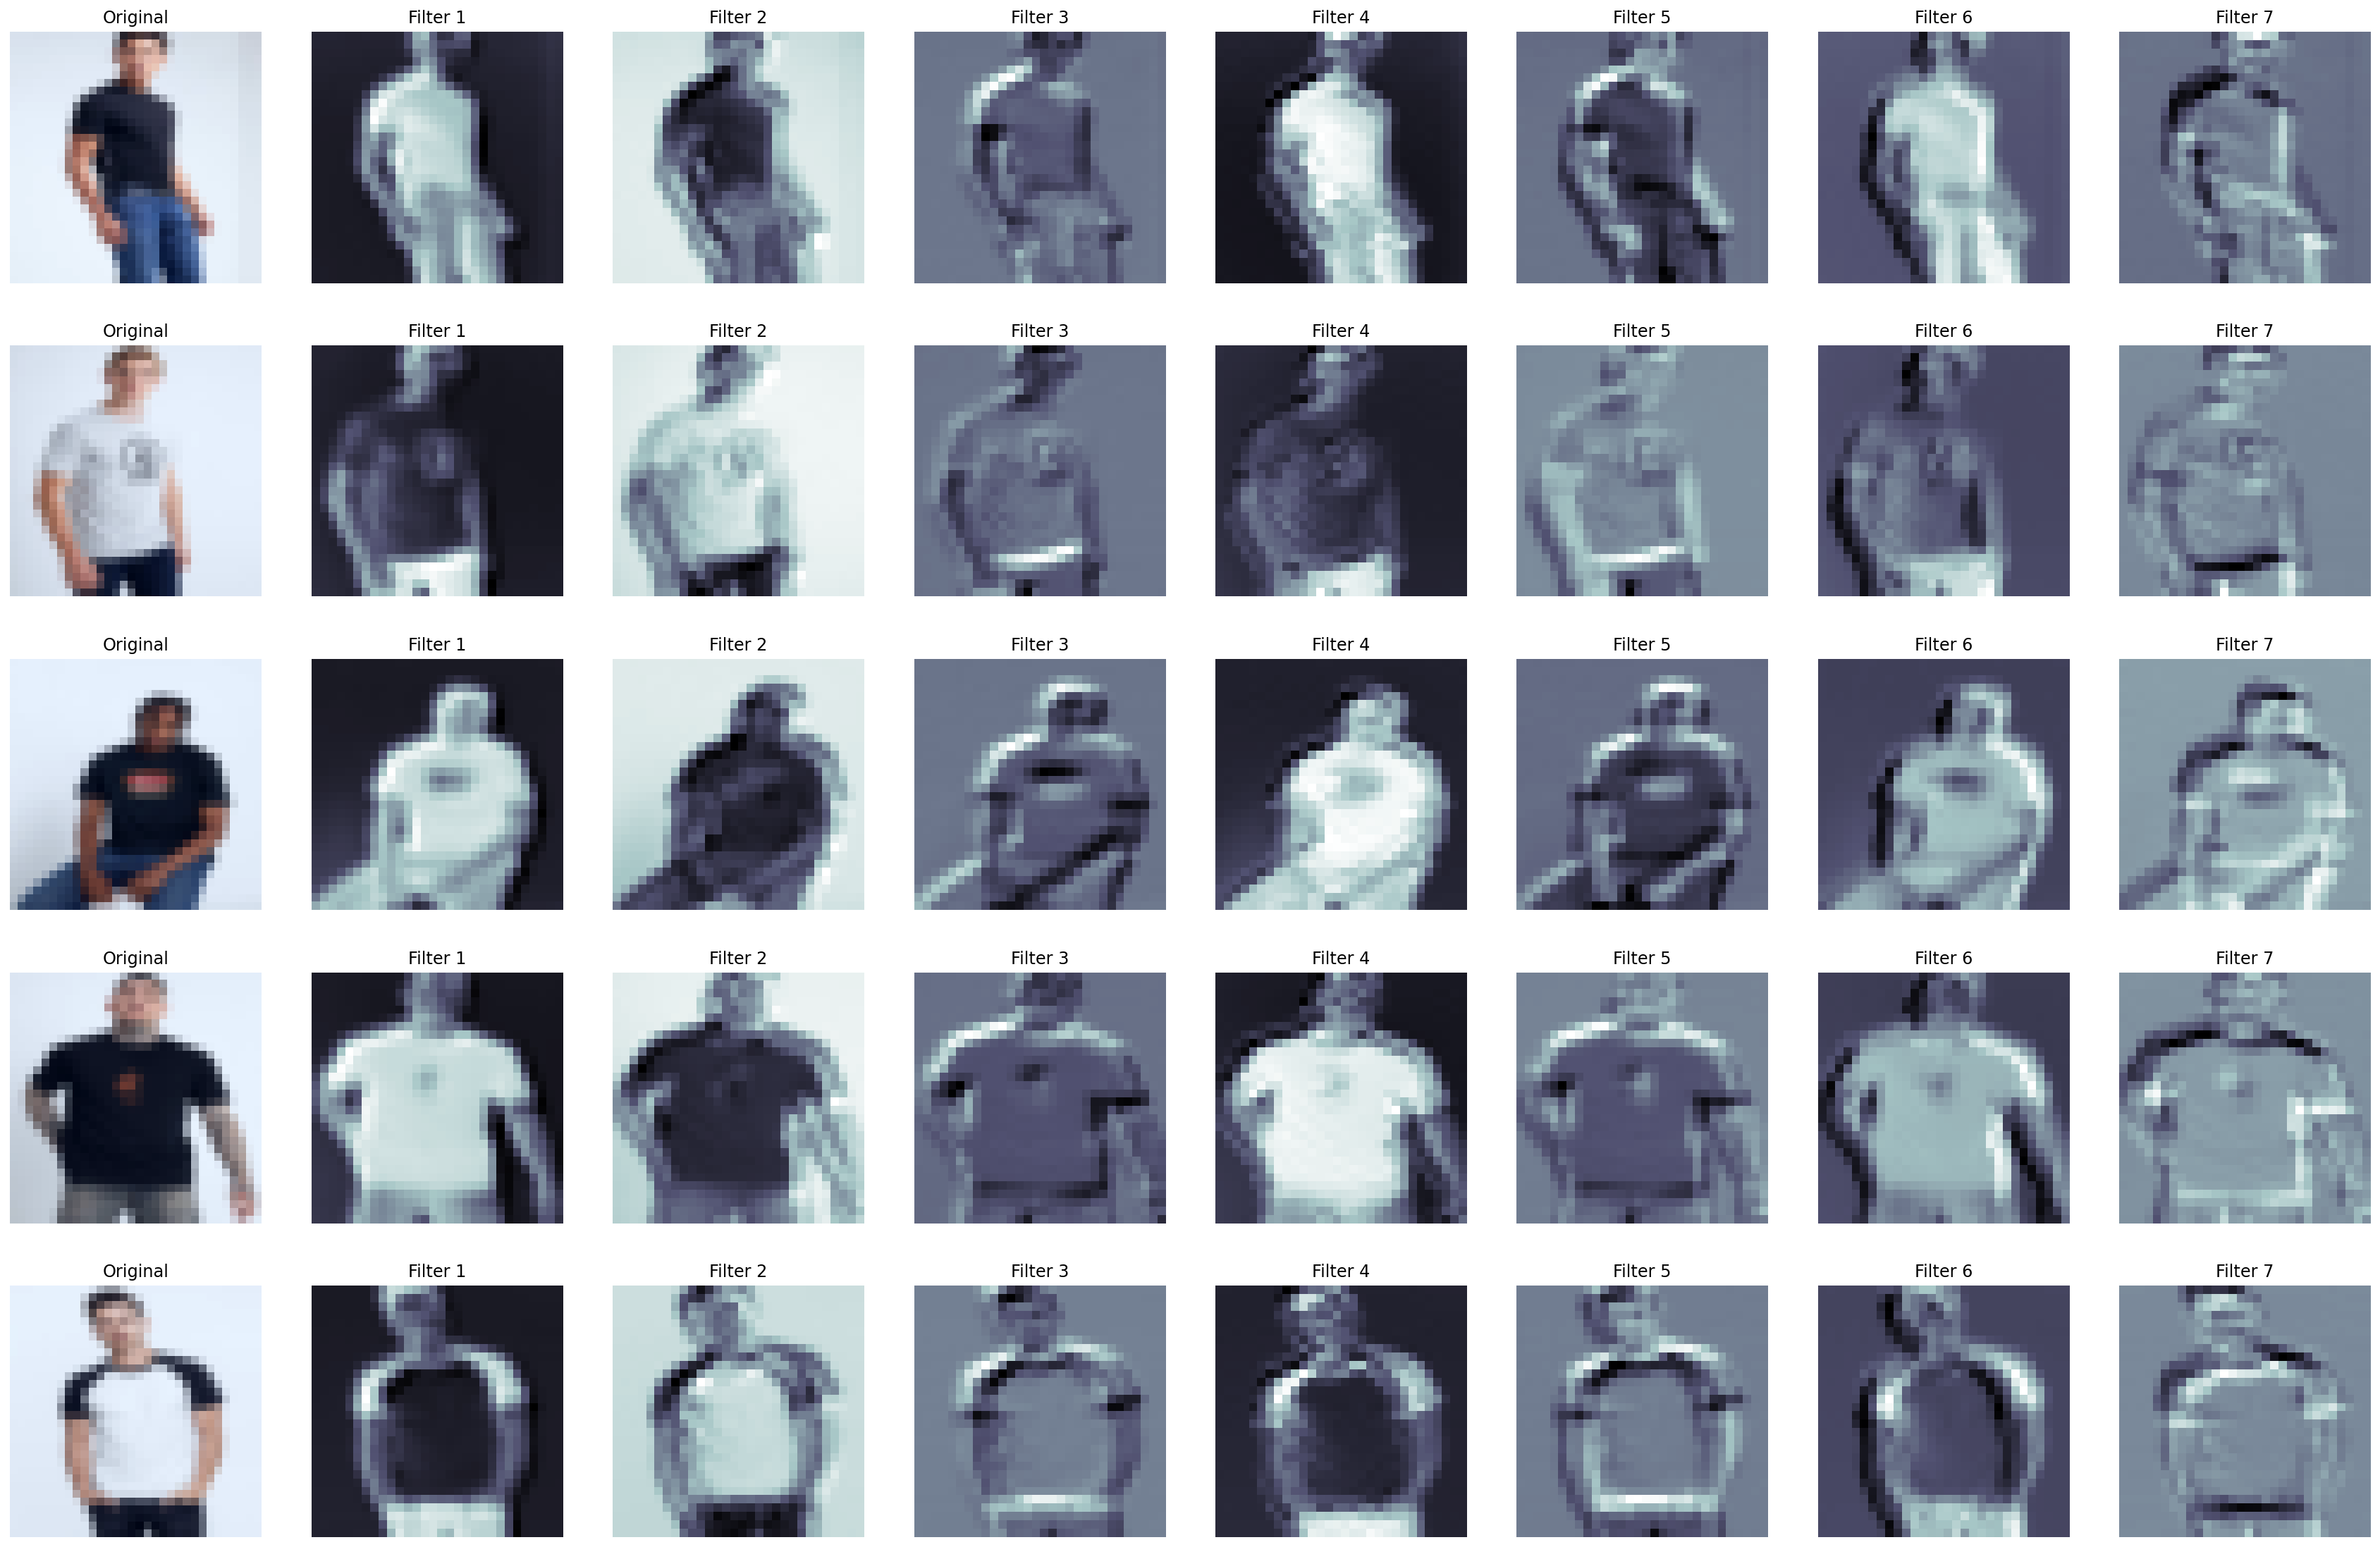

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

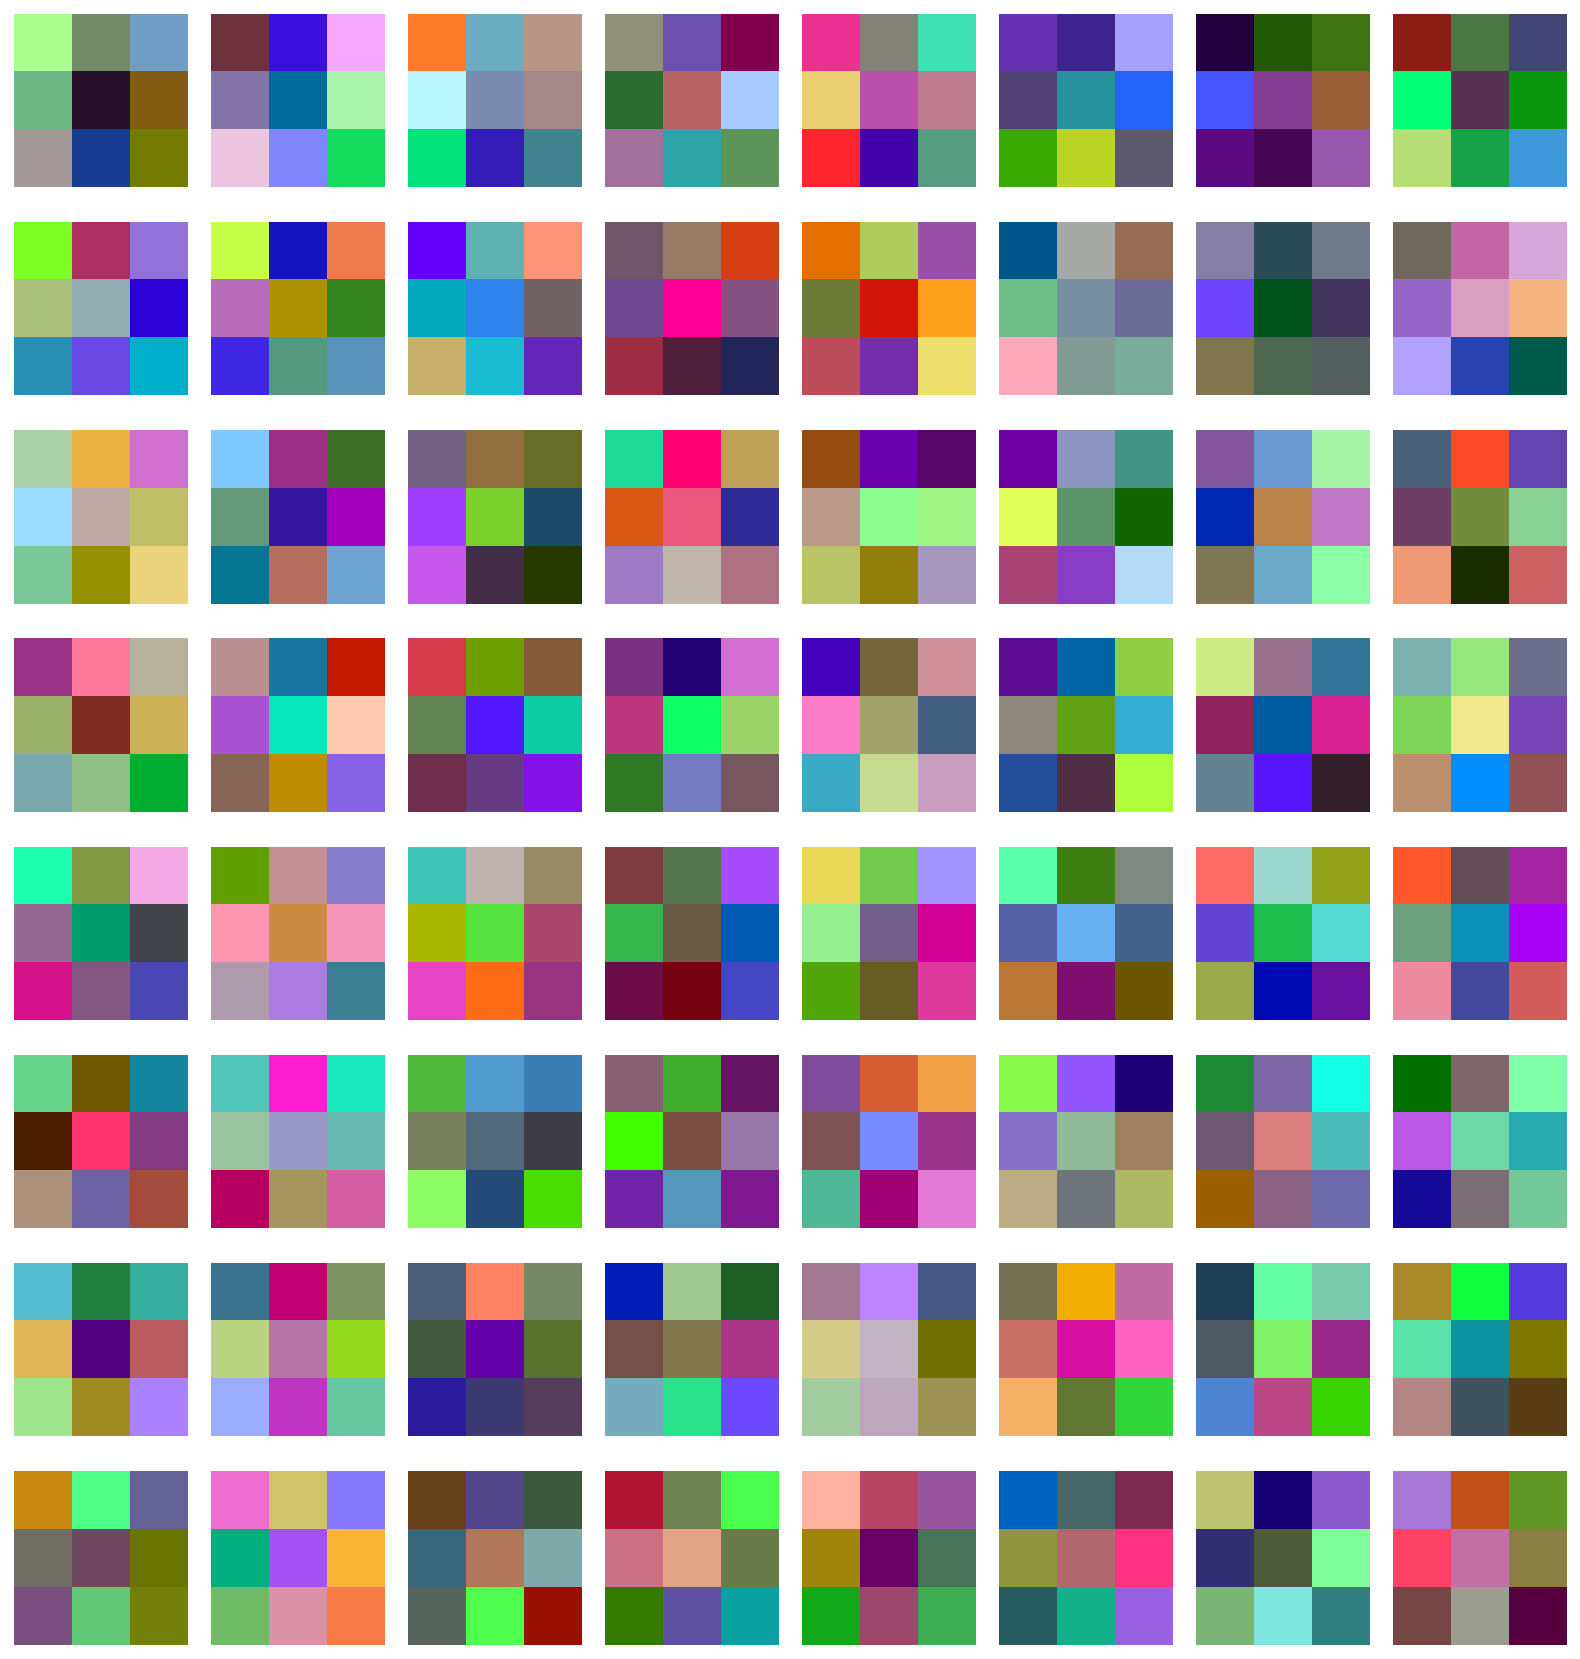

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.93      0.88      0.90       270
sweatshirt-female       0.83      0.83      0.83       270
  sweatshirt-male       0.81      0.85      0.83       270

         accuracy                           0.85       810
        macro avg       0.86      0.85      0.85       810
     weighted avg       0.86      0.85      0.85       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.854320987654321


### AlexNet batch size 64

In [ ]:
batch_size = 64
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]


train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1),  # in_channels, out_channels, kernel_size, stride, padding
            nn.MaxPool2d(2),  # kernel_size
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h


OUTPUT_DIM = 3

model = AlexNet(OUTPUT_DIM)

def initialize_parameters(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
        nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, gain=nn.init.calculate_gain('relu'))
        nn.init.constant_(m.bias.data, 0)

model.apply(initialize_parameters)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU(inplace=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

CHOSE_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=CHOSE_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-alex64-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 54s
	Train Loss: 6.544 | Train Acc: 39.78%
	 Val. Loss: 1.032 |  Val. Acc: 39.97%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 54s
	Train Loss: 0.970 | Train Acc: 51.94%
	 Val. Loss: 0.867 |  Val. Acc: 61.33%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 54s
	Train Loss: 0.686 | Train Acc: 69.89%
	 Val. Loss: 0.566 |  Val. Acc: 77.60%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 54s
	Train Loss: 0.574 | Train Acc: 75.93%
	 Val. Loss: 0.485 |  Val. Acc: 80.08%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 54s
	Train Loss: 0.451 | Train Acc: 80.95%
	 Val. Loss: 0.447 |  Val. Acc: 80.99%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 53s
	Train Loss: 0.422 | Train Acc: 83.57%
	 Val. Loss: 0.588 |  Val. Acc: 73.83%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 54s
	Train Loss: 0.338 | Train Acc: 86.66%
	 Val. Loss: 0.414 |  Val. Acc: 83.72%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 53s
	Train Loss: 0.302 | Train Acc: 87.75%
	 Val. Loss: 0.406 |  Val. Acc: 84.77%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 55s
	Train Loss: 0.241 | Train Acc: 90.46%
	 Val. Loss: 0.522 |  Val. Acc: 83.20%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 53s
	Train Loss: 0.214 | Train Acc: 91.98%
	 Val. Loss: 0.472 |  Val. Acc: 85.81%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 55s
	Train Loss: 0.179 | Train Acc: 93.33%
	 Val. Loss: 0.512 |  Val. Acc: 82.94%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 54s
	Train Loss: 0.190 | Train Acc: 92.57%
	 Val. Loss: 0.458 |  Val. Acc: 84.38%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 54s
	Train Loss: 0.154 | Train Acc: 94.09%
	 Val. Loss: 0.526 |  Val. Acc: 83.98%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 53s
	Train Loss: 0.202 | Train Acc: 92.15%
	 Val. Loss: 0.541 |  Val. Acc: 85.29%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 53s
	Train Loss: 0.119 | Train Acc: 95.52%
	 Val. Loss: 0.567 |  Val. Acc: 86.33%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 54s
	Train Loss: 0.104 | Train Acc: 96.41%
	 Val. Loss: 0.489 |  Val. Acc: 86.59%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 53s
	Train Loss: 0.105 | Train Acc: 96.54%
	 Val. Loss: 0.583 |  Val. Acc: 85.55%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 54s
	Train Loss: 0.125 | Train Acc: 95.40%
	 Val. Loss: 0.557 |  Val. Acc: 83.20%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 54s
	Train Loss: 0.105 | Train Acc: 95.90%
	 Val. Loss: 0.539 |  Val. Acc: 86.85%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 54s
	Train Loss: 0.066 | Train Acc: 97.59%
	 Val. Loss: 0.892 |  Val. Acc: 81.77%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 53s
	Train Loss: 0.096 | Train Acc: 96.49%
	 Val. Loss: 0.628 |  Val. Acc: 86.85%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 54s
	Train Loss: 0.054 | Train Acc: 98.02%
	 Val. Loss: 0.728 |  Val. Acc: 86.20%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 54s
	Train Loss: 0.111 | Train Acc: 96.54%
	 Val. Loss: 0.516 |  Val. Acc: 86.20%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 53s
	Train Loss: 0.129 | Train Acc: 95.10%
	 Val. Loss: 0.522 |  Val. Acc: 84.77%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 53s
	Train Loss: 0.056 | Train Acc: 98.06%
	 Val. Loss: 0.622 |  Val. Acc: 88.15%


#### Losses and Accuracy AlexNet lr 1e-2 plots.

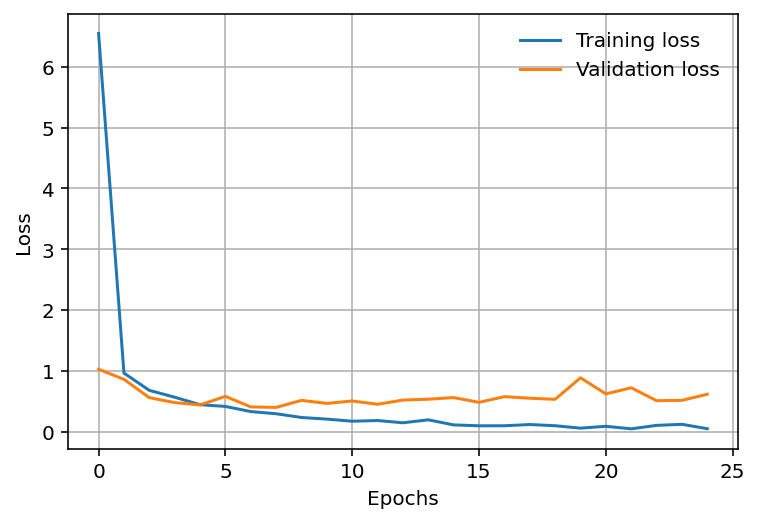

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

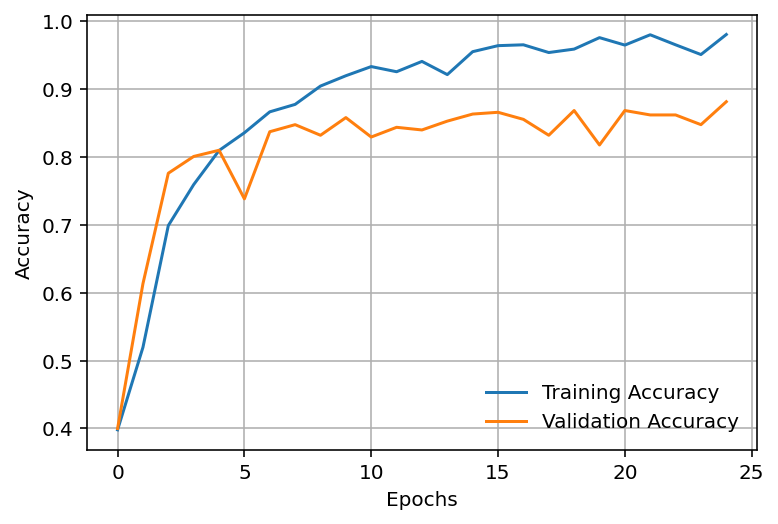

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-alex64-model.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter, device)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_AlexNet64.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_AlexNet64.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
192   shirt-shortsleeve (637)       9.945382e-01       8.152785e-05   
202   shirt-shortsleeve (693)       9.999950e-01       8.350394e-09   
488   sweatshirt-female (640)       2.153011e-02       8.529160e-01   
730     sweatshirt-male (635)       6.375985e-01       9.500642e-03   
683     sweatshirt-male (447)       3.609707e-04       7.655641e-03   
26   shirt-shortsleeve (1098)       9.735655e-01       1.102006e-03   
417  sweatshirt-female (2162)       4.346635e-02       8.382831e-01   
306  sweatshirt-female (1214)       4.113588e-04       9.882305e-01   
347  sweatshirt-female (1573)       2.216781e-01       2.628529e-01   
114   shirt-shortsleeve (314)       9.193991e-01       5.430656e-03   
660     sweatshirt-male (349)       9.453008e-03       4.268999e-01   
263   shirt-shortsleeve (963)       9.933807e-01       1.250848e-04   
74   shirt-shortsleeve (1337)       9.999986e-01       1.012712e-09   
33   shirt-shortsleeve (1121)       9.780915e-01       4.495965e-04   
312  sweatshirt-female (1248)       6.795973e-07       9.999844e-01   
92    shirt-shortsleeve (197)       9.965863e-01       2.538284e-04   
602    sweatshirt-male (1288)       3.717936e-03       6.325754e-02   
699      sweatshirt-male (51)       9.858942e-04       1.619736e-01   
462   sweatshirt-female (347)       1.737363e-02       8.194590e-01   
577    sweatshirt-male (1133)       6.533858e-04       2.728301e-02   

     sweatshirt-male  
192         0.005380  
202         0.000005  
488         0.125554  
730         0.352901  
683         0.991983  
26          0.025333  
417         0.118251  
306         0.011358  
347         0.515469  
114         0.075170  
660         0.563647  
263         0.006494  
74          0.000001  
33          0.021459  
312         0.000015  
92          0.003160  
602         0.933025  
699         0.837040  
462         0.163167  
577         0.972064

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

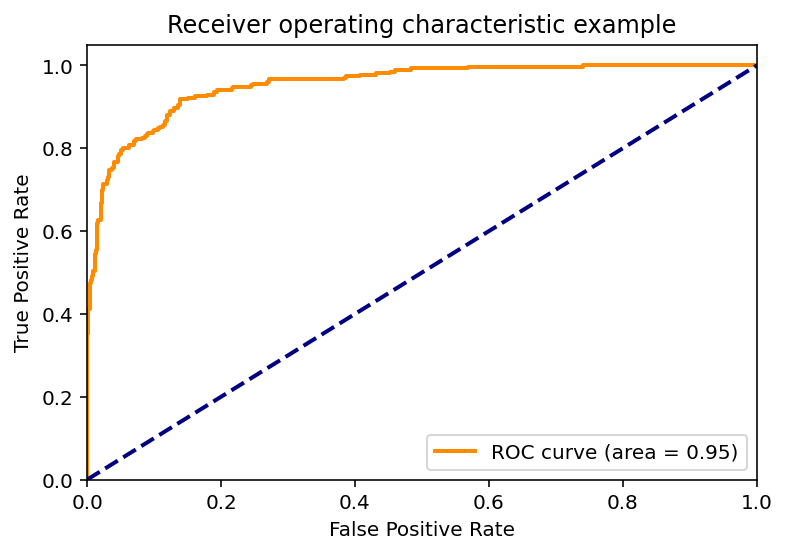

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\243218172.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


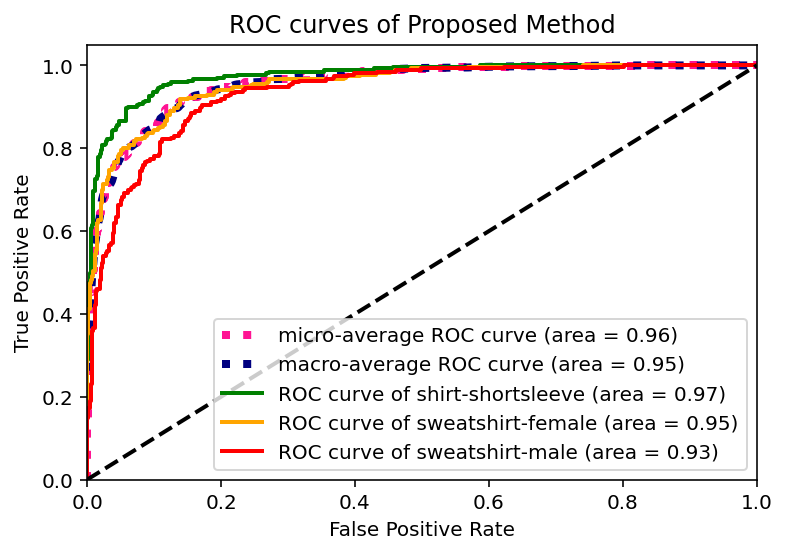

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))



plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

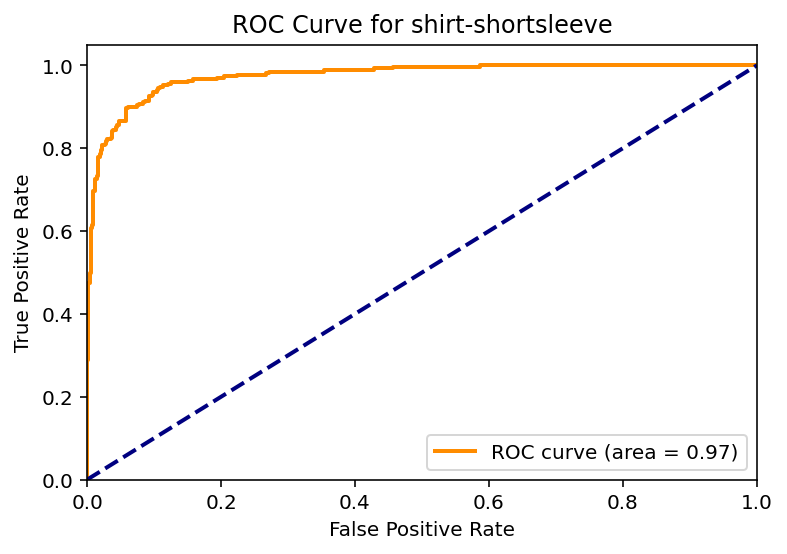

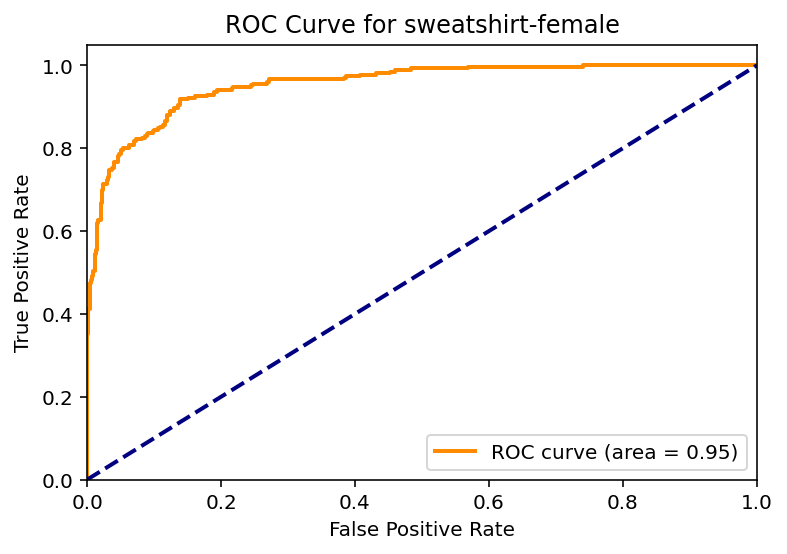

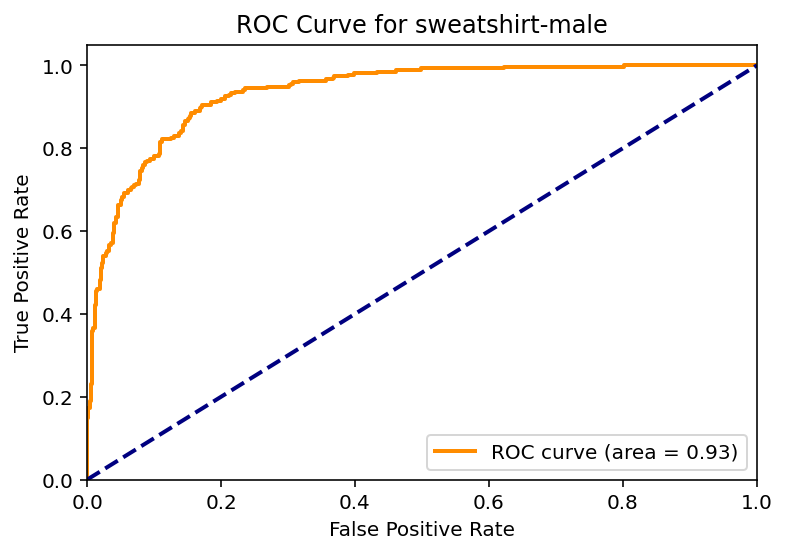

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[233  11  26]
 [  8 225  37]
 [ 19  42 209]]
[0 1 2]
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

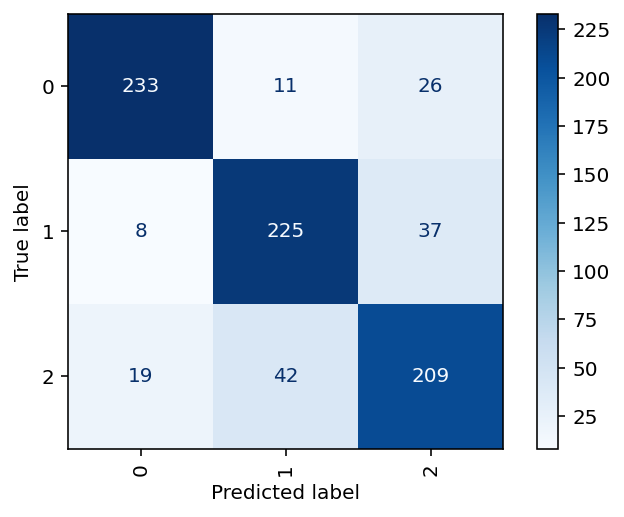

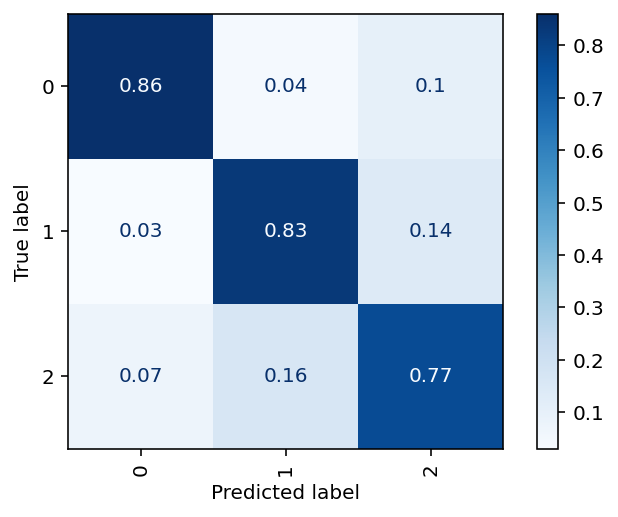

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)




C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270


cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

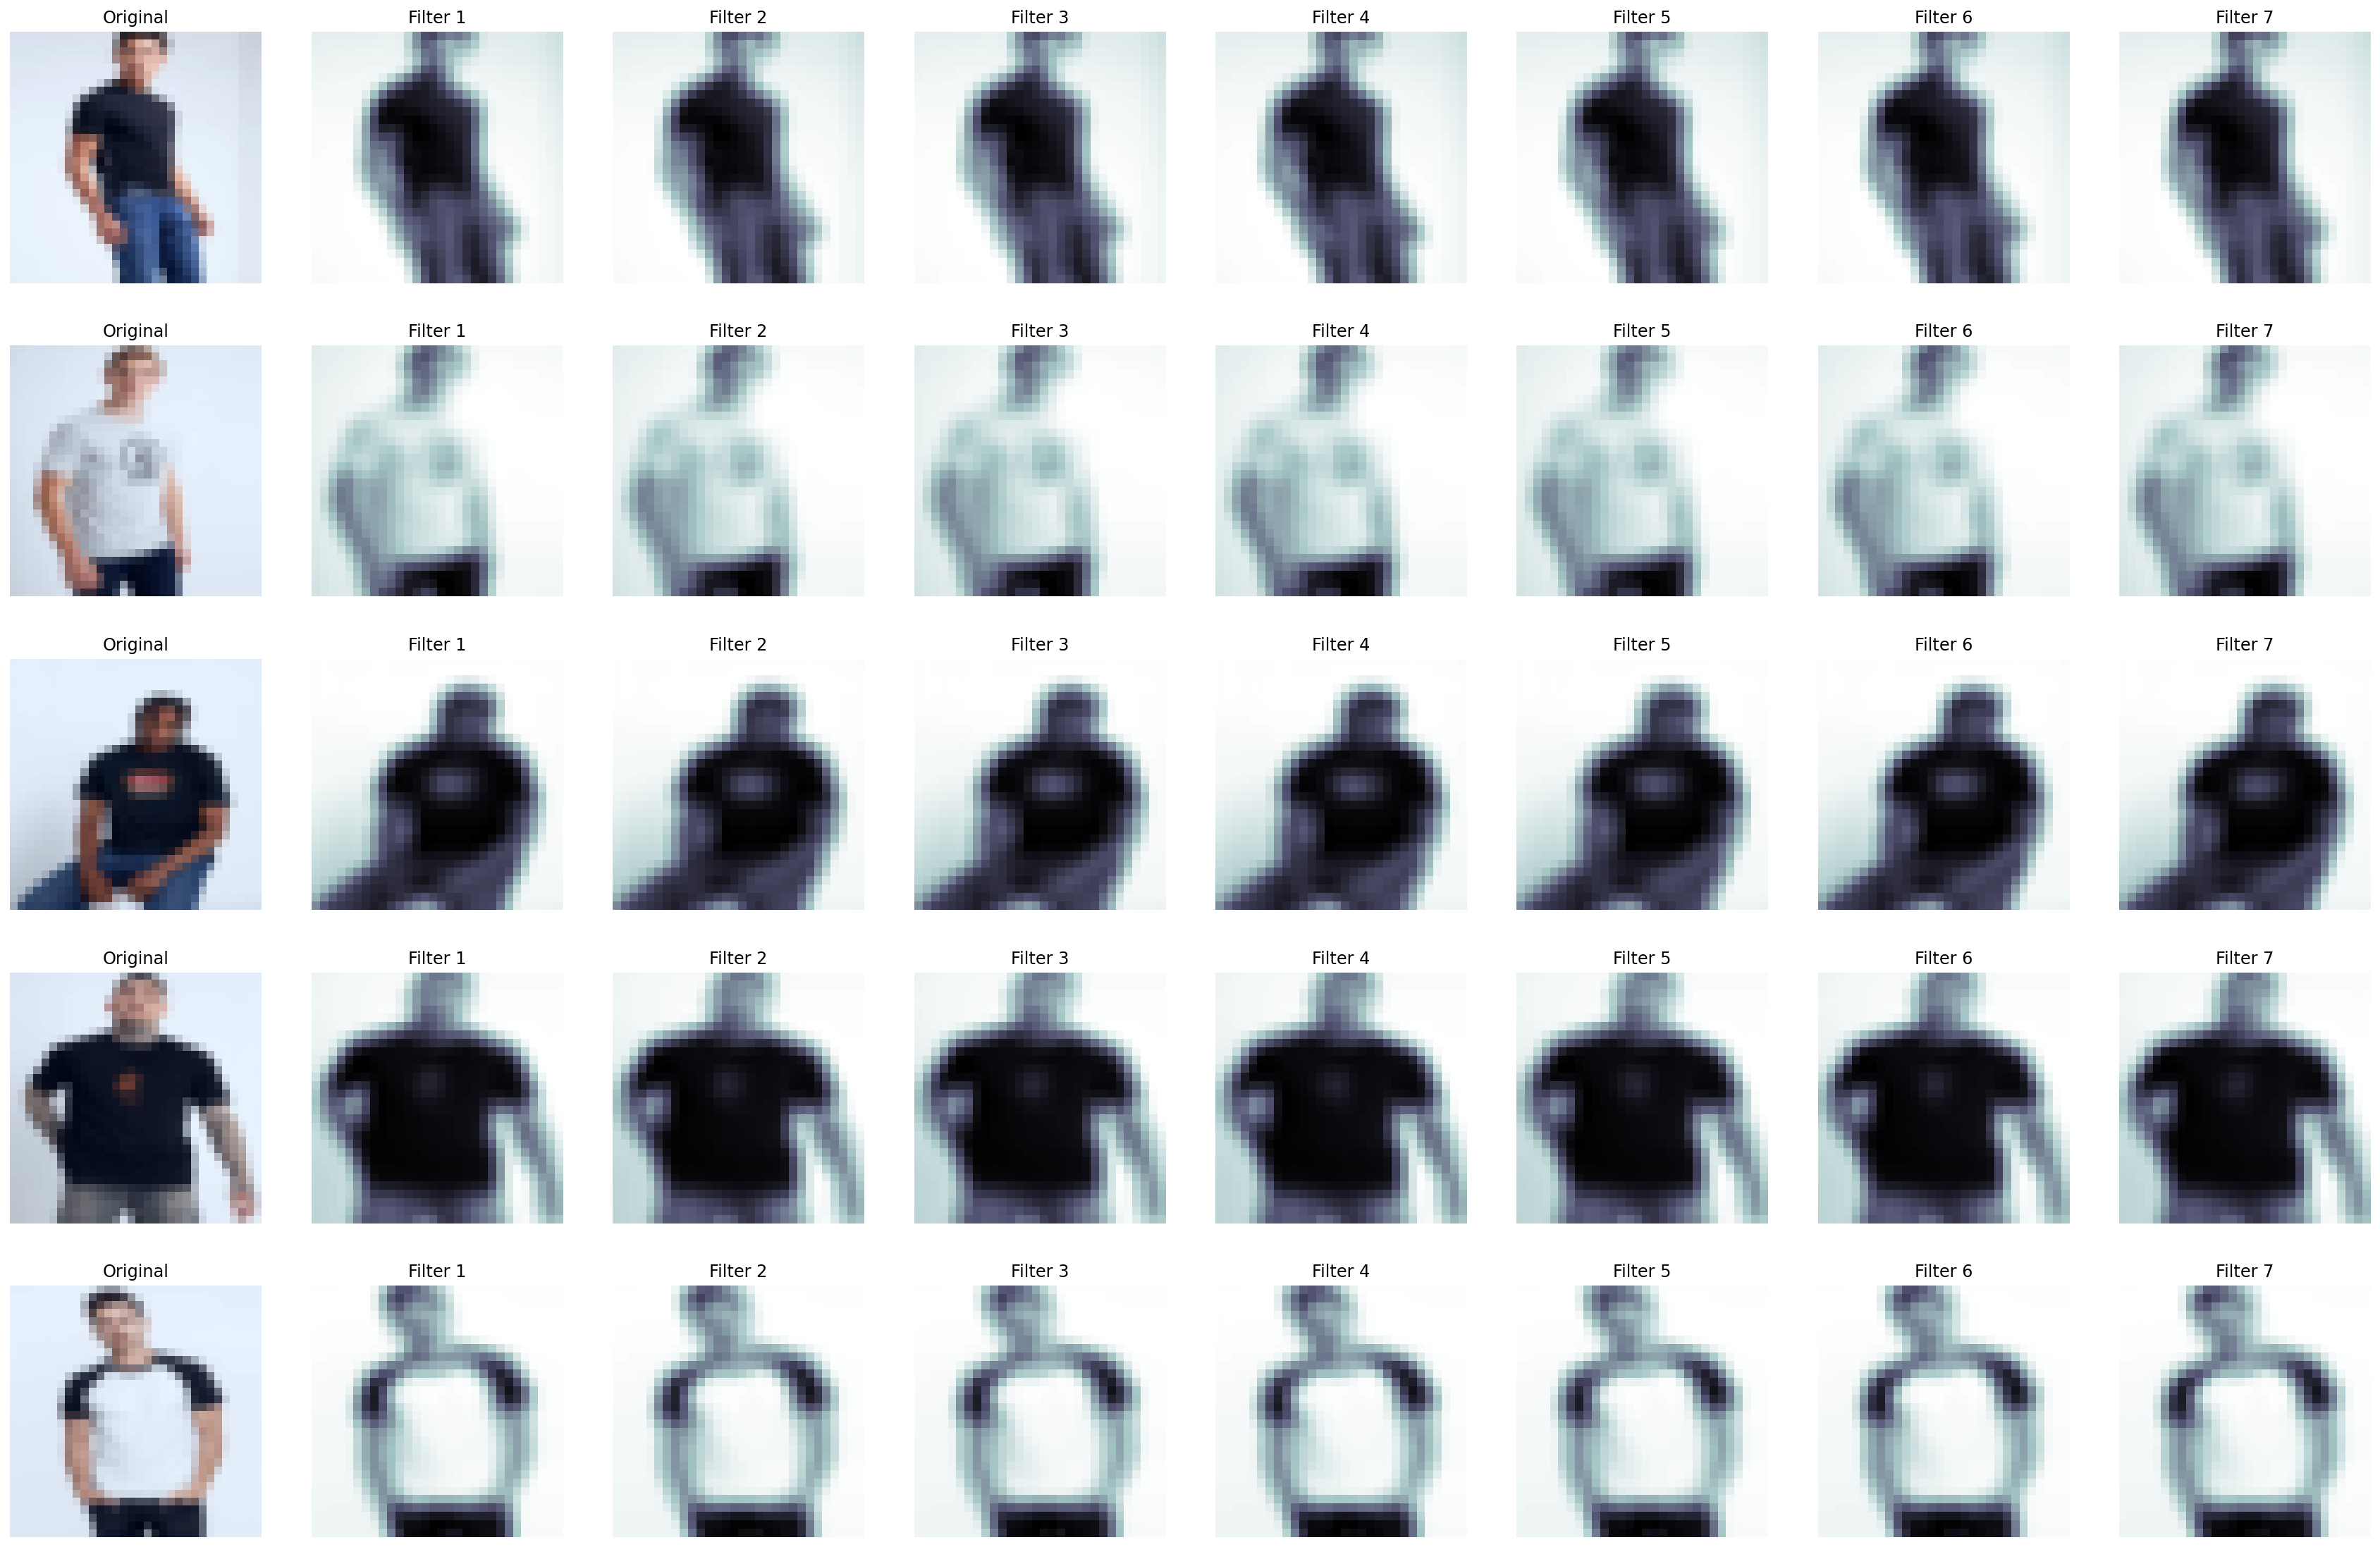

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

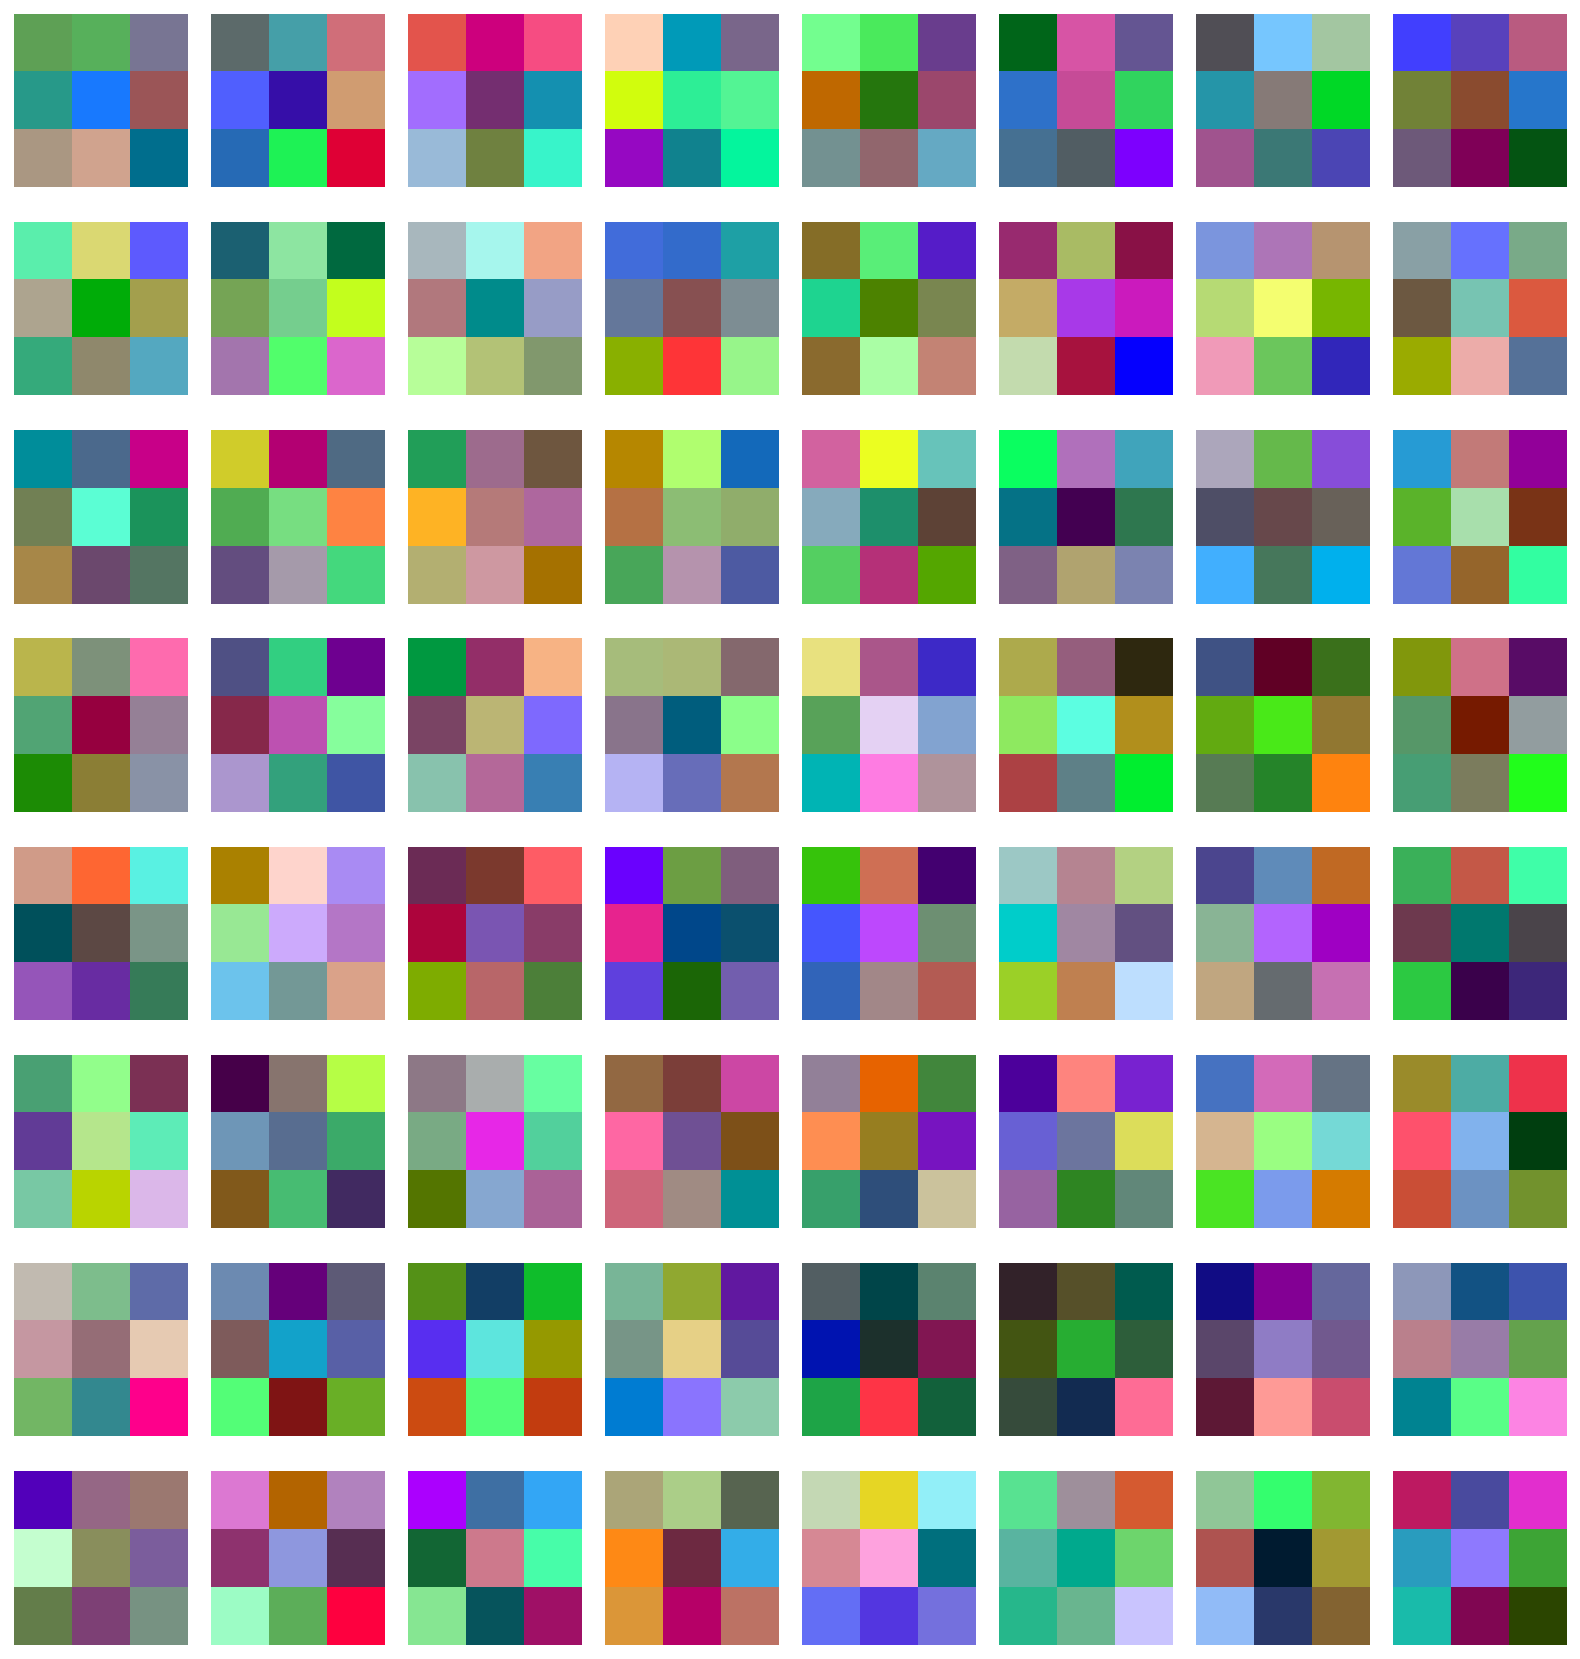

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report
class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.90      0.86      0.88       270
sweatshirt-female       0.81      0.83      0.82       270
  sweatshirt-male       0.77      0.77      0.77       270

         accuracy                           0.82       810
        macro avg       0.82      0.82      0.82       810
     weighted avg       0.82      0.82      0.82       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.8234567901234567


### AlexNet batch size 128

In [ ]:
batch_size = 128
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]


train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1),  # in_channels, out_channels, kernel_size, stride, padding
            nn.MaxPool2d(2),  # kernel_size
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h



OUTPUT_DIM = 3

model = AlexNet(OUTPUT_DIM)

def initialize_parameters(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
        nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, gain=nn.init.calculate_gain('relu'))
        nn.init.constant_(m.bias.data, 0)

model.apply(initialize_parameters)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU(inplace=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

CHOSE_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=CHOSE_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-model128.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 49s
	Train Loss: 13.934 | Train Acc: 36.55%
	 Val. Loss: 1.079 |  Val. Acc: 45.18%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 50s
	Train Loss: 1.051 | Train Acc: 45.01%
	 Val. Loss: 1.023 |  Val. Acc: 54.56%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 50s
	Train Loss: 0.981 | Train Acc: 52.13%
	 Val. Loss: 0.875 |  Val. Acc: 66.02%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 49s
	Train Loss: 0.826 | Train Acc: 62.93%
	 Val. Loss: 0.771 |  Val. Acc: 63.67%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 50s
	Train Loss: 0.670 | Train Acc: 71.14%
	 Val. Loss: 0.596 |  Val. Acc: 73.31%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 49s
	Train Loss: 0.585 | Train Acc: 75.95%
	 Val. Loss: 0.558 |  Val. Acc: 75.78%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 50s
	Train Loss: 0.451 | Train Acc: 81.68%
	 Val. Loss: 0.469 |  Val. Acc: 80.73%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 51s
	Train Loss: 0.429 | Train Acc: 82.64%
	 Val. Loss: 0.652 |  Val. Acc: 73.44%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 51s
	Train Loss: 0.372 | Train Acc: 85.68%
	 Val. Loss: 0.489 |  Val. Acc: 81.51%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 51s
	Train Loss: 0.279 | Train Acc: 89.67%
	 Val. Loss: 0.512 |  Val. Acc: 77.86%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 50s
	Train Loss: 0.245 | Train Acc: 91.02%
	 Val. Loss: 0.547 |  Val. Acc: 79.56%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 50s
	Train Loss: 0.216 | Train Acc: 92.40%
	 Val. Loss: 0.577 |  Val. Acc: 82.68%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 52s
	Train Loss: 0.185 | Train Acc: 92.84%
	 Val. Loss: 0.433 |  Val. Acc: 86.46%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 54s
	Train Loss: 0.139 | Train Acc: 94.75%
	 Val. Loss: 0.503 |  Val. Acc: 85.16%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 53s
	Train Loss: 0.173 | Train Acc: 92.80%
	 Val. Loss: 0.637 |  Val. Acc: 80.08%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 52s
	Train Loss: 0.143 | Train Acc: 94.79%
	 Val. Loss: 0.548 |  Val. Acc: 84.51%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 52s
	Train Loss: 0.146 | Train Acc: 94.40%
	 Val. Loss: 0.723 |  Val. Acc: 81.25%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 51s
	Train Loss: 0.156 | Train Acc: 94.23%
	 Val. Loss: 0.660 |  Val. Acc: 83.20%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 51s
	Train Loss: 0.106 | Train Acc: 96.05%
	 Val. Loss: 0.639 |  Val. Acc: 80.99%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 52s
	Train Loss: 0.127 | Train Acc: 95.44%
	 Val. Loss: 0.664 |  Val. Acc: 82.29%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 51s
	Train Loss: 0.077 | Train Acc: 97.14%
	 Val. Loss: 0.650 |  Val. Acc: 86.46%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 52s
	Train Loss: 0.056 | Train Acc: 97.96%
	 Val. Loss: 0.772 |  Val. Acc: 83.46%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 52s
	Train Loss: 0.077 | Train Acc: 97.44%
	 Val. Loss: 0.759 |  Val. Acc: 83.33%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 51s
	Train Loss: 0.052 | Train Acc: 98.26%
	 Val. Loss: 0.850 |  Val. Acc: 84.11%


Training:   0%|          | 0/18 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 50s
	Train Loss: 0.027 | Train Acc: 99.09%
	 Val. Loss: 0.905 |  Val. Acc: 84.38%


#### Losses and Accuracy AlexNet lr 1e-5 plots.

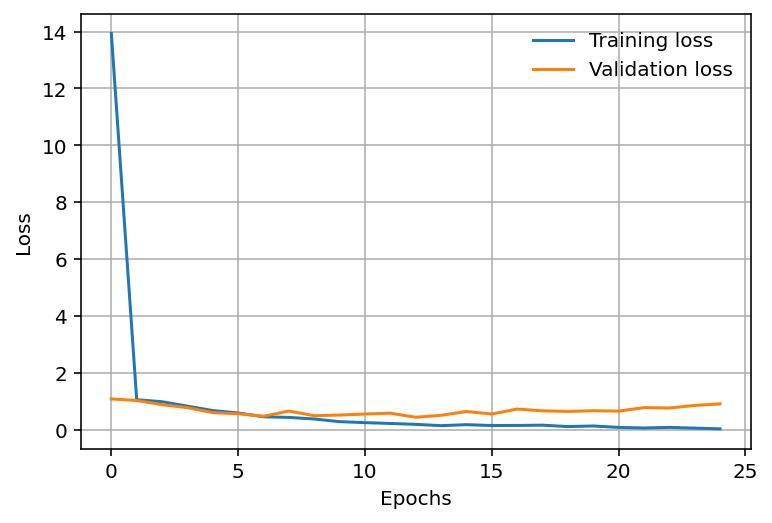

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

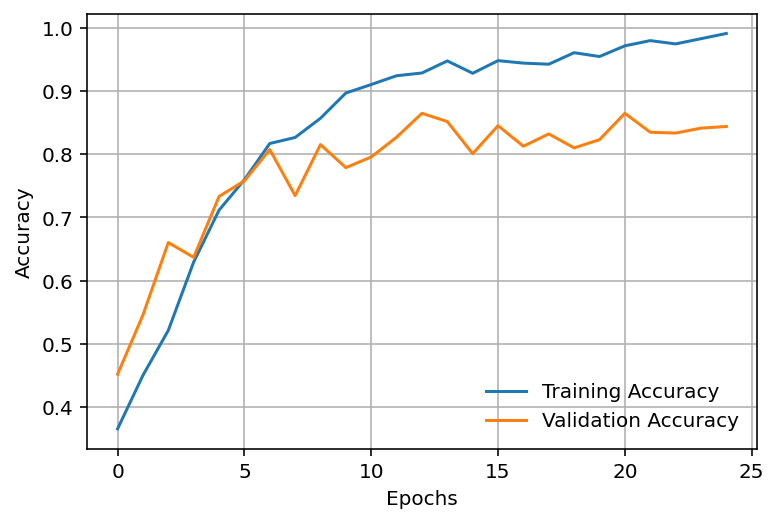

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-model128.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter, device)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_AlexNet128.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_AlexNet128.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
277  sweatshirt-female (1048)       2.046562e-06           0.999926   
548     sweatshirt-male (103)       5.456124e-01           0.001510   
440  sweatshirt-female (2359)       2.378998e-02           0.514857   
219   shirt-shortsleeve (792)       9.932398e-01           0.000904   
510   sweatshirt-female (793)       8.560642e-03           0.958856   
435  sweatshirt-female (2329)       2.322665e-05           0.999718   
424  sweatshirt-female (2243)       4.031613e-03           0.976718   
674     sweatshirt-male (400)       2.894928e-02           0.454535   
348  sweatshirt-female (1574)       4.665223e-05           0.999467   
670     sweatshirt-male (379)       1.752434e-02           0.002747   
753     sweatshirt-male (761)       5.417595e-04           0.369021   
732     sweatshirt-male (637)       4.685222e-03           0.954947   
800     sweatshirt-male (954)       9.065905e-06           0.000025   
731     sweatshirt-male (636)       2.359186e-02           0.599519   
313  sweatshirt-female (1259)       1.549068e-01           0.652500   
462   sweatshirt-female (347)       3.592551e-07           0.999989   
327  sweatshirt-female (1452)       8.660925e-06           0.999954   
555    sweatshirt-male (1067)       1.219488e-01           0.410417   
270    sweatshirt-female (10)       1.045151e-05           0.999589   
37   shirt-shortsleeve (1133)       9.987218e-01           0.000172   

     sweatshirt-male  
277         0.000072  
548         0.452877  
440         0.461353  
219         0.005856  
510         0.032583  
435         0.000259  
424         0.019250  
674         0.516516  
348         0.000486  
670         0.979729  
753         0.630437  
732         0.040368  
800         0.999966  
731         0.376890  
313         0.192593  
462         0.000011  
327         0.000037  
555         0.467634  
270         0.000400  
37          0.001106

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

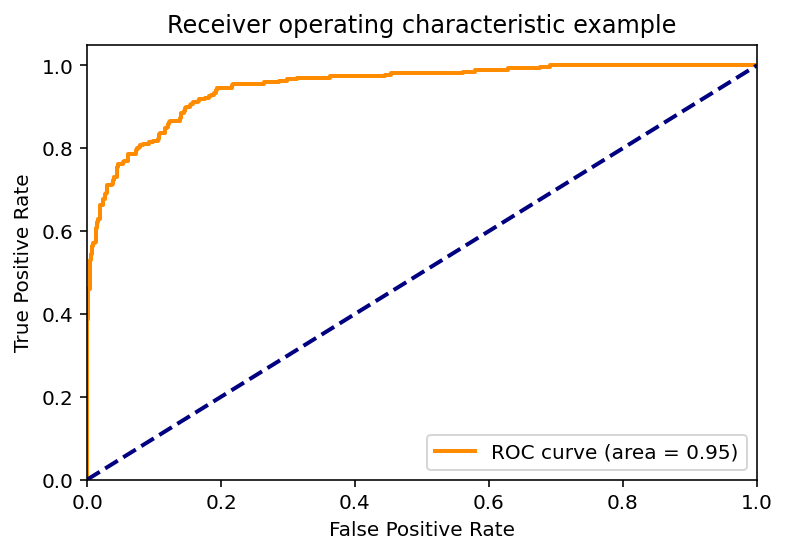

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\1555494331.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


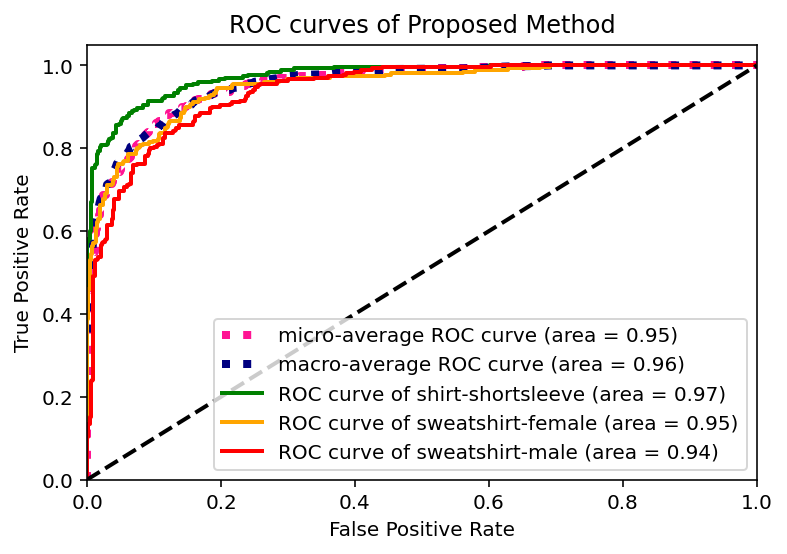

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

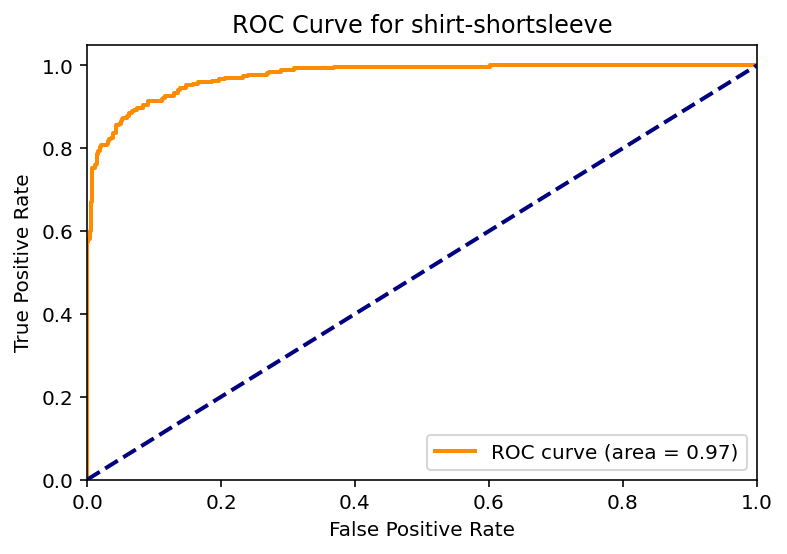

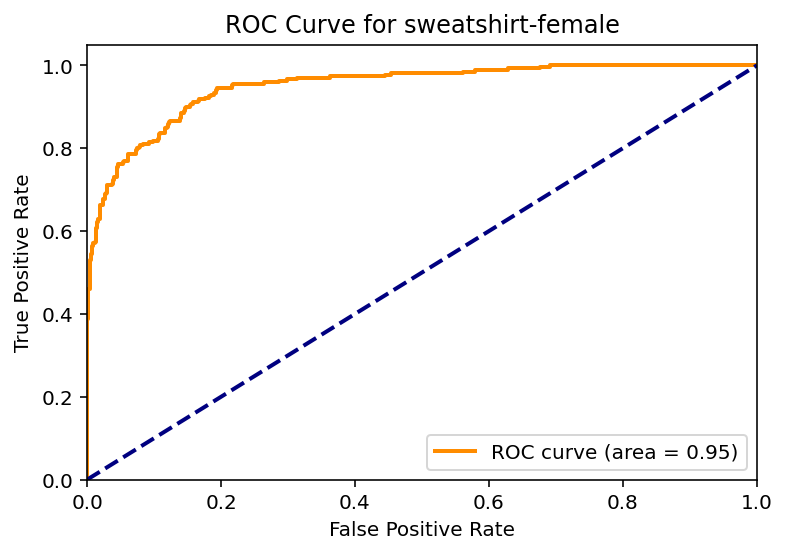

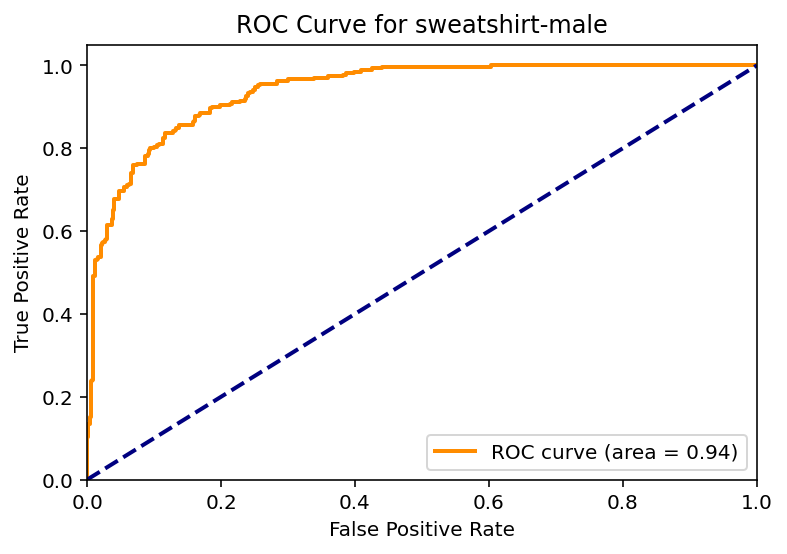

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[235  22  13]
 [  6 239  25]
 [ 22  51 197]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

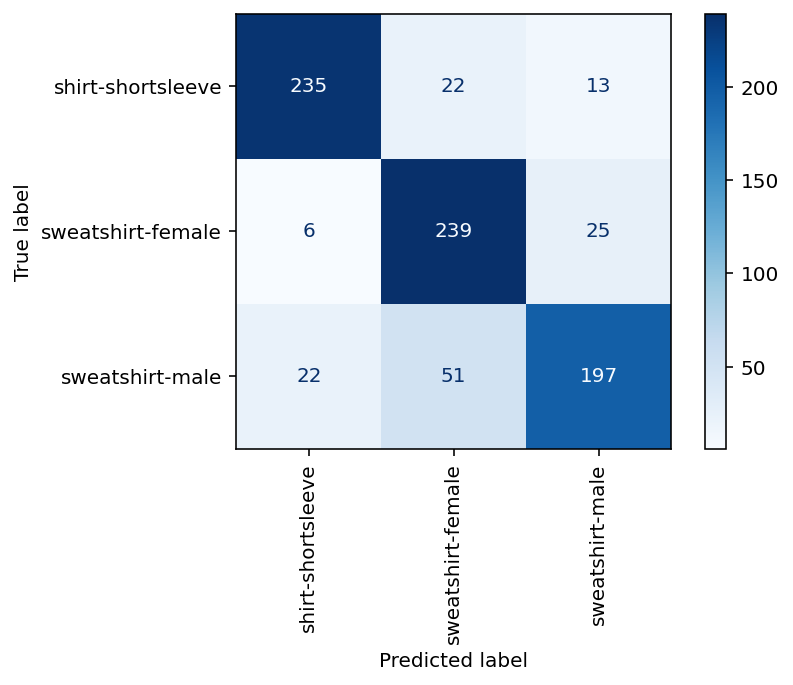

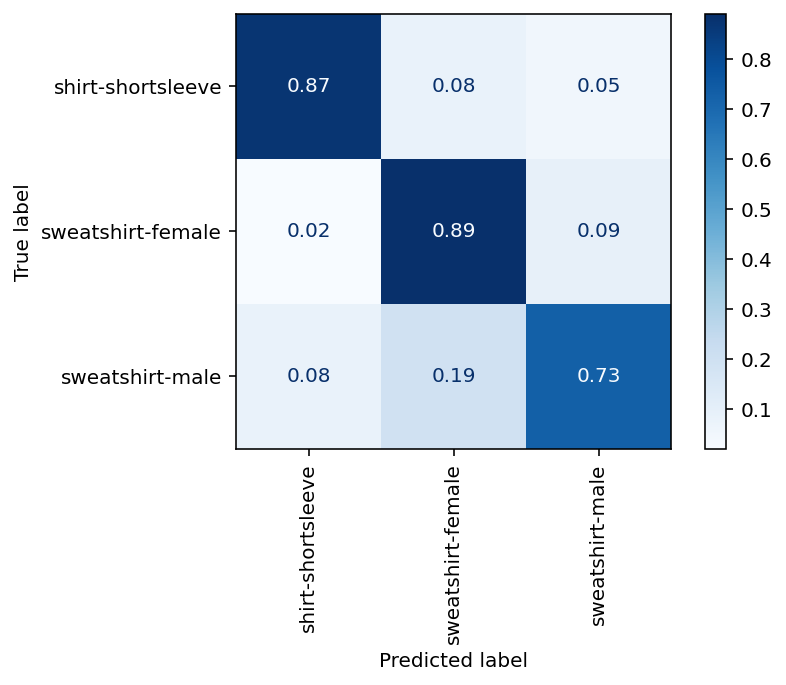

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270


cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

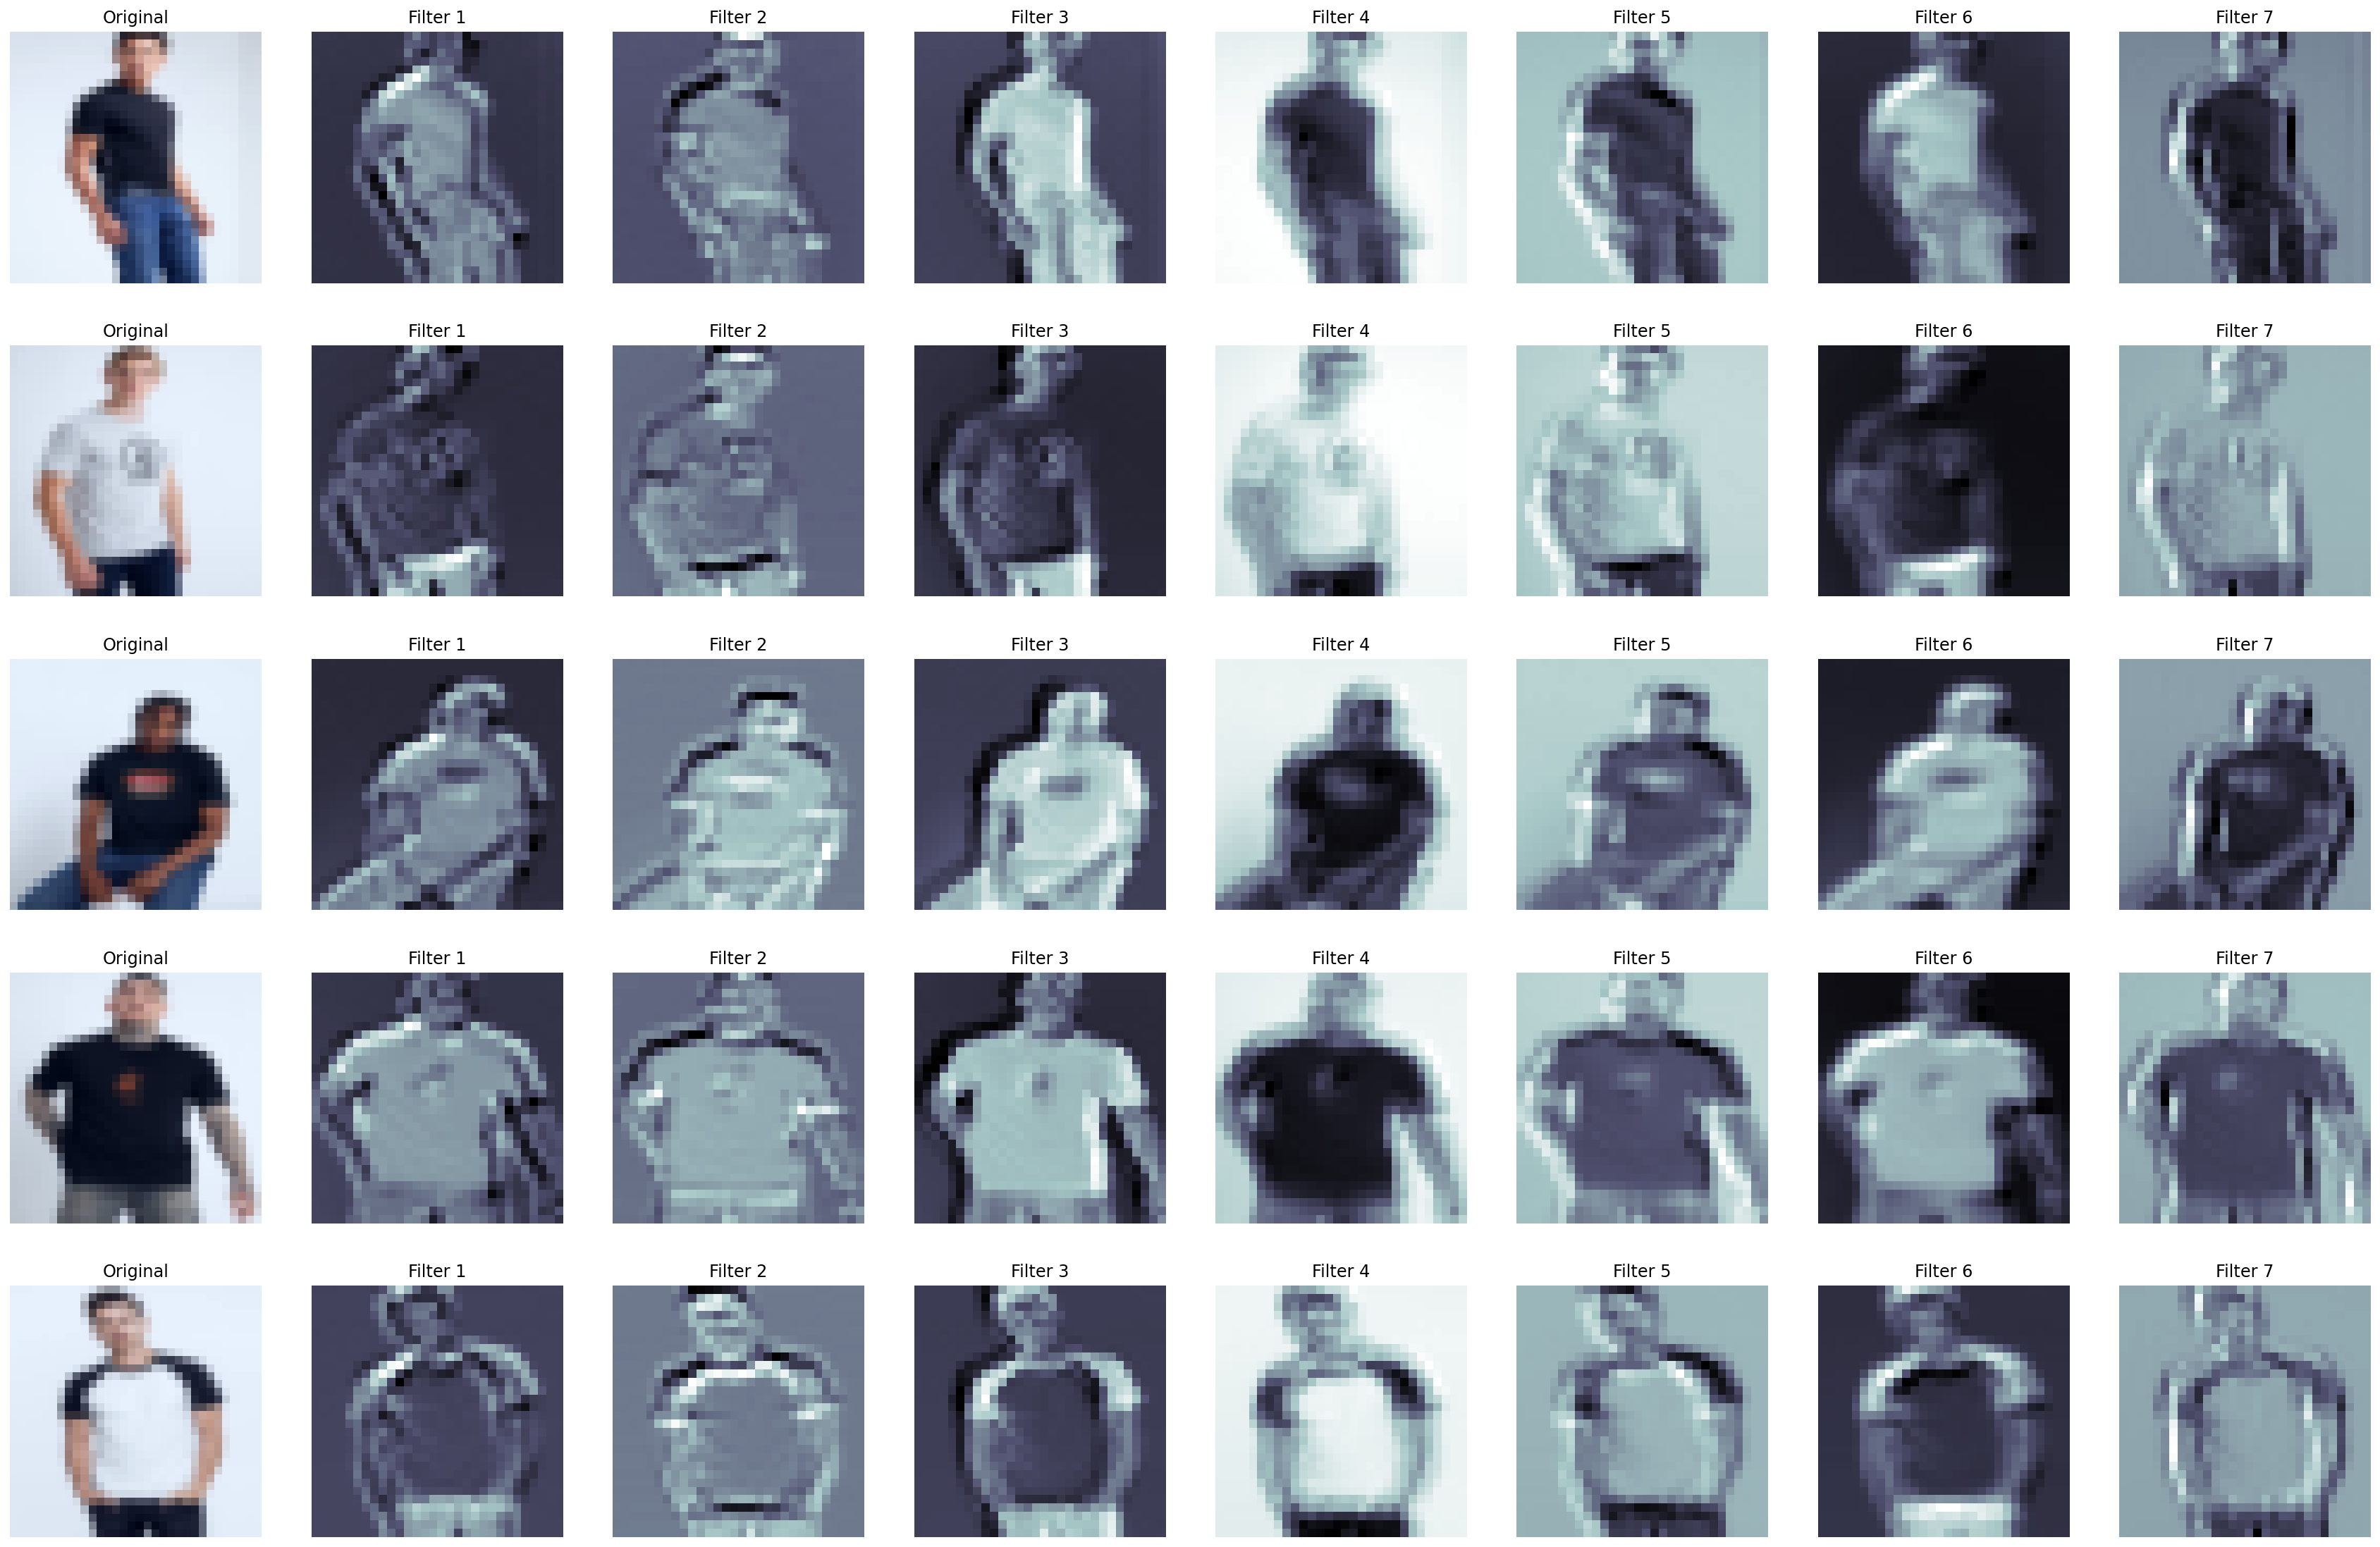

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

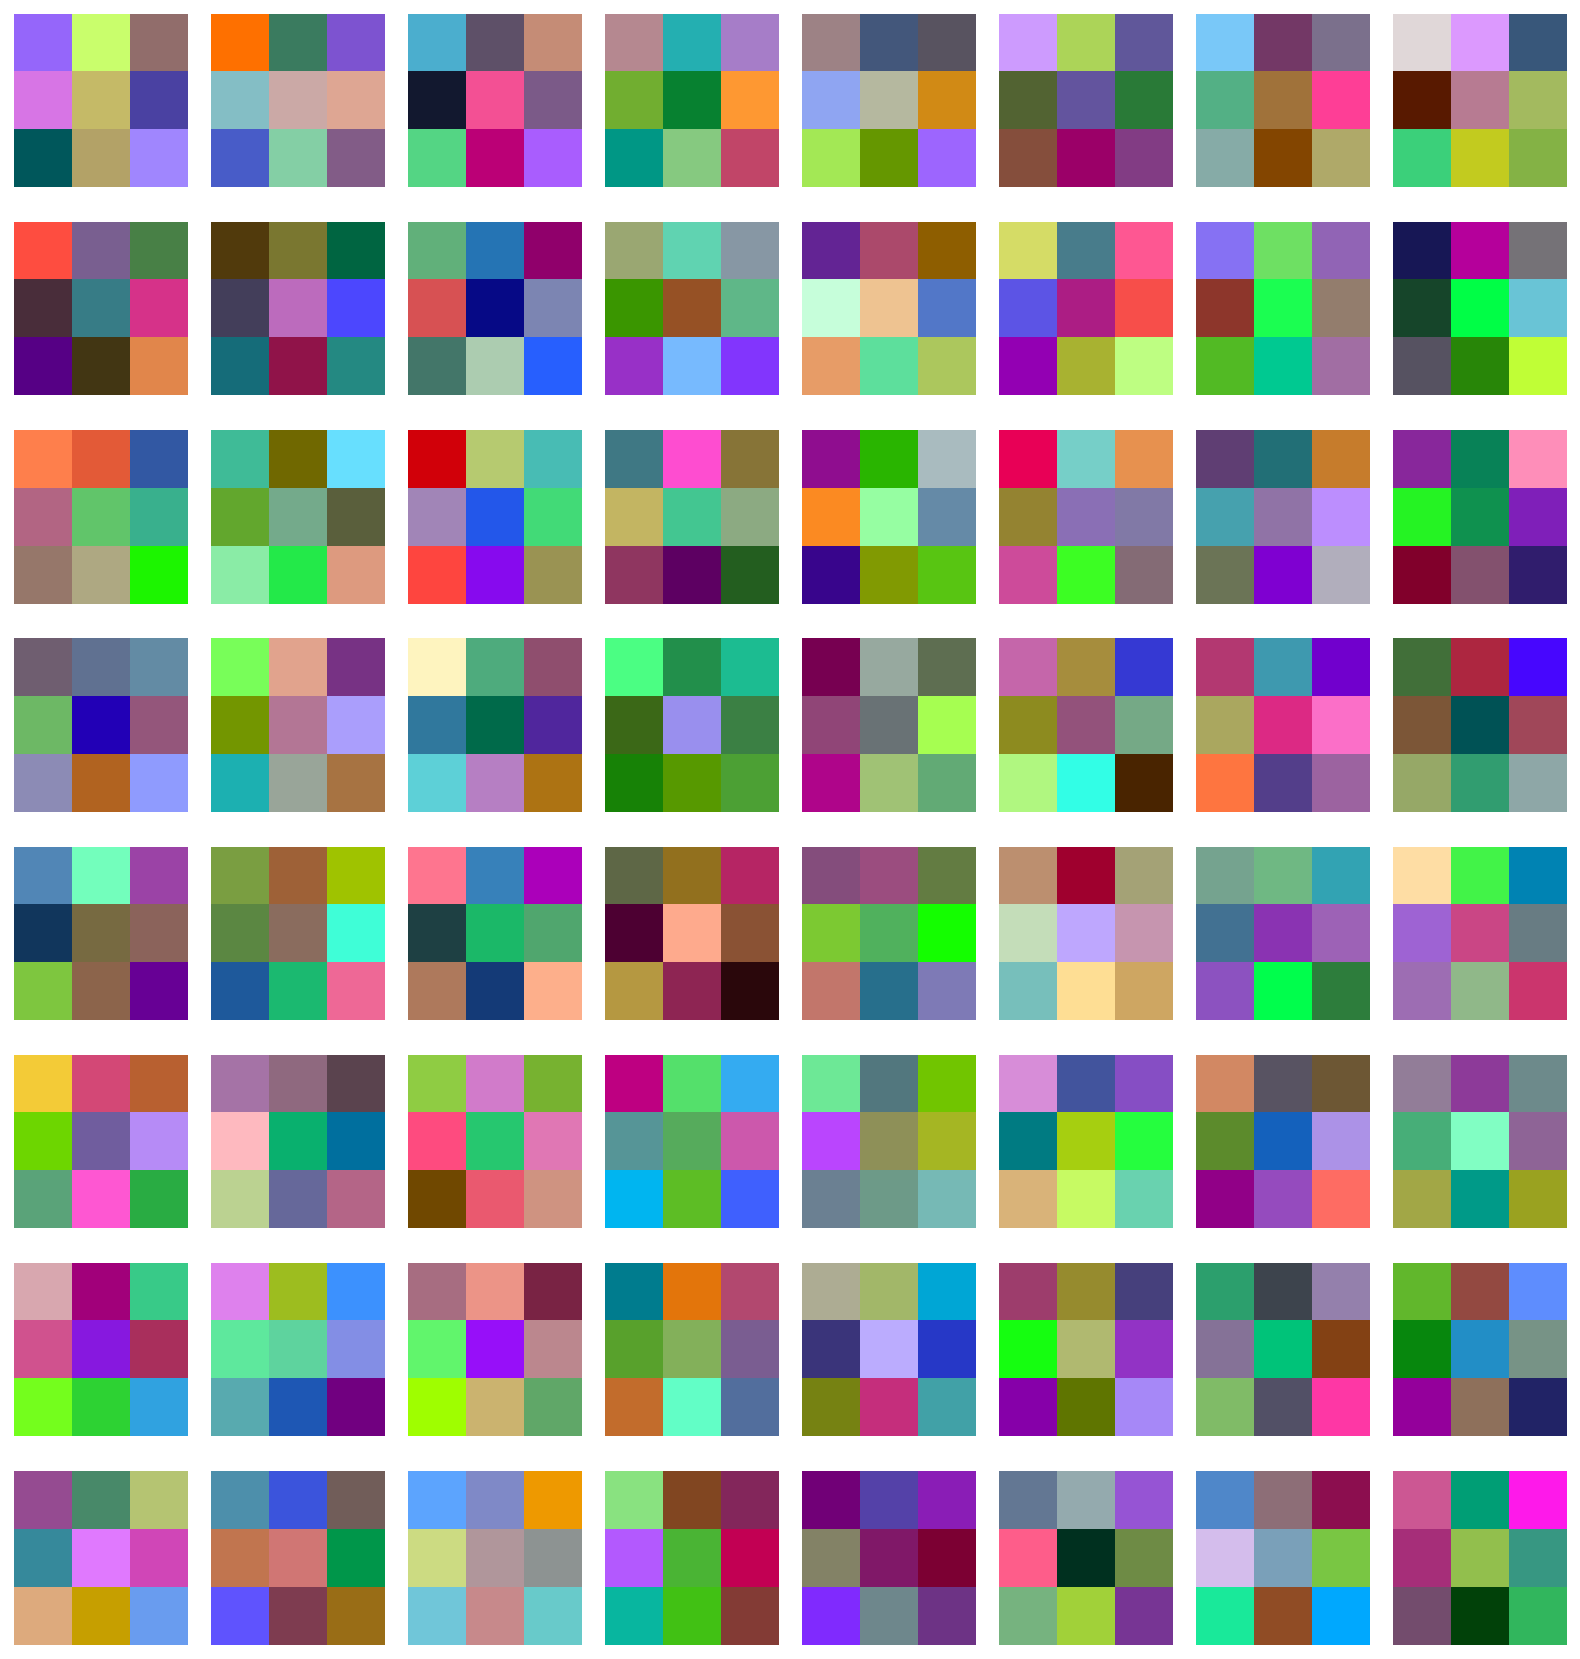

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report
class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.89      0.87      0.88       270
sweatshirt-female       0.77      0.89      0.82       270
  sweatshirt-male       0.84      0.73      0.78       270

         accuracy                           0.83       810
        macro avg       0.83      0.83      0.83       810
     weighted avg       0.83      0.83      0.83       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.828395061728395


### VGG-16 MODEL Batch size 32

In [ ]:
batch_size = 32
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]


train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)



HERE you can start to define your model, you can use different vgg for your work. Change the OUTPUT_DIM to the number of classes.

In [ ]:
vgg16_layers = get_vgg_layers(vgg16_config, batch_norm=True)
print(vgg16_layers)

OUTPUT_DIM = 3

model = VGG(vgg16_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg16_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

C:\Users\22549275\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\22549275\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 134,281,283 trainable parameters


Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

#params = [
#          {'params': model.features.parameters(), 'lr': FOUND_LR / 10},
#          {'params': model.classifier.parameters()}
#         ]

optimizer = optim.Adam(model.parameters(), lr=FOUND_LR)
#optimizer = optim.Adam(params, lr=FOUND_LR)
#optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelvgg32.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 52s
	Train Loss: 7.141 | Train Acc: 34.08%
	 Val. Loss: 1.177 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 53s
	Train Loss: 1.135 | Train Acc: 34.12%
	 Val. Loss: 1.131 |  Val. Acc: 33.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 51s
	Train Loss: 1.131 | Train Acc: 34.21%
	 Val. Loss: 1.136 |  Val. Acc: 33.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 52s
	Train Loss: 1.110 | Train Acc: 35.21%
	 Val. Loss: 1.107 |  Val. Acc: 34.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 51s
	Train Loss: 1.105 | Train Acc: 31.17%
	 Val. Loss: 1.107 |  Val. Acc: 34.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 51s
	Train Loss: 1.099 | Train Acc: 32.33%
	 Val. Loss: 1.113 |  Val. Acc: 34.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 53s
	Train Loss: 1.098 | Train Acc: 34.17%
	 Val. Loss: 1.099 |  Val. Acc: 34.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 53s
	Train Loss: 1.105 | Train Acc: 33.17%
	 Val. Loss: 1.109 |  Val. Acc: 34.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 55s
	Train Loss: 1.102 | Train Acc: 35.12%
	 Val. Loss: 1.114 |  Val. Acc: 36.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 2m 26s
	Train Loss: 1.102 | Train Acc: 36.08%
	 Val. Loss: 1.098 |  Val. Acc: 36.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 2m 37s
	Train Loss: 1.097 | Train Acc: 36.21%
	 Val. Loss: 1.087 |  Val. Acc: 37.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 2m 34s
	Train Loss: 1.099 | Train Acc: 35.29%
	 Val. Loss: 1.082 |  Val. Acc: 37.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 2m 33s
	Train Loss: 1.089 | Train Acc: 37.79%
	 Val. Loss: 1.075 |  Val. Acc: 39.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 2m 33s
	Train Loss: 1.077 | Train Acc: 39.33%
	 Val. Loss: 1.076 |  Val. Acc: 37.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 2m 31s
	Train Loss: 1.092 | Train Acc: 39.88%
	 Val. Loss: 4.553 |  Val. Acc: 37.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 2m 33s
	Train Loss: 1.108 | Train Acc: 35.88%
	 Val. Loss: 1.097 |  Val. Acc: 35.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 2m 32s
	Train Loss: 1.095 | Train Acc: 34.71%
	 Val. Loss: 1.100 |  Val. Acc: 35.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 2m 32s
	Train Loss: 1.096 | Train Acc: 36.46%
	 Val. Loss: 1.130 |  Val. Acc: 33.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 2m 32s
	Train Loss: 1.107 | Train Acc: 33.38%
	 Val. Loss: 1.098 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 2m 32s
	Train Loss: 1.100 | Train Acc: 35.25%
	 Val. Loss: 1.098 |  Val. Acc: 32.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 2m 33s
	Train Loss: 1.093 | Train Acc: 34.75%
	 Val. Loss: 1.104 |  Val. Acc: 35.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 2m 33s
	Train Loss: 1.096 | Train Acc: 35.08%
	 Val. Loss: 1.087 |  Val. Acc: 37.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 2m 32s
	Train Loss: 1.098 | Train Acc: 37.46%
	 Val. Loss: 1.087 |  Val. Acc: 37.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 2m 33s
	Train Loss: 1.092 | Train Acc: 37.17%
	 Val. Loss: 1.092 |  Val. Acc: 37.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 2m 32s
	Train Loss: 1.088 | Train Acc: 37.83%
	 Val. Loss: 1.093 |  Val. Acc: 36.38%


#### Losses and Accuracy VGG lr 1e-5 plots.

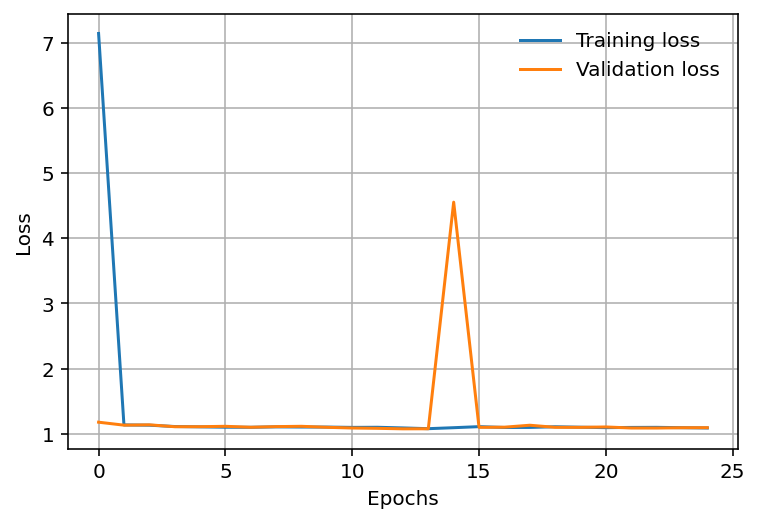

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

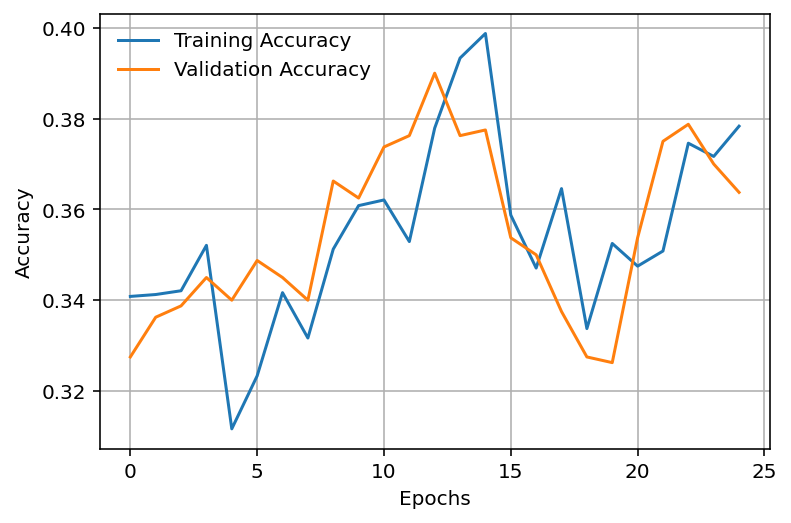

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)


# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelvgg32.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_VGG32.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_VGG32.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
118   shirt-shortsleeve (338)           0.341710           0.302267   
362  sweatshirt-female (1650)           0.341710           0.302267   
578    sweatshirt-male (1134)           0.341710           0.302267   
763      sweatshirt-male (80)           0.341710           0.302267   
274  sweatshirt-female (1041)           0.341710           0.302267   
417  sweatshirt-female (2162)           0.265439           0.603287   
268   shirt-shortsleeve (981)           0.341710           0.302267   
720     sweatshirt-male (590)           0.341710           0.302267   
344  sweatshirt-female (1553)           0.341710           0.302267   
608    sweatshirt-male (1310)           0.341710           0.302267   
484   sweatshirt-female (618)           0.313846           0.467123   
479    sweatshirt-female (60)           0.341710           0.302267   
765     sweatshirt-male (808)           0.341710           0.302267   
599     sweatshirt-male (128)           0.341710           0.302267   
684     sweatshirt-male (449)           0.341710           0.302267   
52   shirt-shortsleeve (1239)           0.341710           0.302267   
549    sweatshirt-male (1030)           0.341710           0.302267   
794     sweatshirt-male (925)           0.341710           0.302267   
0       shirt-shortsleeve (1)           0.341710           0.302267   
379  sweatshirt-female (1811)           0.341710           0.302267   

     sweatshirt-male  
118         0.356024  
362         0.356024  
578         0.356024  
763         0.356024  
274         0.356024  
417         0.131274  
268         0.356024  
720         0.356024  
344         0.356024  
608         0.356024  
484         0.219031  
479         0.356024  
765         0.356024  
599         0.356024  
684         0.356024  
52          0.356024  
549         0.356024  
794         0.356024  
0           0.356024  
379         0.356024

In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

Index(['id', 'shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male'], dtype='object')

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

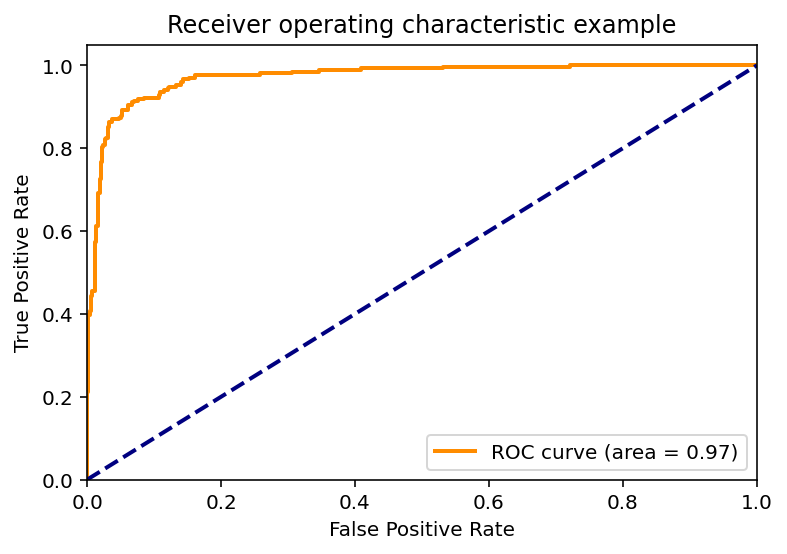

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\1555494331.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


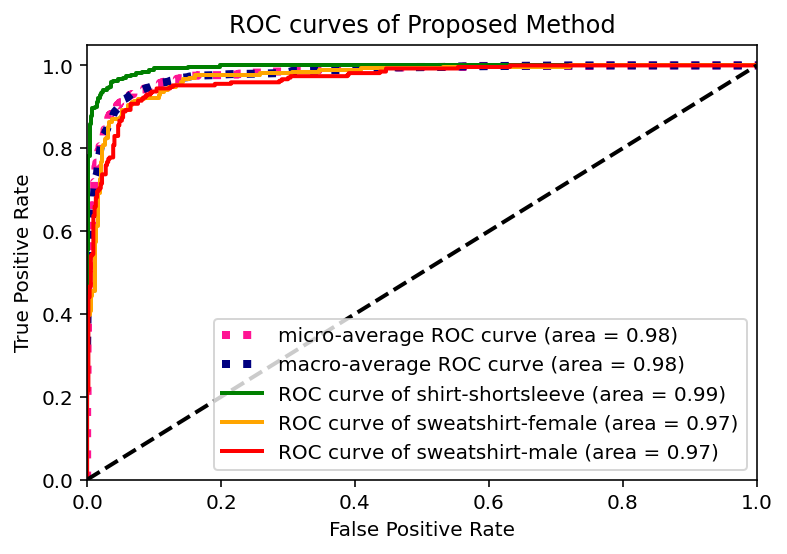

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

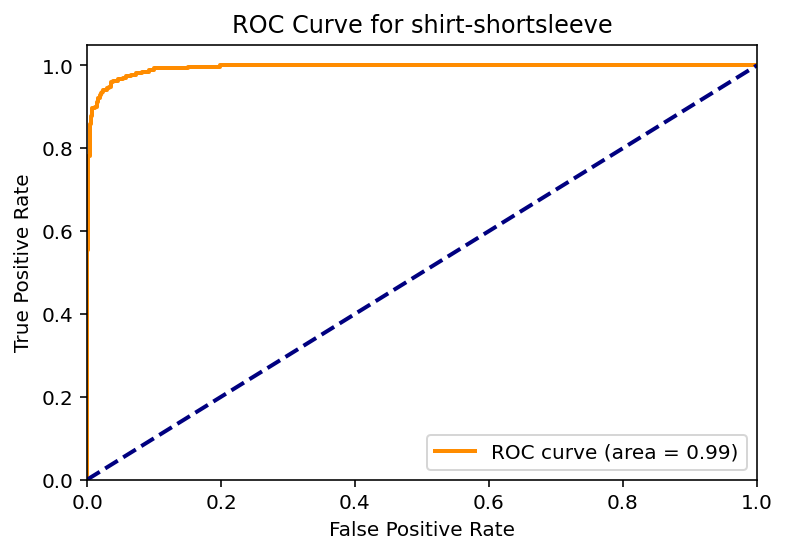

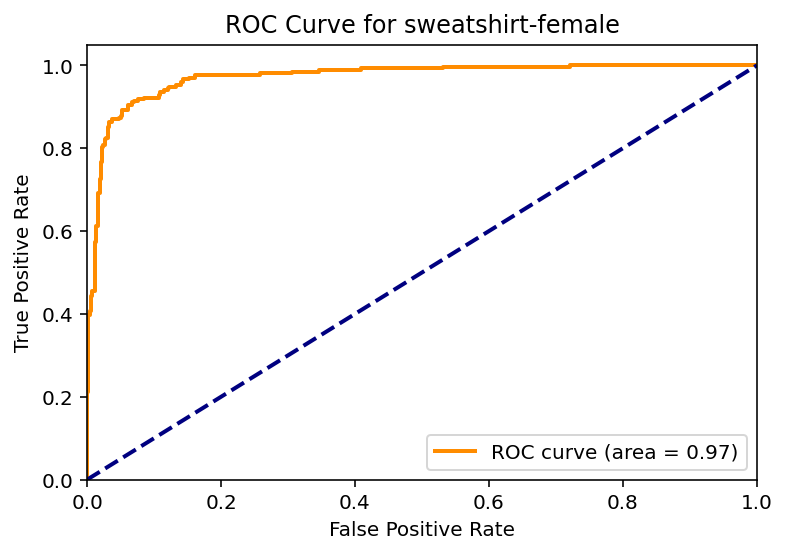

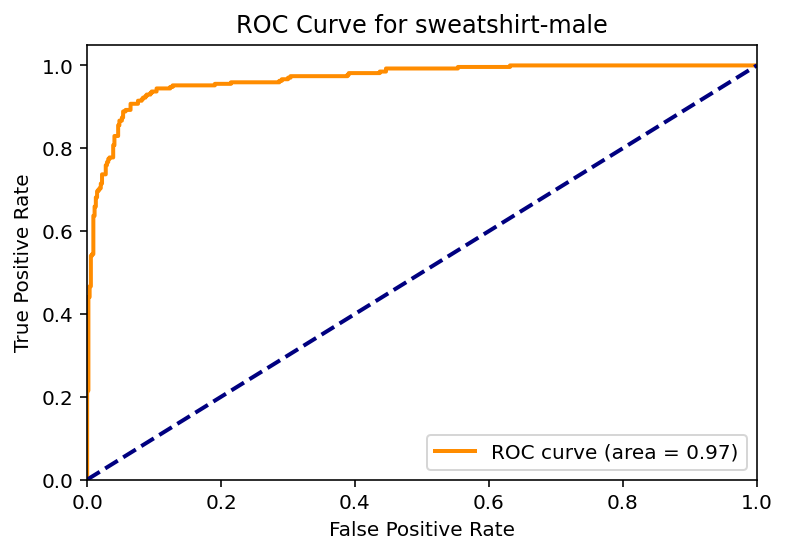

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[249   9  12]
 [  6 241  23]
 [  4  22 244]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

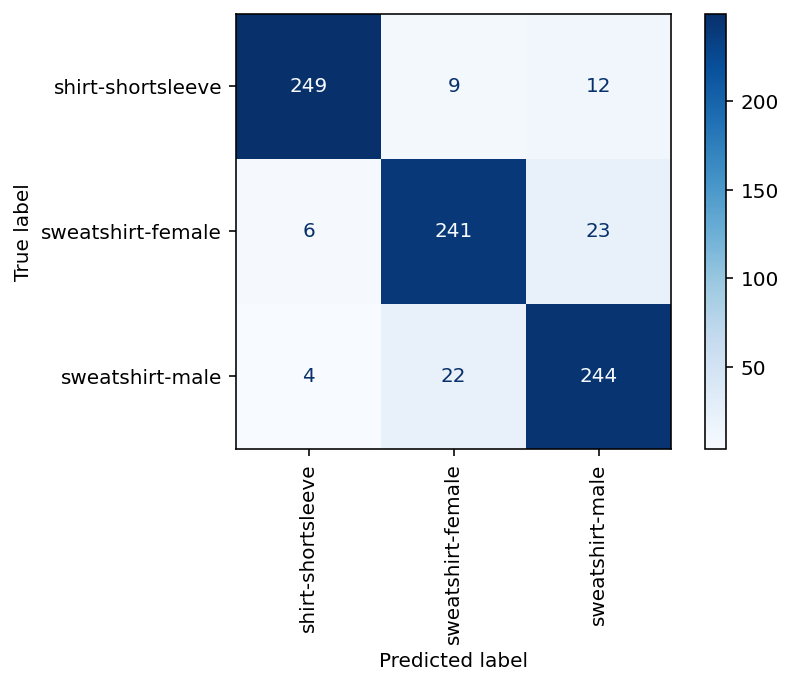

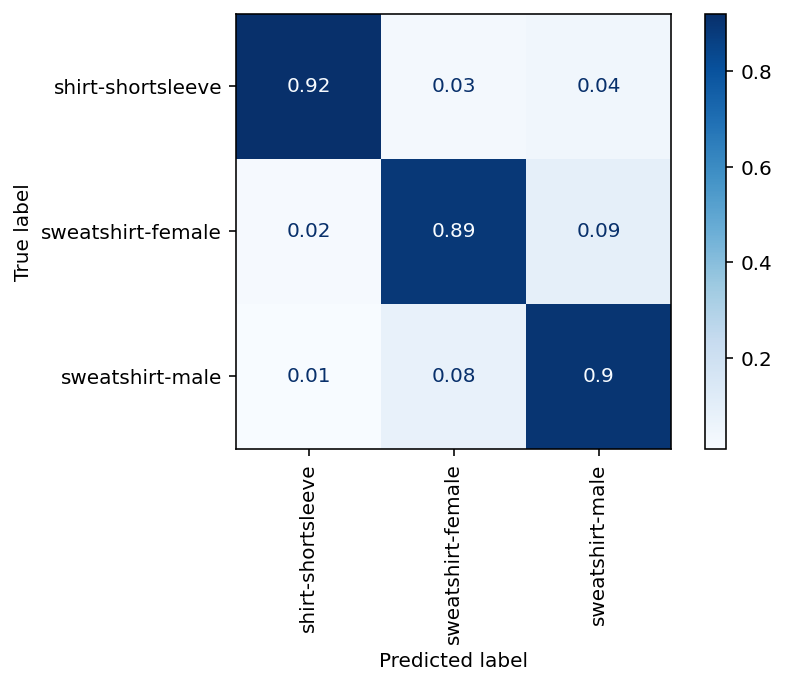

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

# Rotate x-axis tick labels
plt.xticks(rotation=90)

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

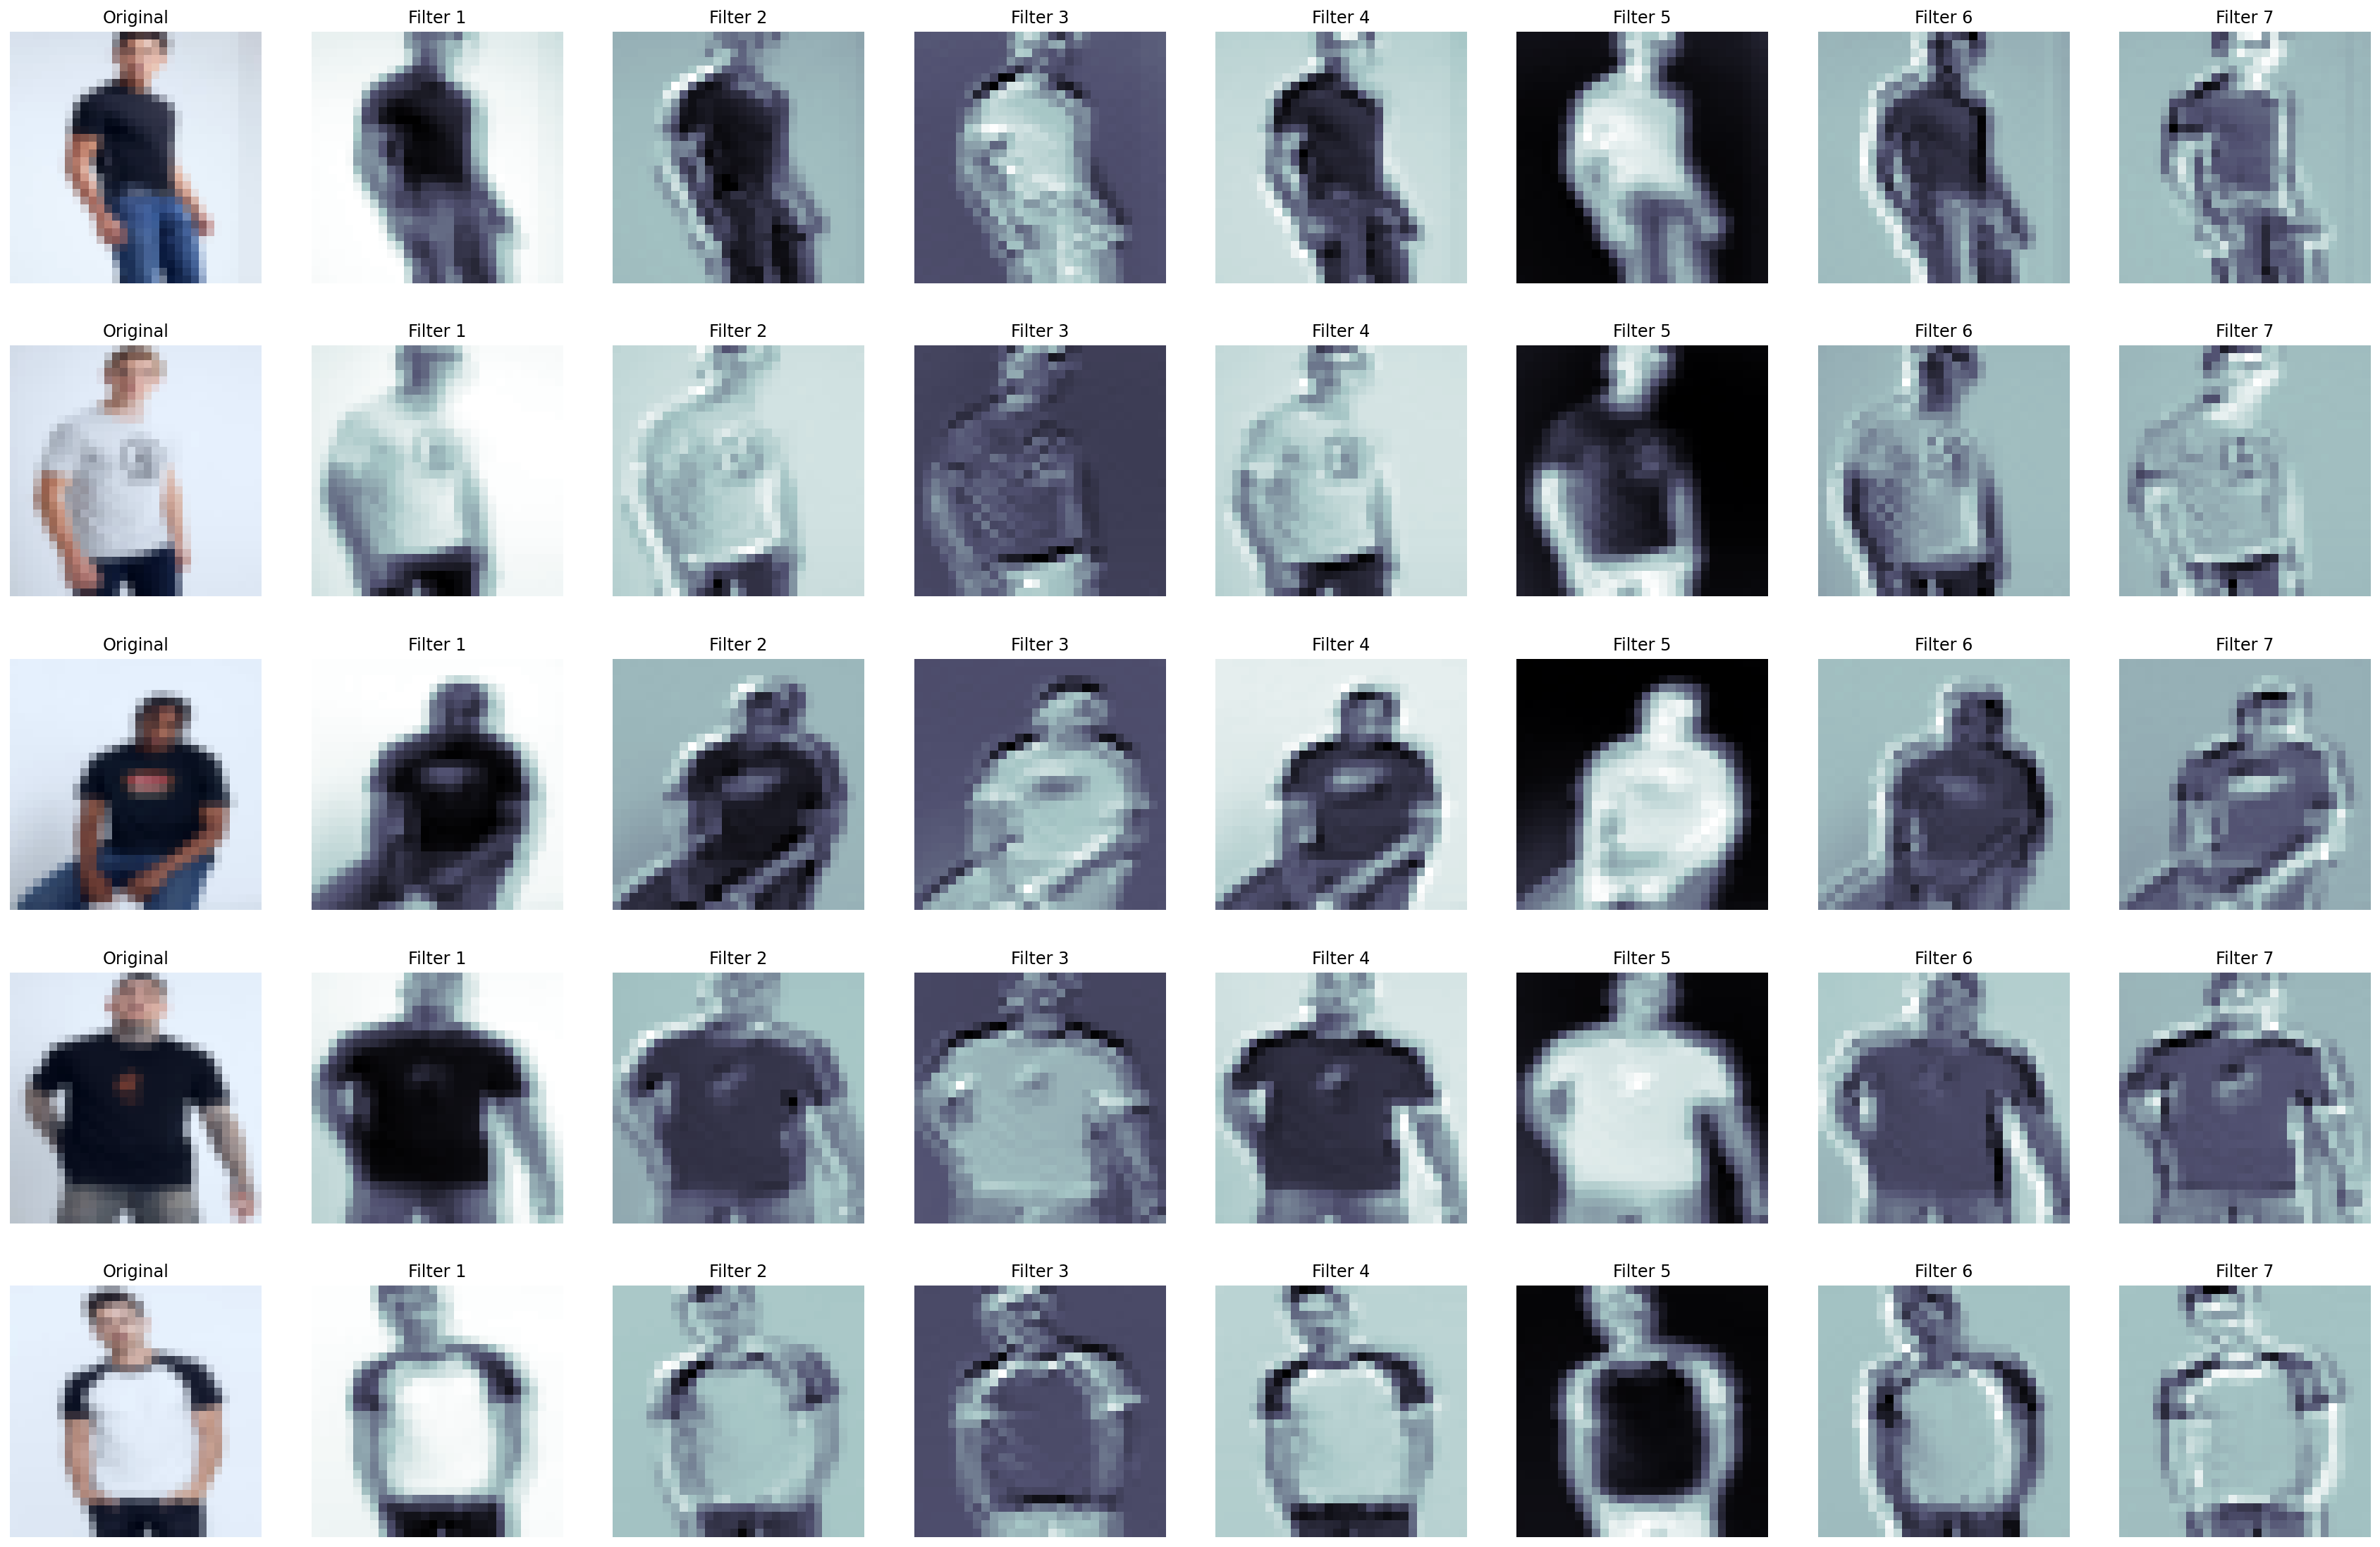

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

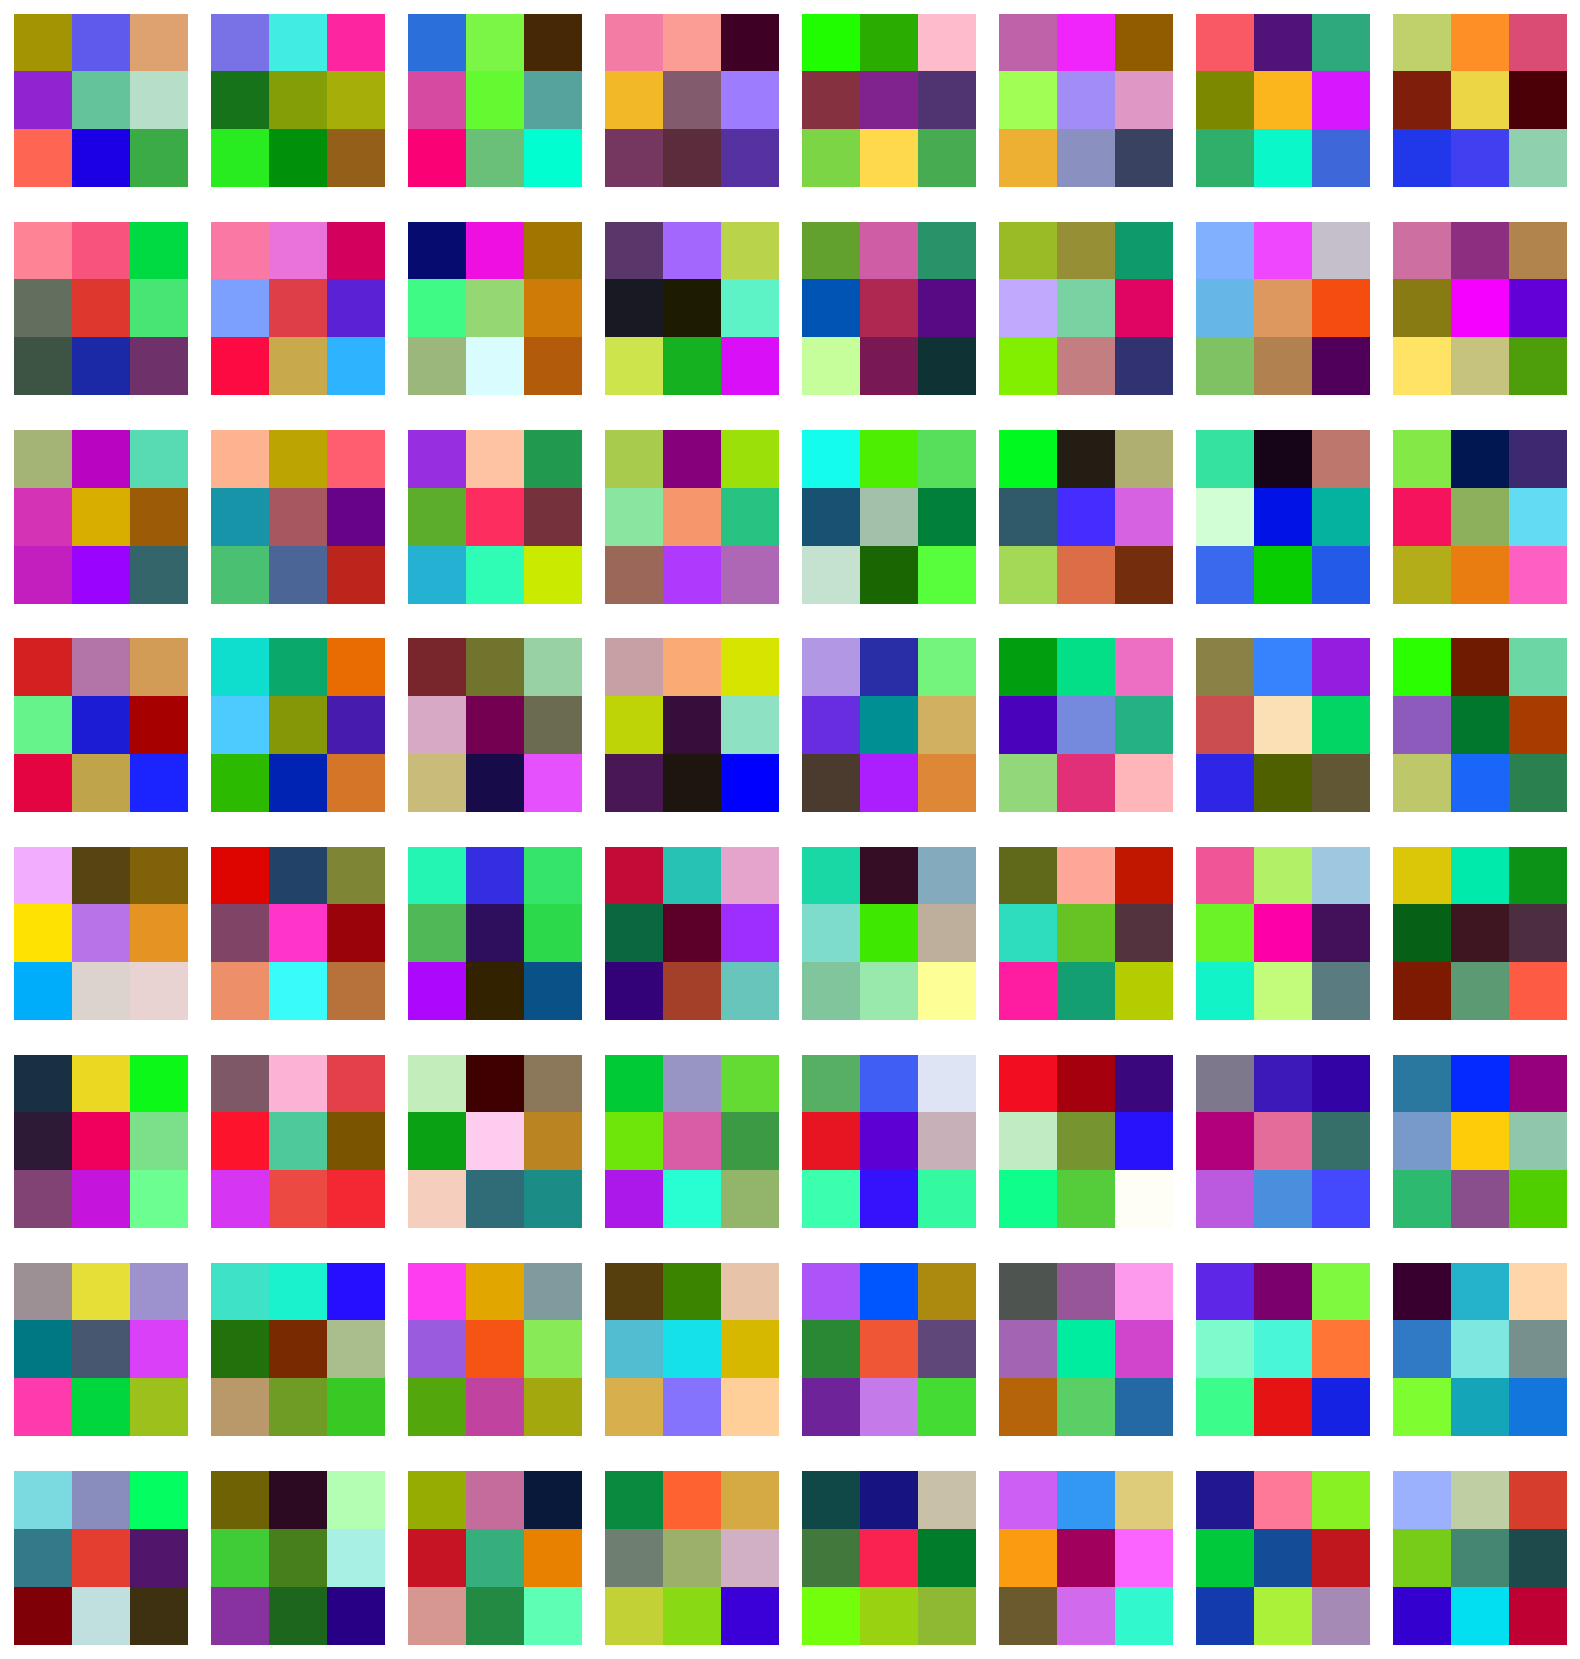

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.25      0.00      0.01       270
sweatshirt-female       0.55      0.27      0.37       270
  sweatshirt-male       0.36      0.90      0.51       270

         accuracy                           0.39       810
        macro avg       0.39      0.39      0.30       810
     weighted avg       0.39      0.39      0.30       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.391358024691358


### VGG-16 MODEL Batch size 64

In [ ]:
batch_size = 64
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]


train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)



In [ ]:
vgg16_layers = get_vgg_layers(vgg16_config, batch_norm=True)
#print(vgg11_layers)

OUTPUT_DIM = 3

model = VGG(vgg16_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg16_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 134,281,283 trainable parameters


Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=FOUND_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelvgg64.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 30s
	Train Loss: 14.497 | Train Acc: 33.28%
	 Val. Loss: 5.947 |  Val. Acc: 35.03%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 37s
	Train Loss: 1.783 | Train Acc: 34.08%
	 Val. Loss: 1.419 |  Val. Acc: 35.03%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 38s
	Train Loss: 1.284 | Train Acc: 33.07%
	 Val. Loss: 1.329 |  Val. Acc: 34.90%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 38s
	Train Loss: 1.180 | Train Acc: 34.50%
	 Val. Loss: 1.213 |  Val. Acc: 35.68%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 37s
	Train Loss: 1.133 | Train Acc: 32.64%
	 Val. Loss: 1.143 |  Val. Acc: 35.94%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 37s
	Train Loss: 1.139 | Train Acc: 33.02%
	 Val. Loss: 1.126 |  Val. Acc: 34.11%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 29s
	Train Loss: 1.141 | Train Acc: 33.99%
	 Val. Loss: 1.120 |  Val. Acc: 35.94%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 29s
	Train Loss: 1.161 | Train Acc: 34.33%
	 Val. Loss: 1.122 |  Val. Acc: 35.03%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 30s
	Train Loss: 1.108 | Train Acc: 32.18%
	 Val. Loss: 1.100 |  Val. Acc: 29.95%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 30s
	Train Loss: 1.106 | Train Acc: 33.74%
	 Val. Loss: 1.098 |  Val. Acc: 34.77%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 29s
	Train Loss: 1.102 | Train Acc: 34.50%
	 Val. Loss: 1.100 |  Val. Acc: 30.86%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 29s
	Train Loss: 1.100 | Train Acc: 33.99%
	 Val. Loss: 1.098 |  Val. Acc: 35.94%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 29s
	Train Loss: 1.102 | Train Acc: 34.21%
	 Val. Loss: 1.101 |  Val. Acc: 30.99%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 29s
	Train Loss: 1.101 | Train Acc: 32.98%
	 Val. Loss: 1.098 |  Val. Acc: 35.03%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 36s
	Train Loss: 1.099 | Train Acc: 33.95%
	 Val. Loss: 1.100 |  Val. Acc: 30.86%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 37s
	Train Loss: 1.099 | Train Acc: 36.49%
	 Val. Loss: 1.101 |  Val. Acc: 36.07%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 37s
	Train Loss: 1.100 | Train Acc: 33.32%
	 Val. Loss: 1.099 |  Val. Acc: 35.03%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 38s
	Train Loss: 1.099 | Train Acc: 33.23%
	 Val. Loss: 1.099 |  Val. Acc: 30.73%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 48s
	Train Loss: 1.098 | Train Acc: 33.87%
	 Val. Loss: 1.099 |  Val. Acc: 31.12%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 57s
	Train Loss: 1.099 | Train Acc: 34.12%
	 Val. Loss: 1.098 |  Val. Acc: 30.99%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 59s
	Train Loss: 1.098 | Train Acc: 35.30%
	 Val. Loss: 1.104 |  Val. Acc: 29.95%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 59s
	Train Loss: 1.099 | Train Acc: 32.90%
	 Val. Loss: 1.099 |  Val. Acc: 35.94%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 59s
	Train Loss: 1.100 | Train Acc: 33.74%
	 Val. Loss: 1.097 |  Val. Acc: 35.68%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 59s
	Train Loss: 1.098 | Train Acc: 33.74%
	 Val. Loss: 1.096 |  Val. Acc: 35.68%


Training:   0%|          | 0/37 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 58s
	Train Loss: 1.102 | Train Acc: 30.83%
	 Val. Loss: 1.097 |  Val. Acc: 35.68%


#### Losses and Accuracy VGG lr 1e-3 plots.

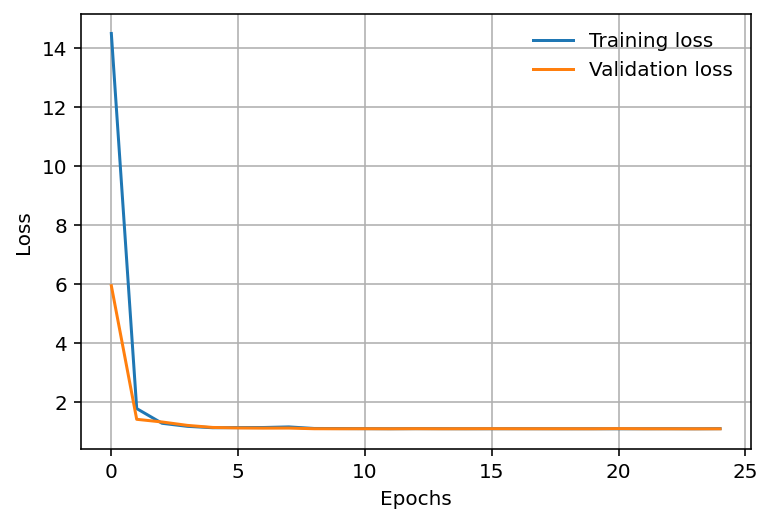

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

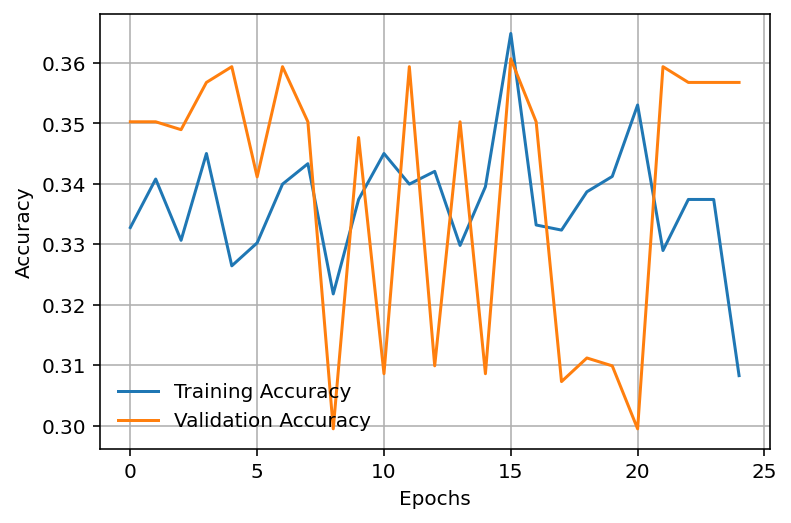

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelvgg64.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_VGG64.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_VGG64.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
358  sweatshirt-female (1609)           0.346992           0.332535   
123   shirt-shortsleeve (353)           0.346992           0.332535   
804      sweatshirt-male (97)           0.346992           0.332535   
376  sweatshirt-female (1788)           0.346992           0.332535   
601    sweatshirt-male (1286)           0.346992           0.332535   
613    sweatshirt-male (1331)           0.346992           0.332535   
9    shirt-shortsleeve (1030)           0.346992           0.332535   
775     sweatshirt-male (850)           0.346992           0.332535   
688     sweatshirt-male (470)           0.346992           0.332535   
625     sweatshirt-male (149)           0.346992           0.332535   
475   sweatshirt-female (500)           0.346992           0.332535   
213   shirt-shortsleeve (761)           0.346992           0.332535   
788     sweatshirt-male (910)           0.294609           0.393099   
797     sweatshirt-male (938)           0.346992           0.332535   
500   sweatshirt-female (733)           0.347063           0.332527   
759     sweatshirt-male (792)           0.346992           0.332535   
229   shirt-shortsleeve (834)           0.346992           0.332535   
234    shirt-shortsleeve (85)           0.346992           0.332535   
58   shirt-shortsleeve (1275)           0.346992           0.332535   
709     sweatshirt-male (552)           0.346992           0.332535   

     sweatshirt-male  
358         0.320473  
123         0.320473  
804         0.320473  
376         0.320473  
601         0.320473  
613         0.320473  
9           0.320473  
775         0.320473  
688         0.320473  
625         0.320473  
475         0.320473  
213         0.320473  
788         0.312291  
797         0.320473  
500         0.320410  
759         0.320473  
229         0.320473  
234         0.320473  
58          0.320473  
709         0.320473

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions//ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

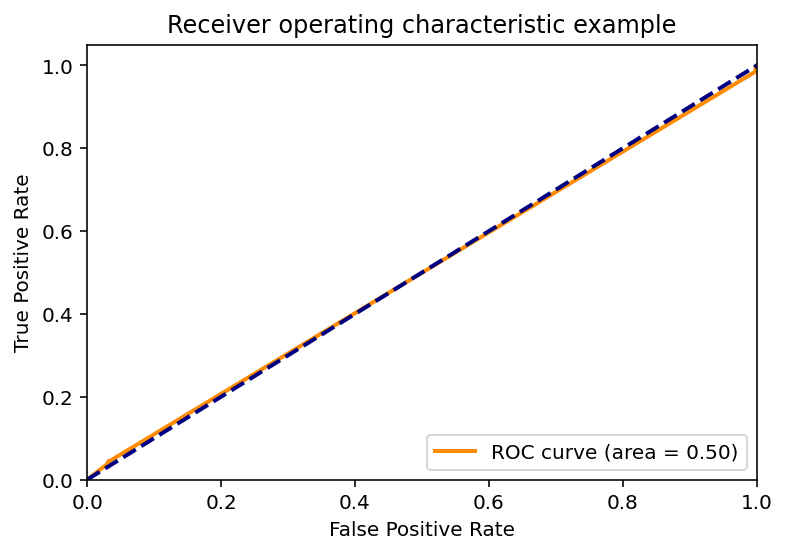

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\1555494331.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


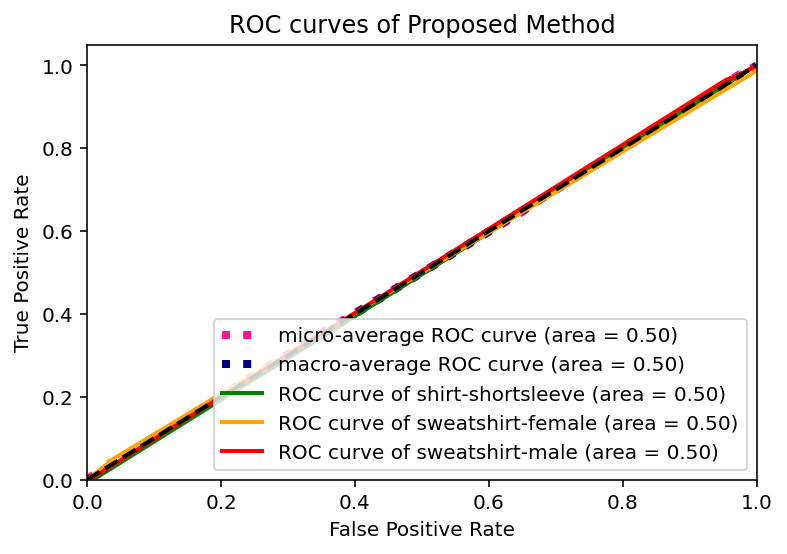

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

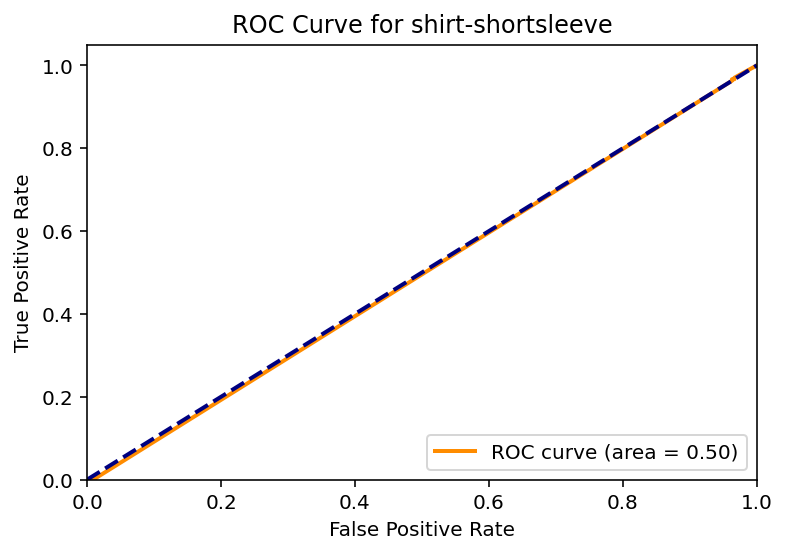

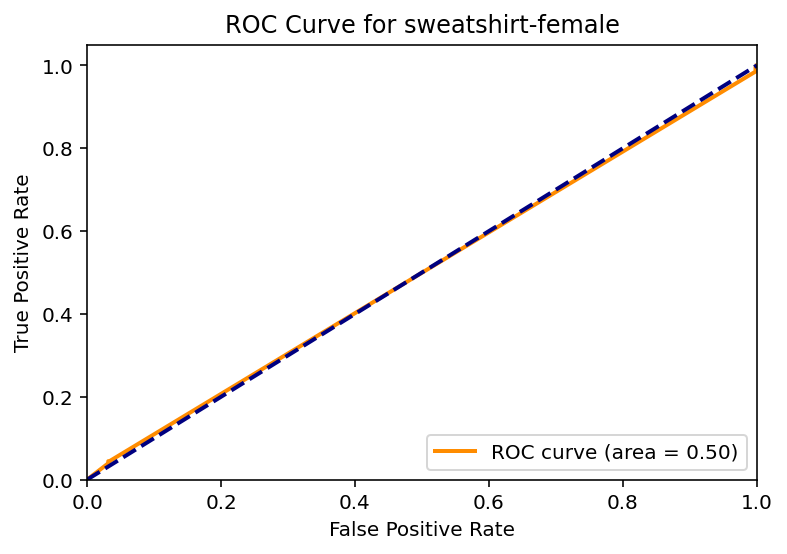

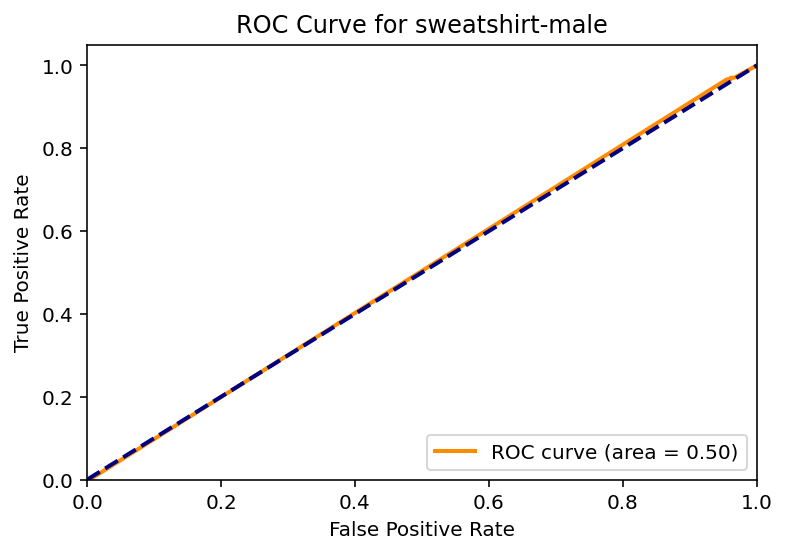

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[261   9   0]
 [258  12   0]
 [262   8   0]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

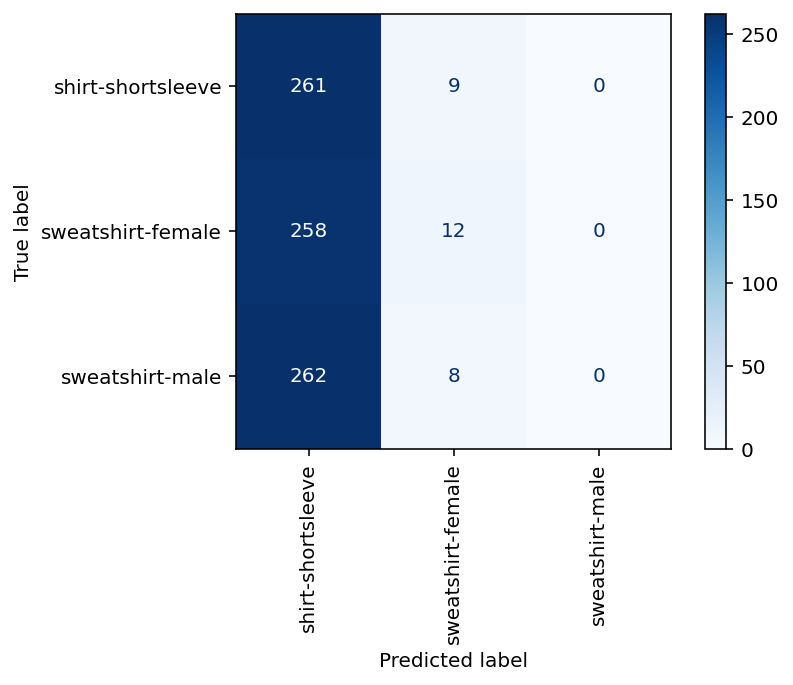

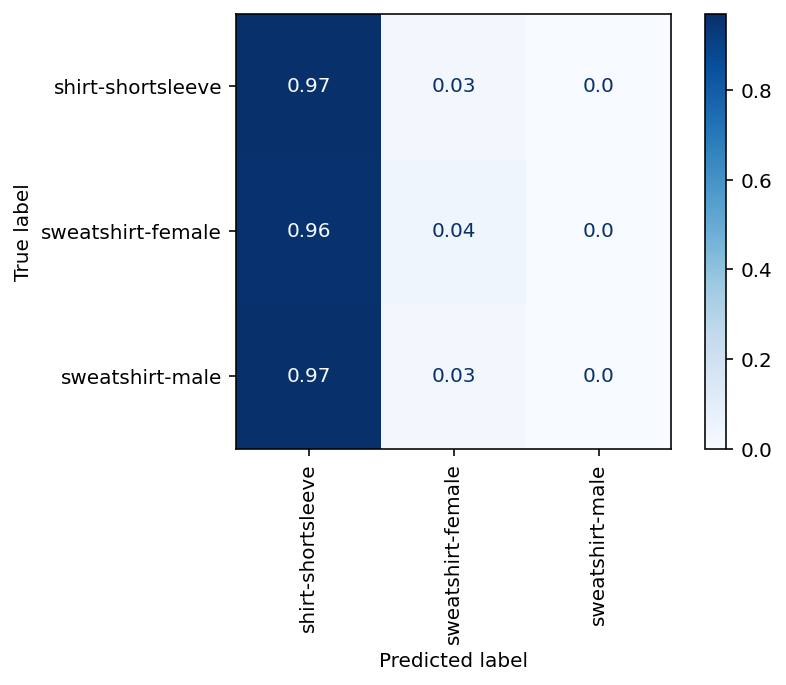

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270


cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

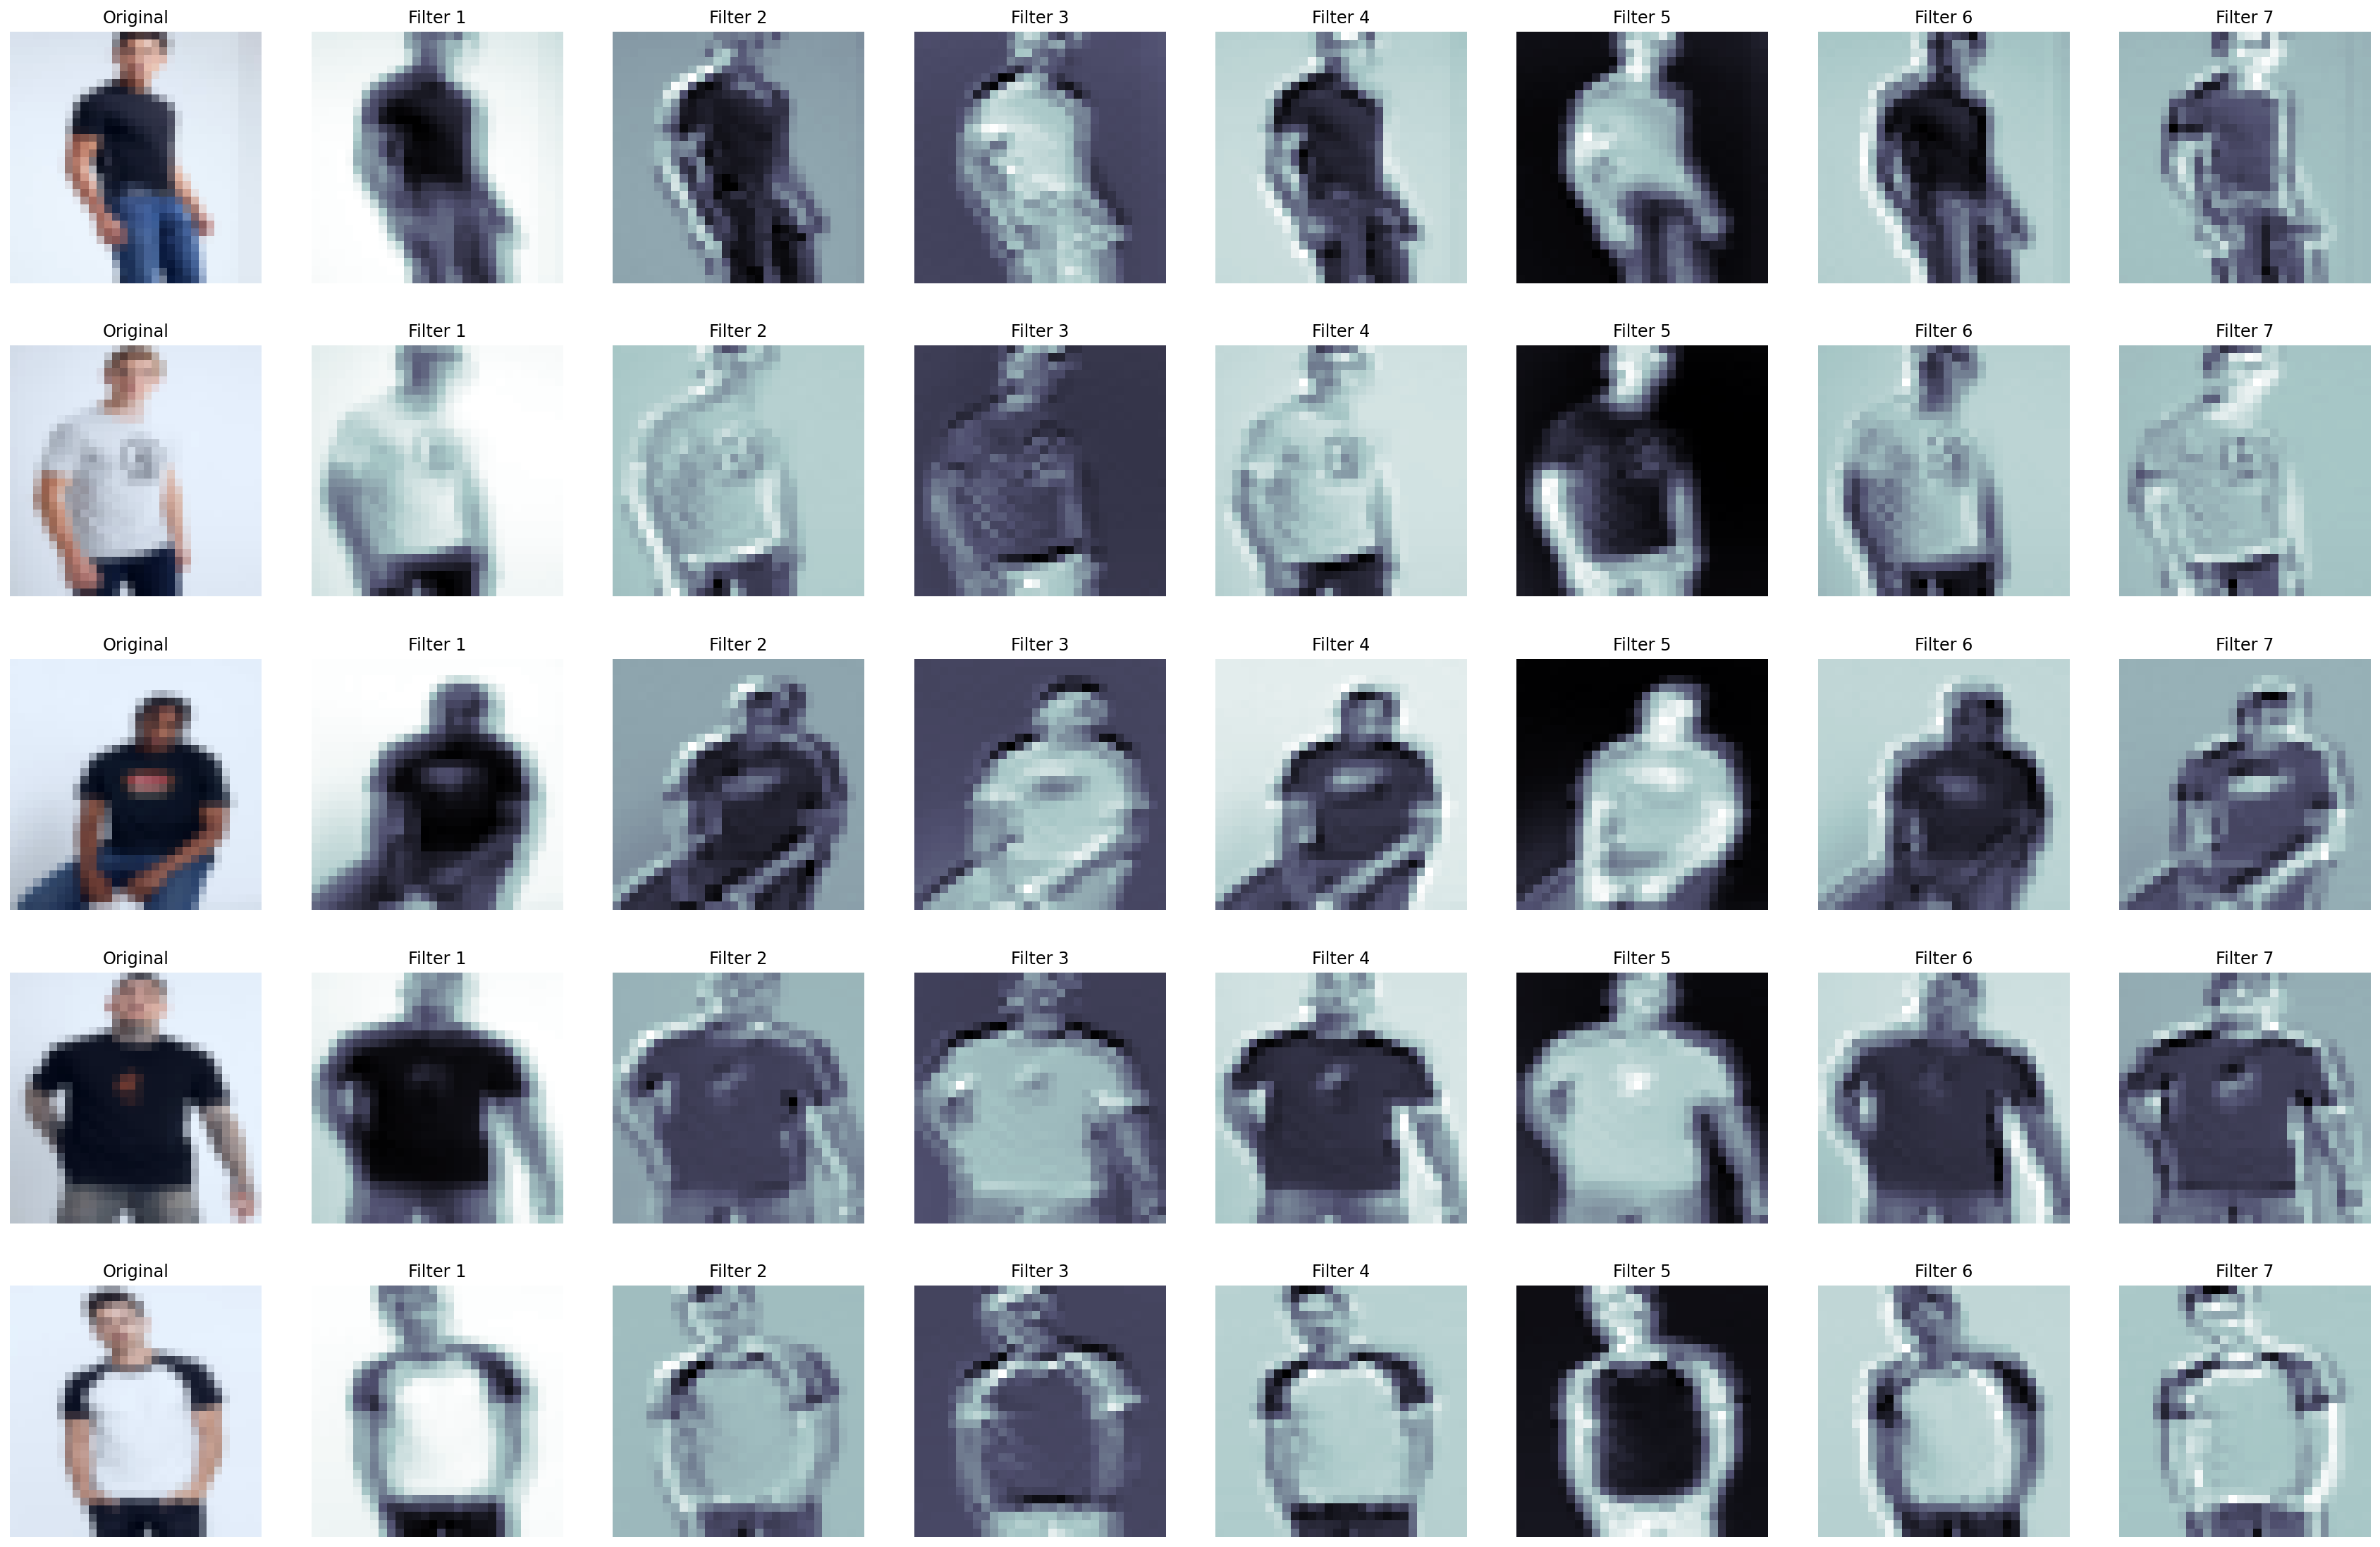

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

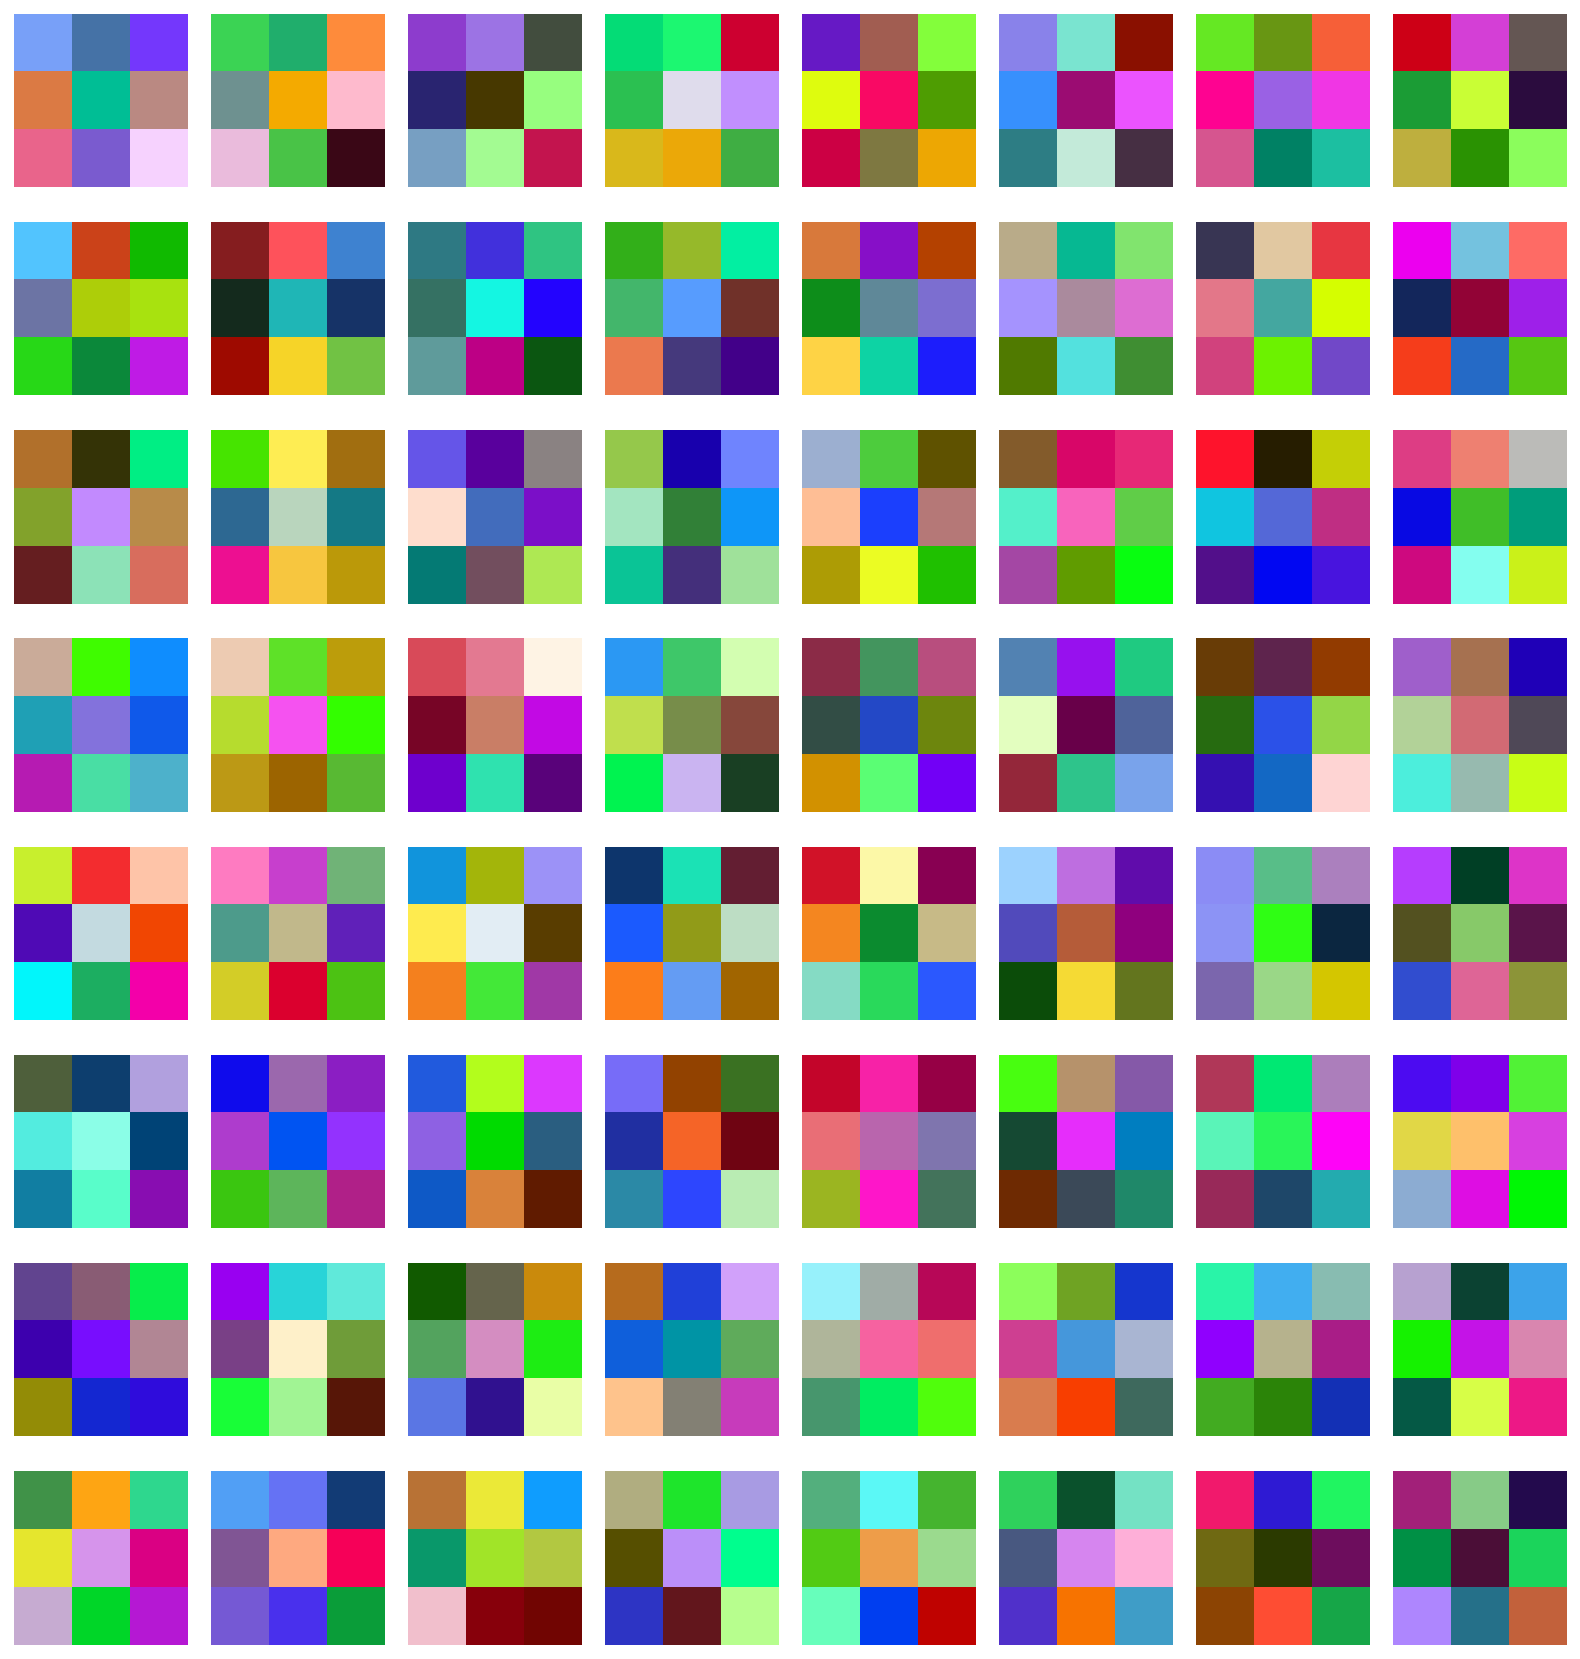

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.33      0.97      0.50       270
sweatshirt-female       0.41      0.04      0.08       270
  sweatshirt-male       0.00      0.00      0.00       270

         accuracy                           0.34       810
        macro avg       0.25      0.34      0.19       810
     weighted avg       0.25      0.34      0.19       810



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.337037037037037


### VGG-16 MODEL Batch size 128

In [ ]:
batch_size = 128
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]


train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
vgg16_layers = get_vgg_layers(vgg16_config, batch_norm=True)
#print(vgg11_layers)

OUTPUT_DIM = 3

model = VGG(vgg16_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg16_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

C:\Users\22536729\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\22536729\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 128,969,027 trainable parameters


Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=FOUND_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 54s
	Train Loss: 685.979 | Train Acc: 33.79%
	 Val. Loss: 34.097 |  Val. Acc: 31.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 55s
	Train Loss: 38.324 | Train Acc: 33.62%
	 Val. Loss: 73.812 |  Val. Acc: 36.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 55s
	Train Loss: 13.781 | Train Acc: 34.00%
	 Val. Loss: 1.102 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 58s
	Train Loss: 1.117 | Train Acc: 32.54%
	 Val. Loss: 1.098 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 55s
	Train Loss: 1.158 | Train Acc: 33.50%
	 Val. Loss: 1.096 |  Val. Acc: 34.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 56s
	Train Loss: 1.098 | Train Acc: 32.67%
	 Val. Loss: 1.092 |  Val. Acc: 36.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 56s
	Train Loss: 1.092 | Train Acc: 34.83%
	 Val. Loss: 1.093 |  Val. Acc: 36.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 54s
	Train Loss: 1.098 | Train Acc: 32.46%
	 Val. Loss: 1.091 |  Val. Acc: 35.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 53s
	Train Loss: 1.097 | Train Acc: 33.54%
	 Val. Loss: 1.099 |  Val. Acc: 33.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 2m 14s
	Train Loss: 1.100 | Train Acc: 32.25%
	 Val. Loss: 1.099 |  Val. Acc: 33.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 2m 39s
	Train Loss: 1.097 | Train Acc: 35.17%
	 Val. Loss: 1.095 |  Val. Acc: 36.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 2m 40s
	Train Loss: 1.097 | Train Acc: 34.50%
	 Val. Loss: 1.092 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 2m 36s
	Train Loss: 1.097 | Train Acc: 32.50%
	 Val. Loss: 1.094 |  Val. Acc: 35.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 2m 37s
	Train Loss: 1.099 | Train Acc: 33.21%
	 Val. Loss: 1.090 |  Val. Acc: 34.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 2m 35s
	Train Loss: 1.097 | Train Acc: 34.50%
	 Val. Loss: 1.098 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 2m 38s
	Train Loss: 1.097 | Train Acc: 33.83%
	 Val. Loss: 1.088 |  Val. Acc: 37.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 2m 46s
	Train Loss: 1.093 | Train Acc: 35.29%
	 Val. Loss: 1.097 |  Val. Acc: 36.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 2m 51s
	Train Loss: 1.101 | Train Acc: 36.12%
	 Val. Loss: 1.092 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 2m 51s
	Train Loss: 1.517 | Train Acc: 32.08%
	 Val. Loss: 1.114 |  Val. Acc: 33.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 2m 49s
	Train Loss: 1.106 | Train Acc: 34.67%
	 Val. Loss: 1.099 |  Val. Acc: 33.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 2m 48s
	Train Loss: 1.103 | Train Acc: 32.62%
	 Val. Loss: 34.945 |  Val. Acc: 30.63%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 2m 50s
	Train Loss: 62.635 | Train Acc: 35.50%
	 Val. Loss: 487.740 |  Val. Acc: 35.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 2m 51s
	Train Loss: 10.631 | Train Acc: 35.50%
	 Val. Loss: 1.099 |  Val. Acc: 33.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 2m 51s
	Train Loss: 1.110 | Train Acc: 30.83%
	 Val. Loss: 1.100 |  Val. Acc: 32.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 2m 50s
	Train Loss: 1.105 | Train Acc: 33.33%
	 Val. Loss: 1.099 |  Val. Acc: 33.62%


#### Losses and Accuracy VGG lr 1e-2 plots.

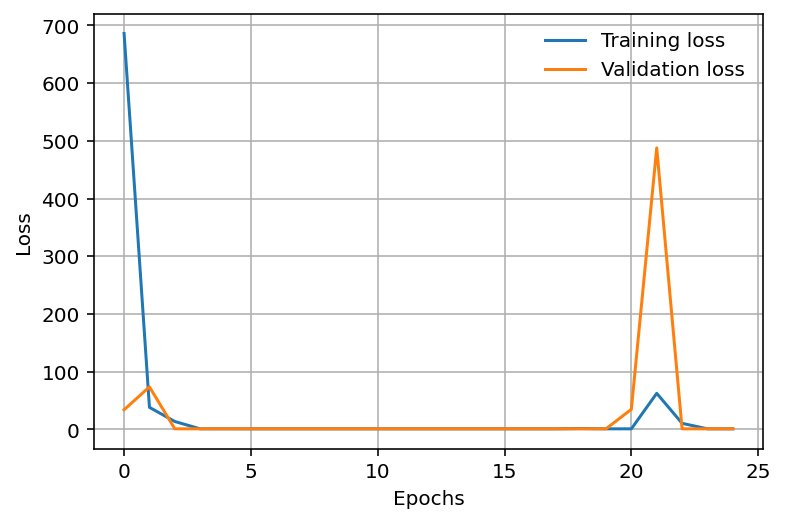

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

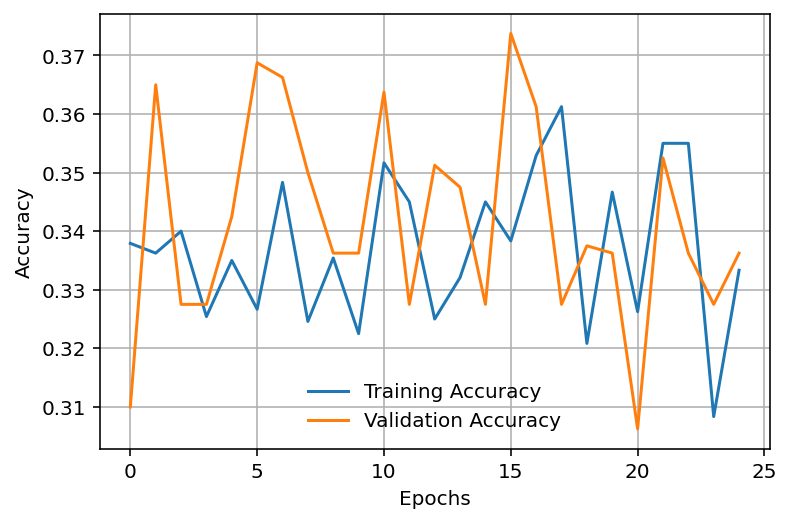

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('best-model.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_VGG-l28.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22536729/OneDrive - MMU/Deep learning project/predictions/VGG/prediction_VGG-lr-e-2.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
717     sweatshirt-male (579)           0.354114           0.332956   
763      sweatshirt-male (80)           0.354114           0.332956   
754      sweatshirt-male (77)           0.354114           0.332956   
619     sweatshirt-male (140)           0.098789           0.421219   
398   sweatshirt-female (202)           0.354114           0.332956   
178    shirt-shortsleeve (58)           0.354114           0.332956   
664     sweatshirt-male (359)           0.354114           0.332956   
402  sweatshirt-female (2051)           0.354114           0.332956   
653     sweatshirt-male (310)           0.127127           0.372300   
155   shirt-shortsleeve (497)           0.354114           0.332956   
239   shirt-shortsleeve (866)           0.354114           0.332956   
390  sweatshirt-female (1973)           0.354114           0.332956   
576    sweatshirt-male (1130)           0.354114           0.332956   
298  sweatshirt-female (1169)           0.354114           0.332956   
252   shirt-shortsleeve (915)           0.354114           0.332956   
414  sweatshirt-female (2146)           0.100056           0.418221   
485   sweatshirt-female (620)           0.354114           0.332956   
287  sweatshirt-female (1113)           0.354114           0.332956   
543     sweatshirt-male (102)           0.354114           0.332956   
734     sweatshirt-male (650)           0.354114           0.332956   

     sweatshirt-male  
717         0.312930  
763         0.312930  
754         0.312930  
619         0.479992  
398         0.312930  
178         0.312930  
664         0.312930  
402         0.312930  
653         0.500573  
155         0.312930  
239         0.312930  
390         0.312930  
576         0.312930  
298         0.312930  
252         0.312930  
414         0.481723  
485         0.312930  
287         0.312930  
543         0.312930  
734         0.312930

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

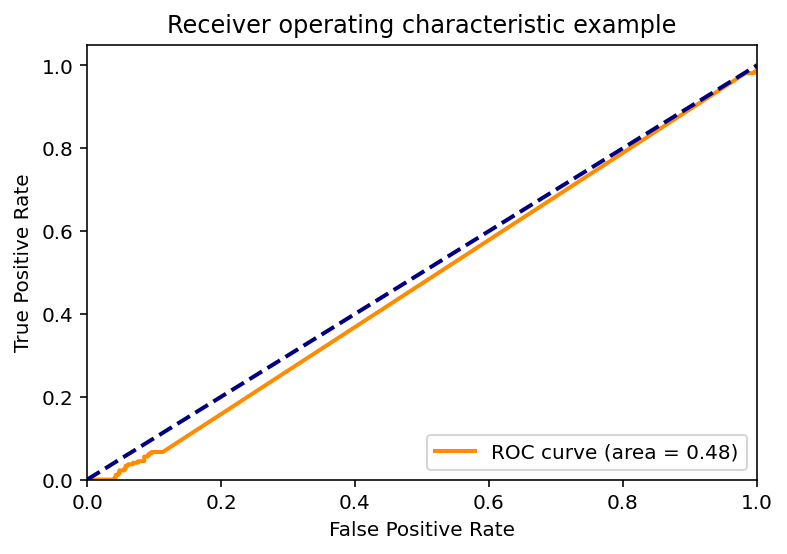

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


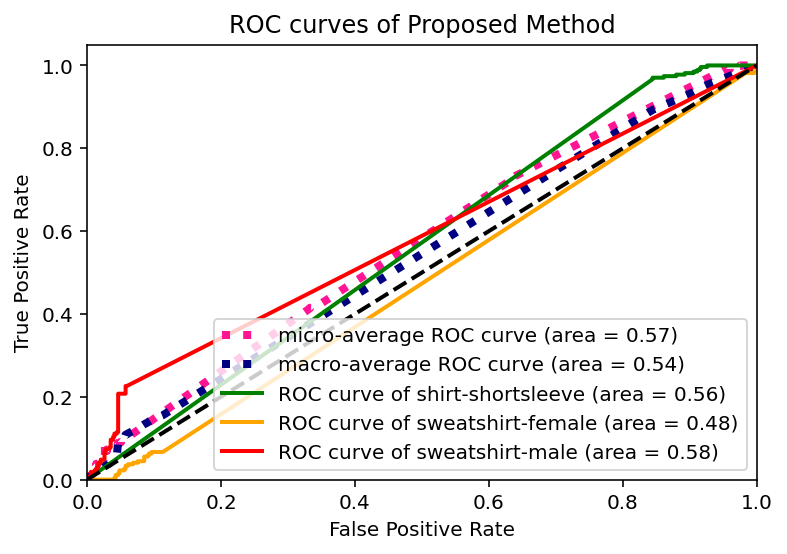

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

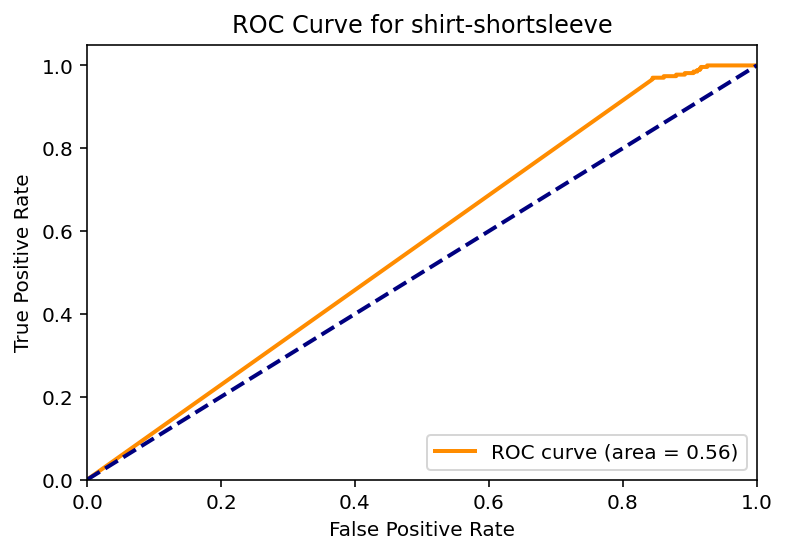

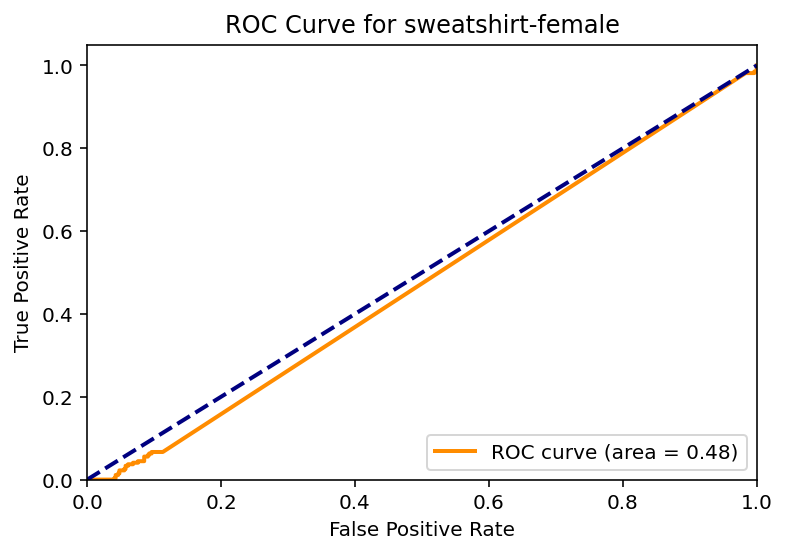

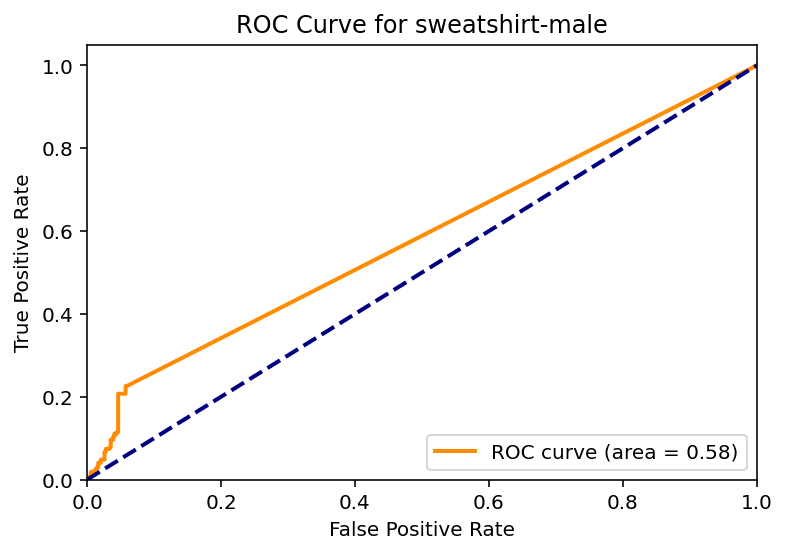

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[262   0   8]
 [247   0  23]
 [213   0  57]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

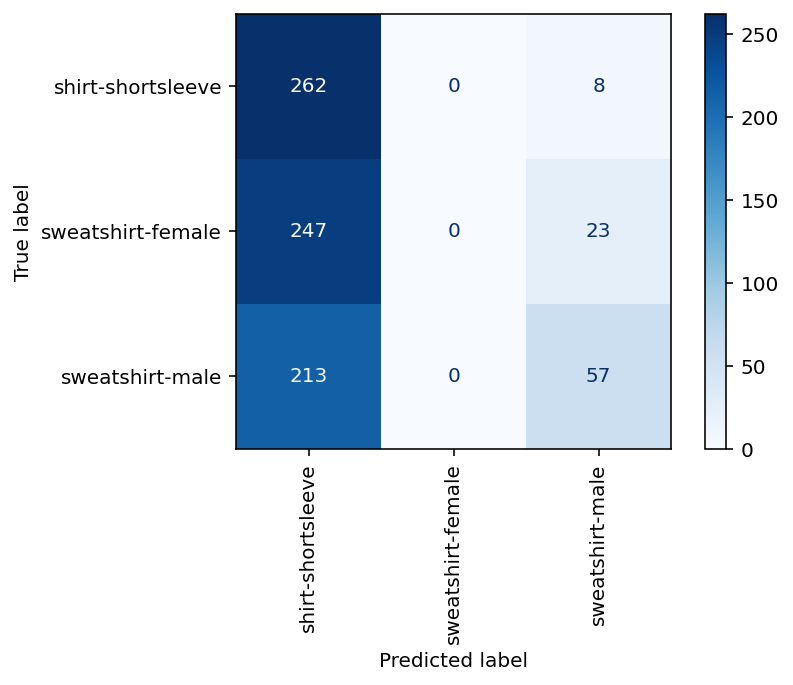

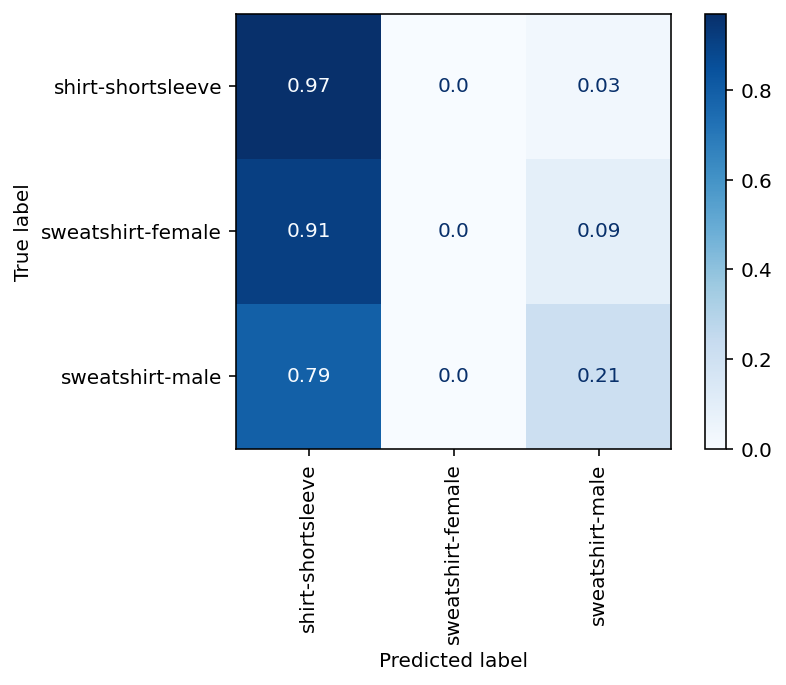

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

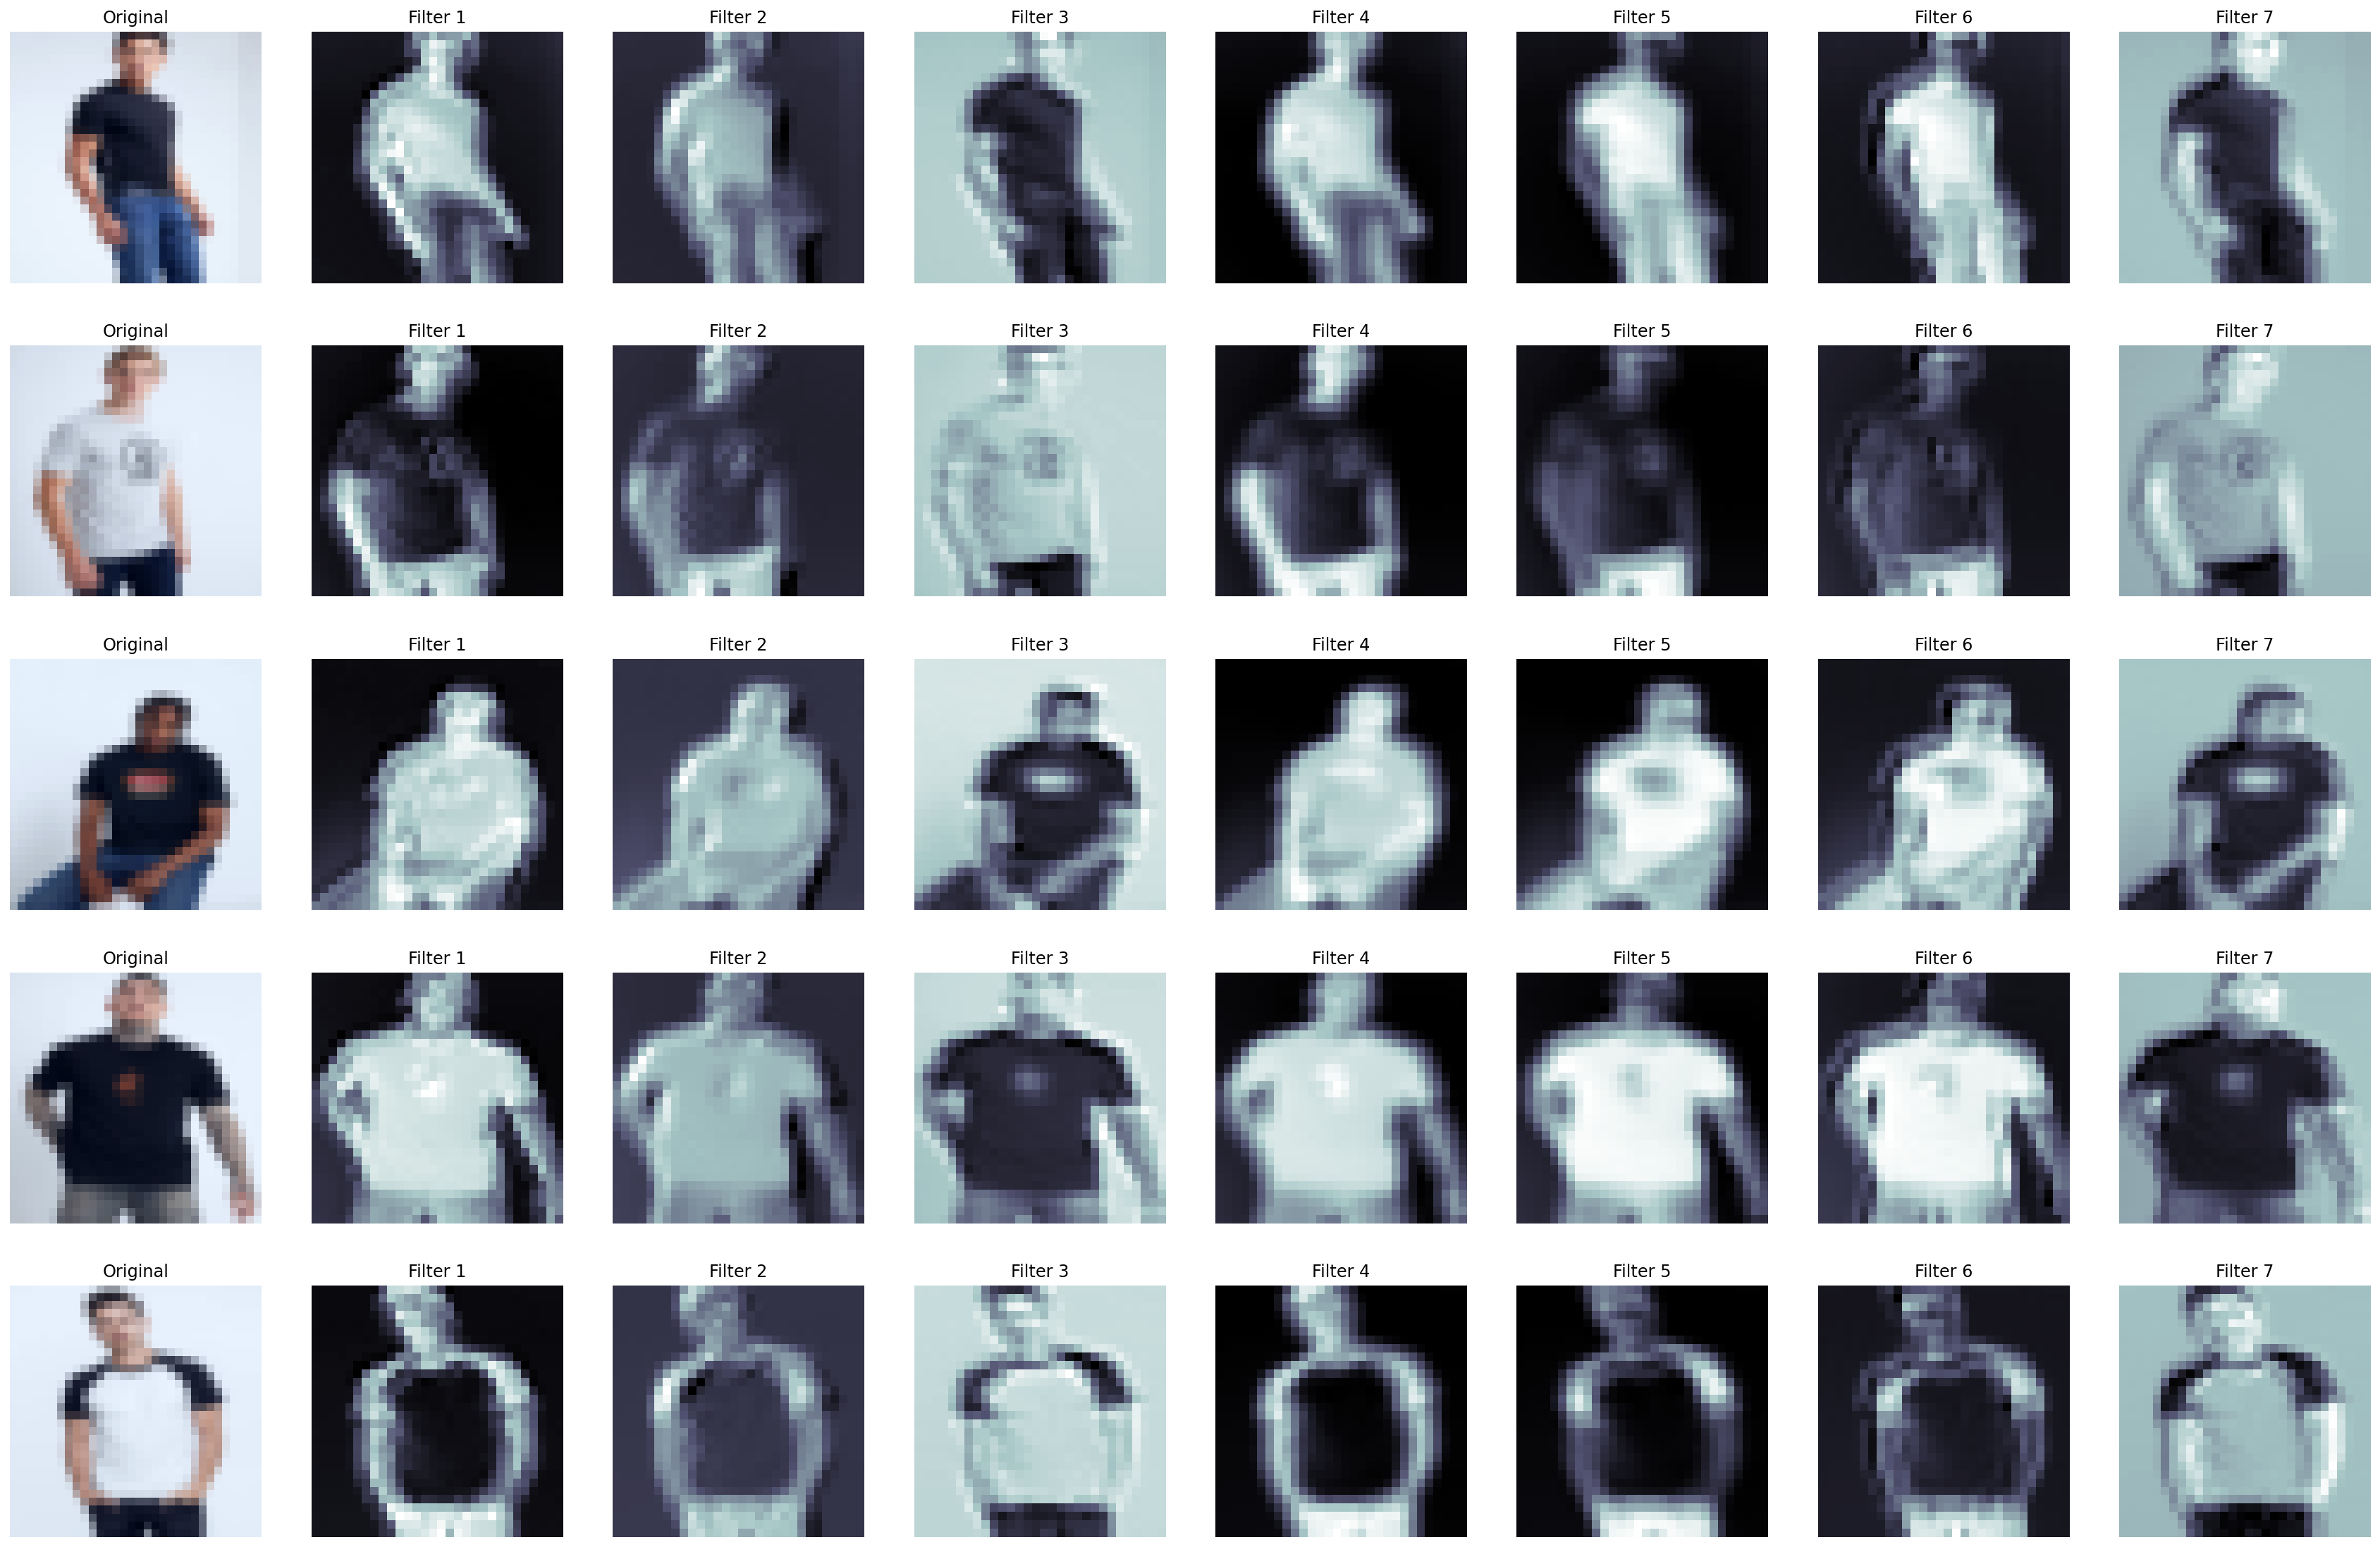

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

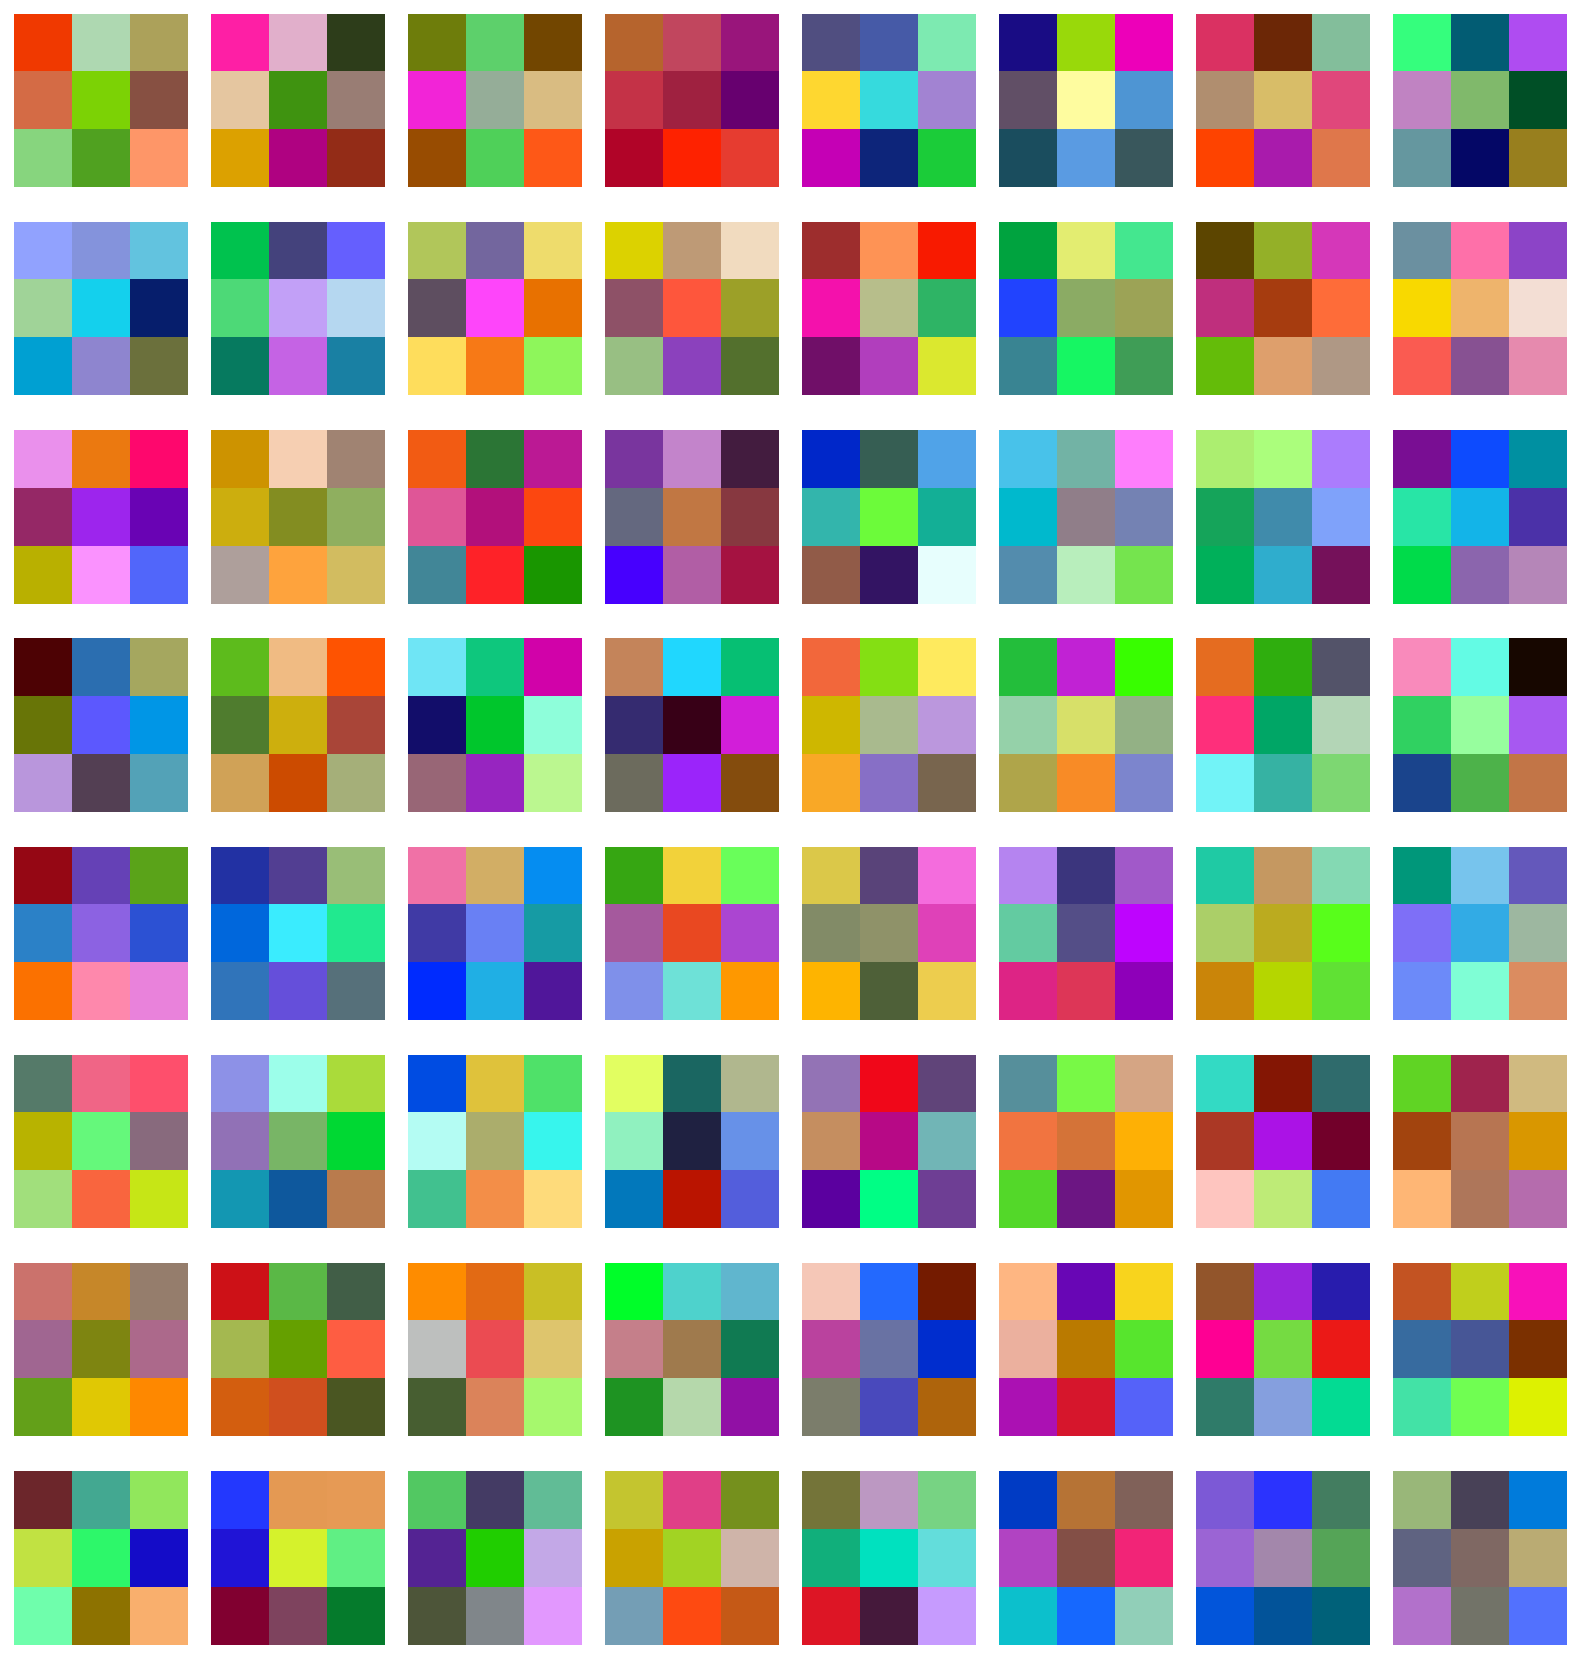

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.36      0.97      0.53       270
sweatshirt-female       0.00      0.00      0.00       270
  sweatshirt-male       0.65      0.21      0.32       270

         accuracy                           0.39       810
        macro avg       0.34      0.39      0.28       810
     weighted avg       0.34      0.39      0.28       810



C:\Users\22536729\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\22536729\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\22536729\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.39382716049382716


### ResNet MODEL152 Batch size 32

In [ ]:
batch_size = 32
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]

In [ ]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()

        block, n_blocks, channels = config
        self.in_channels = channels[0]

        assert len(n_blocks) == len(channels) == 4

        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)

    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):

        layers = []

        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False

        layers.append(block(self.in_channels, channels, stride, downsample))

        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels

        return nn.Sequential(*layers)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)

        return x, h

class BasicBlock(nn.Module):

    expansion = 1

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):

    expansion = 4

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])

In [ ]:
pretrained_model = models.resnet152(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features
OUTPUT_DIM = 3

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
model = ResNet(resnet152_config, OUTPUT_DIM)
model.load_state_dict(pretrained_model.state_dict())

<All keys matched successfully>

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 58,149,955 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]

optimizer = optim.Adam(params, lr = FOUND_LR)

In [ ]:
EPOCHS = 25
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

print(MAX_LRS)

[0.0001, 0.0001, 0.000125, 0.00016666666666666666, 0.00025, 0.0005, 0.001]


In [ ]:
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
def train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs_1 = []
valid_accs_1 = []

train_accs_5 = []
valid_accs_5 = []

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model,valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs_1.append(train_acc_1)
    valid_accs_1.append(valid_acc_1)
    train_accs_5.append(train_acc_5)
    valid_accs_5.append(valid_acc_5)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelresnet32.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% |'\
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% |'\
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

Epoch: 01 | Epoch Time: 1m 53s
	Train Loss: 1.009 | Train Acc @1:  49.62% |Train Acc @5:  78.08%
	Valid Loss: 1.201 | Valid Acc @1:  59.62% |Valid Acc @5:  86.38%
Epoch: 02 | Epoch Time: 1m 59s
	Train Loss: 0.654 | Train Acc @1:  72.29% |Train Acc @5:  93.08%
	Valid Loss: 0.958 | Valid Acc @1:  75.00% |Valid Acc @5:  92.88%
Epoch: 03 | Epoch Time: 2m 2s
	Train Loss: 0.381 | Train Acc @1:  86.17% |Train Acc @5:  97.29%
	Valid Loss: 0.515 | Valid Acc @1:  81.75% |Valid Acc @5:  96.12%
Epoch: 04 | Epoch Time: 2m 2s
	Train Loss: 0.328 | Train Acc @1:  87.67% |Train Acc @5:  98.17%
	Valid Loss: 0.437 | Valid Acc @1:  84.38% |Valid Acc @5:  97.25%
Epoch: 05 | Epoch Time: 2m 2s
	Train Loss: 0.240 | Train Acc @1:  91.21% |Train Acc @5:  98.62%
	Valid Loss: 0.322 | Valid Acc @1:  86.88% |Valid Acc @5:  98.12%
Epoch: 06 | Epoch Time: 2m 1s
	Train Loss: 0.152 | Train Acc @1:  94.79% |Train Acc @5:  99.54%
	Valid Loss: 0.317 | Valid Acc @1:  86.88% |Valid Acc @5:  98.75%
Epoch: 07 | Epoch Time: 2m

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

#### Losses and Accuracy ResNet lr 1e-3 plots.

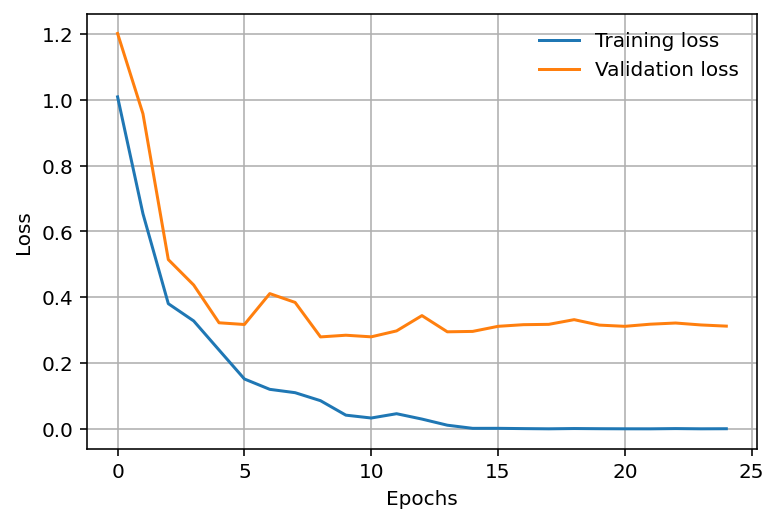

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

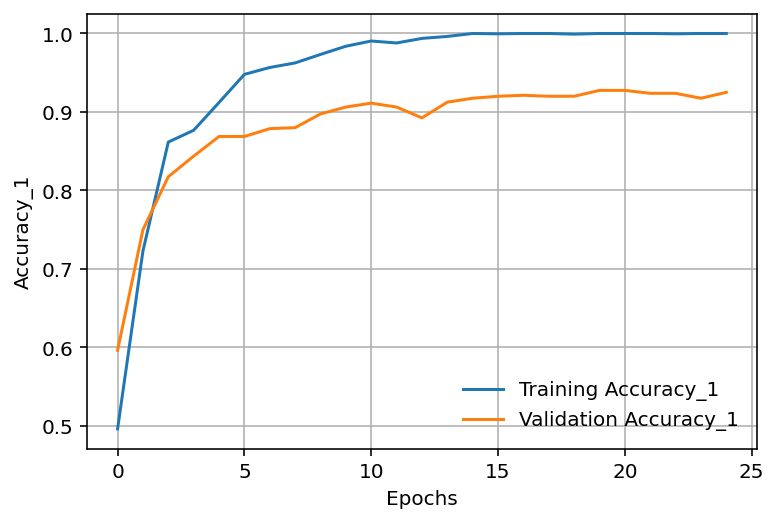

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_1, label='Training Accuracy_1')
plt.plot(valid_accs_1, label='Validation Accuracy_1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_1")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

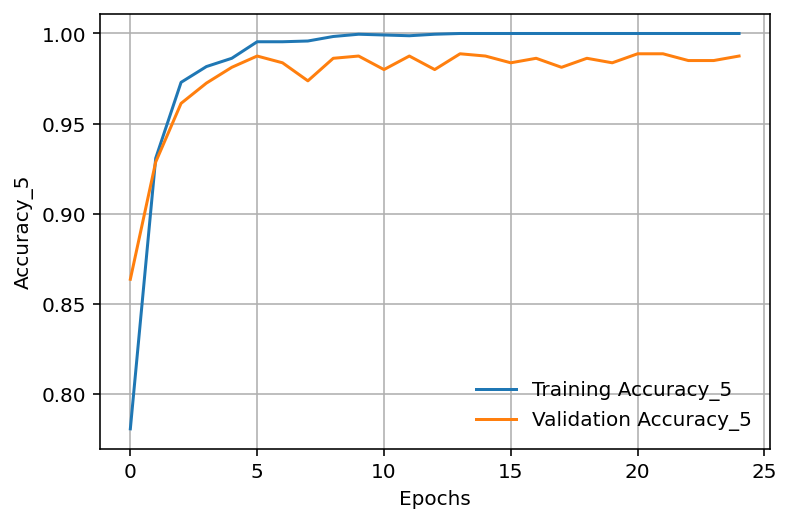

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_5, label='Training Accuracy_5')
plt.plot(valid_accs_5, label='Validation Accuracy_5')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_5")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelresnet32.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

In [ ]:
labels.unique()

tensor([0])

In [ ]:
len(probs)

810

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_resNET32.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_resNET32.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
524   sweatshirt-female (859)       7.605445e-10       9.999999e-01   
26   shirt-shortsleeve (1098)       9.997645e-01       5.253878e-05   
342  sweatshirt-female (1515)       8.060931e-14       1.000000e+00   
466   sweatshirt-female (420)       2.807963e-06       9.997371e-01   
525   sweatshirt-female (861)       8.758291e-06       9.994842e-01   
282  sweatshirt-female (1067)       1.772261e-01       7.791743e-01   
549    sweatshirt-male (1030)       5.975987e-09       1.813045e-07   
473   sweatshirt-female (497)       1.582119e-06       9.896976e-01   
15   shirt-shortsleeve (1067)       5.087768e-01       1.141332e-01   
685     sweatshirt-male (451)       2.390989e-02       6.412600e-04   
756     sweatshirt-male (781)       1.065856e-04       6.456867e-03   
349  sweatshirt-female (1575)       7.770608e-07       9.999961e-01   
786     sweatshirt-male (900)       1.479042e-08       1.574333e-05   
729      sweatshirt-male (63)       2.313296e-03       7.636887e-01   
286  sweatshirt-female (1112)       2.751082e-03       9.620590e-01   
625     sweatshirt-male (149)       2.035932e-07       1.461098e-07   
22   shirt-shortsleeve (1082)       9.997562e-01       1.993195e-05   
563    sweatshirt-male (1091)       1.833360e-05       4.106237e-04   
256   shirt-shortsleeve (929)       9.949701e-01       1.316600e-03   
108    shirt-shortsleeve (29)       9.999958e-01       3.671999e-07   

     sweatshirt-male  
524     1.513965e-07  
26      1.829790e-04  
342     5.162444e-09  
466     2.600287e-04  
525     5.069302e-04  
282     4.359957e-02  
549     9.999998e-01  
473     1.030084e-02  
15      3.770900e-01  
685     9.754488e-01  
756     9.934366e-01  
349     3.098834e-06  
786     9.999843e-01  
729     2.339980e-01  
286     3.518986e-02  
625     9.999996e-01  
22      2.238840e-04  
563     9.995710e-01  
256     3.713369e-03  
108     3.845664e-06

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

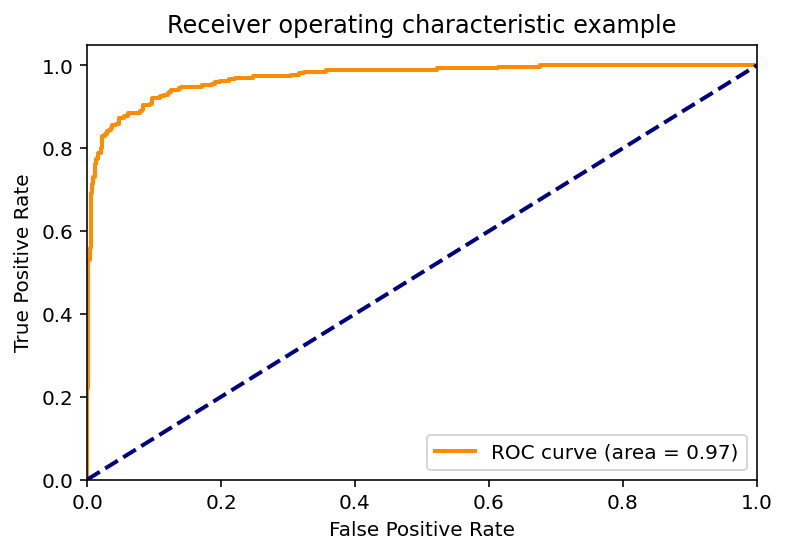

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\1555494331.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


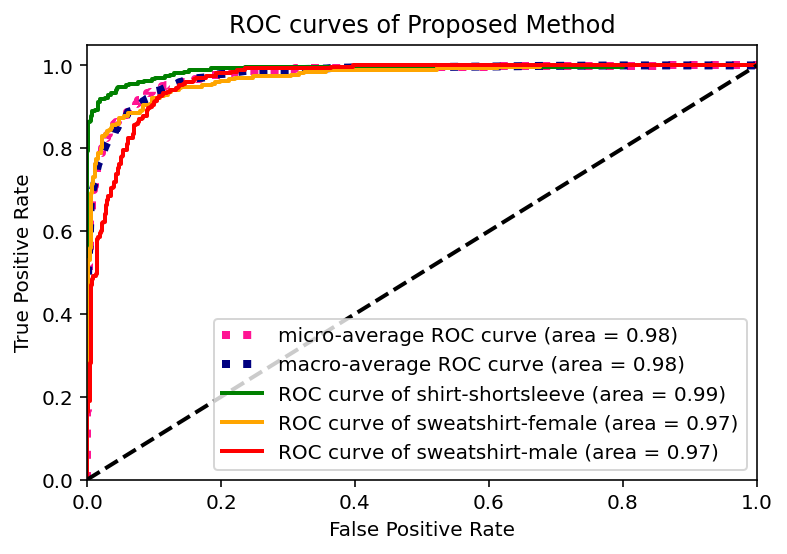

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

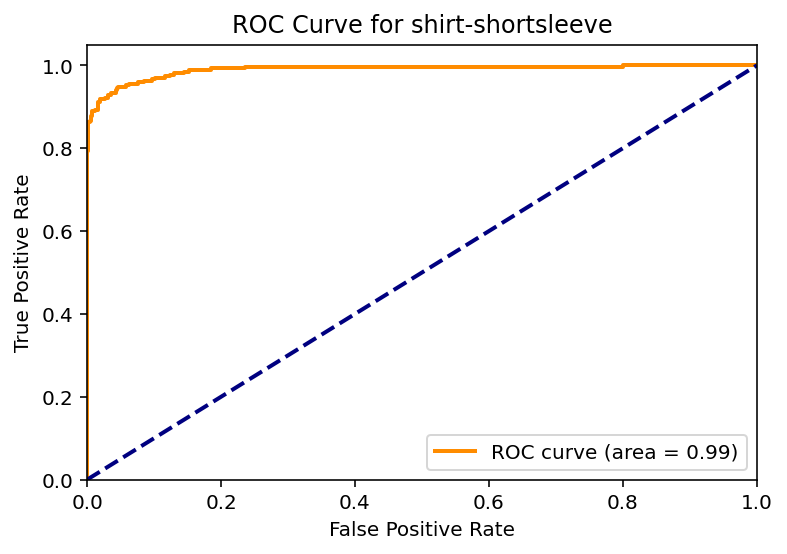

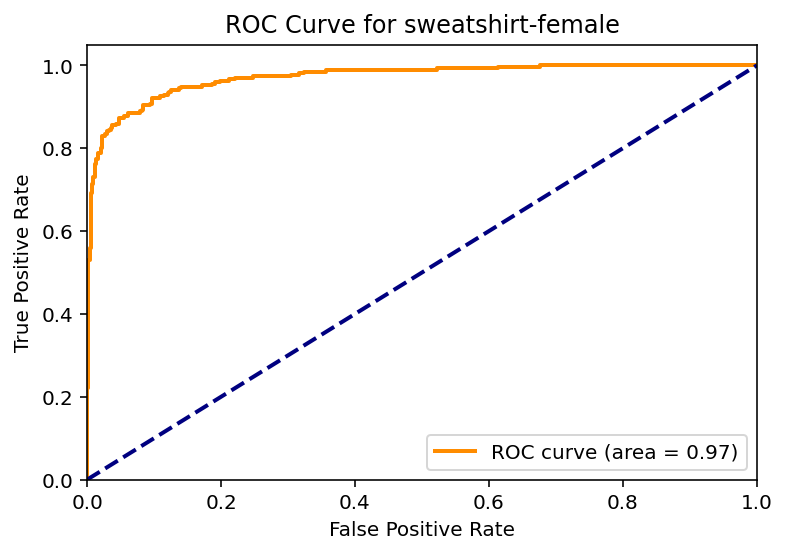

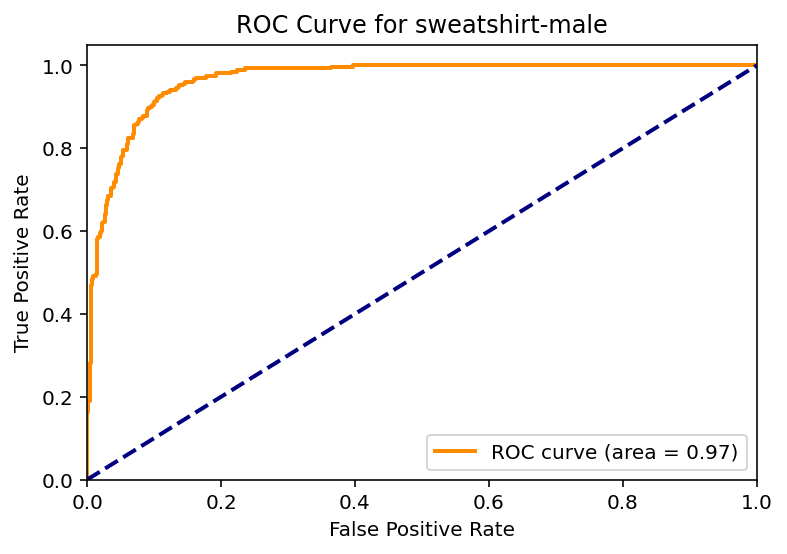

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[249   8  13]
 [  5 240  25]
 [ 12  32 226]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

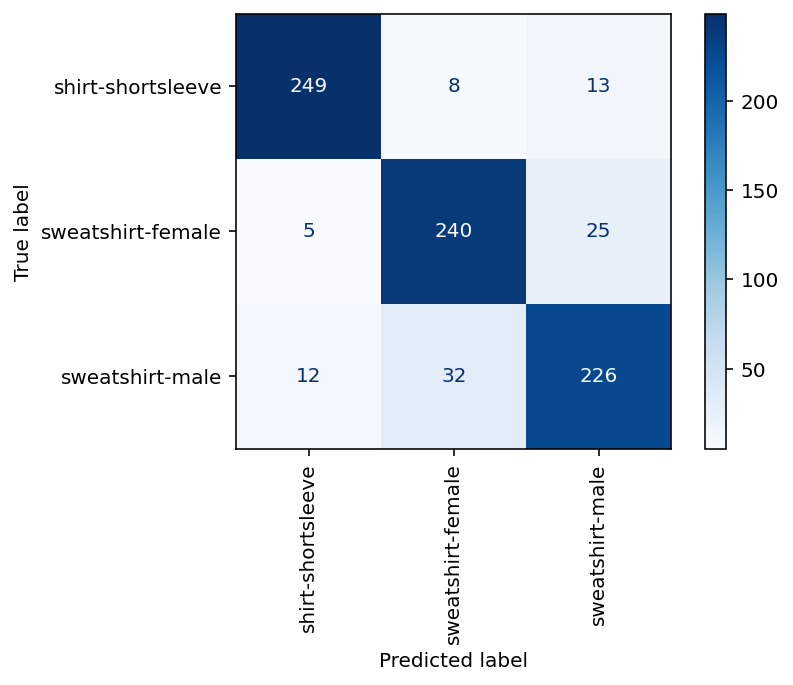

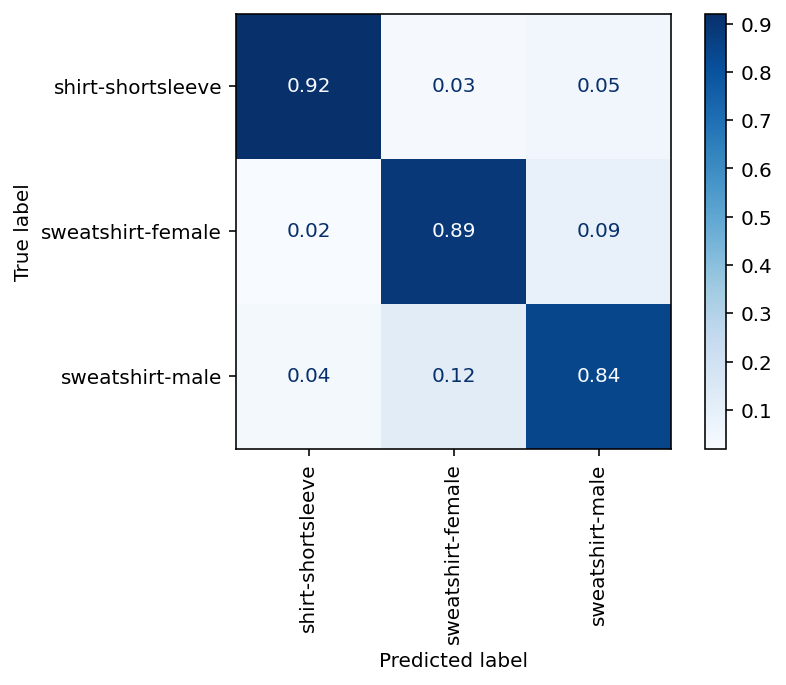

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)

C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270


cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.94      0.92      0.93       270
sweatshirt-female       0.86      0.89      0.87       270
  sweatshirt-male       0.86      0.84      0.85       270

         accuracy                           0.88       810
        macro avg       0.88      0.88      0.88       810
     weighted avg       0.88      0.88      0.88       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.8827160493827161


### ResNet152 MODEL Batch size 64

In [ ]:
batch_size = 64
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]

In [ ]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()

        block, n_blocks, channels = config
        self.in_channels = channels[0]

        assert len(n_blocks) == len(channels) == 4

        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)

    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):

        layers = []

        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False

        layers.append(block(self.in_channels, channels, stride, downsample))

        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels

        return nn.Sequential(*layers)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)

        return x, h

class BasicBlock(nn.Module):

    expansion = 1

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):

    expansion = 4

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])


pretrained_model = models.resnet152(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features
OUTPUT_DIM = 3

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
model = ResNet(resnet152_config, OUTPUT_DIM)
model.load_state_dict(pretrained_model.state_dict())

C:\Users\22549275\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\22549275\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]

optimizer = optim.Adam(params, lr = FOUND_LR)

In [ ]:
EPOCHS = 25
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

print(MAX_LRS)

[0.0001, 0.0001, 0.000125, 0.00016666666666666666, 0.00025, 0.0005, 0.001]


In [ ]:
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
def train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs_1 = []
valid_accs_1 = []

train_accs_5 = []
valid_accs_5 = []

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model,valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs_1.append(train_acc_1)
    valid_accs_1.append(valid_acc_1)
    train_accs_5.append(train_acc_5)
    valid_accs_5.append(valid_acc_5)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelresnet64.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% |'\
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% |'\
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

Epoch: 01 | Epoch Time: 1m 51s
	Train Loss: 0.994 | Train Acc @1:  51.71% |Train Acc @5:  78.54%
	Valid Loss: 1.474 | Valid Acc @1:  63.38% |Valid Acc @5:  86.62%
Epoch: 02 | Epoch Time: 1m 52s
	Train Loss: 0.616 | Train Acc @1:  74.88% |Train Acc @5:  93.08%
	Valid Loss: 0.672 | Valid Acc @1:  74.25% |Valid Acc @5:  93.88%
Epoch: 03 | Epoch Time: 1m 51s
	Train Loss: 0.407 | Train Acc @1:  84.38% |Train Acc @5:  97.00%
	Valid Loss: 0.547 | Valid Acc @1:  80.25% |Valid Acc @5:  95.75%
Epoch: 04 | Epoch Time: 1m 53s
	Train Loss: 0.346 | Train Acc @1:  87.08% |Train Acc @5:  97.46%
	Valid Loss: 0.470 | Valid Acc @1:  82.88% |Valid Acc @5:  95.62%
Epoch: 05 | Epoch Time: 1m 53s
	Train Loss: 0.248 | Train Acc @1:  91.42% |Train Acc @5:  98.83%
	Valid Loss: 0.320 | Valid Acc @1:  87.88% |Valid Acc @5:  97.50%
Epoch: 06 | Epoch Time: 1m 55s
	Train Loss: 0.160 | Train Acc @1:  94.54% |Train Acc @5:  99.58%
	Valid Loss: 0.341 | Valid Acc @1:  88.38% |Valid Acc @5:  97.38%
Epoch: 07 | Epoch Time

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

#### Losses and Accuracy ResNet lr 1e-2 plots.

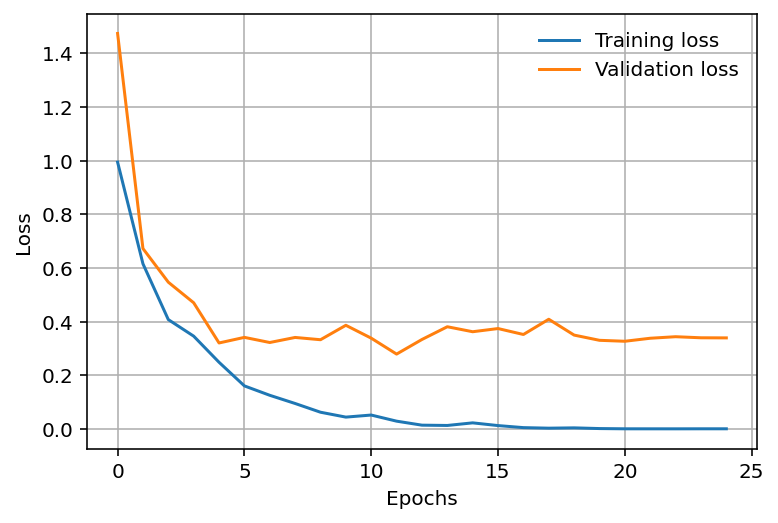

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

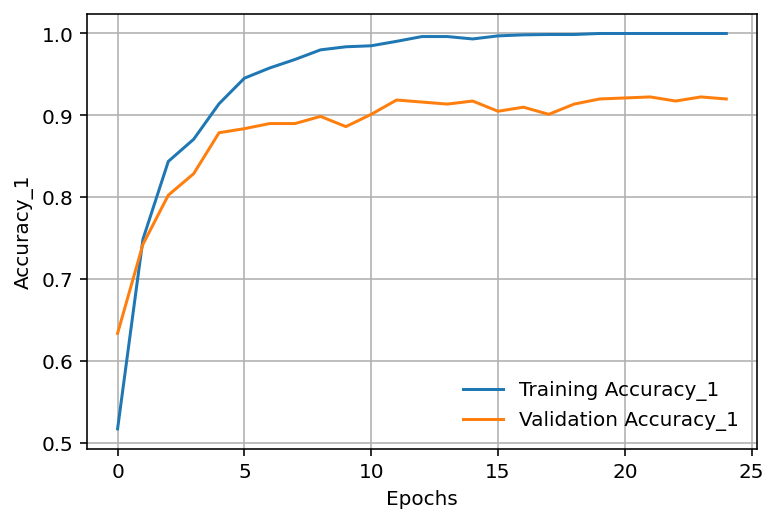

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_1, label='Training Accuracy_1')
plt.plot(valid_accs_1, label='Validation Accuracy_1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_1")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

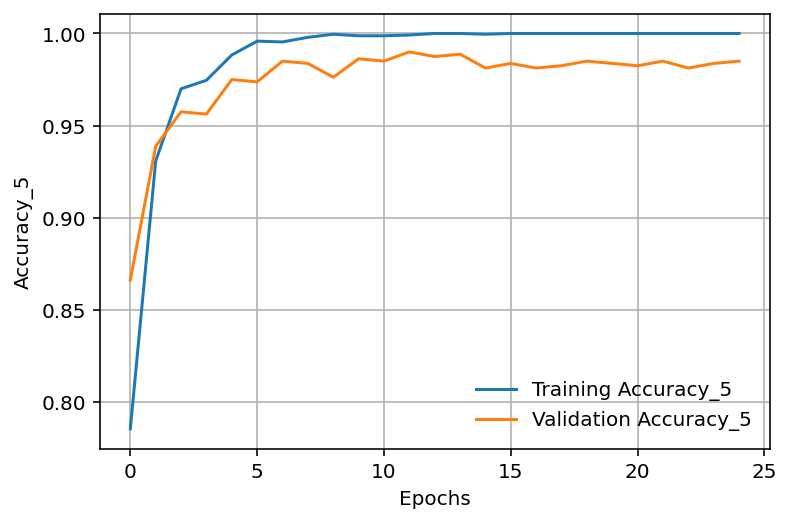

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_5, label='Training Accuracy_5')
plt.plot(valid_accs_5, label='Validation Accuracy_5')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_5")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelresnet64.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

In [ ]:
labels.unique()

tensor([0])

In [ ]:
len(probs)

810

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_resNET64.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_resNET64.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
725     sweatshirt-male (604)       2.252145e-13       3.993940e-09   
258   shirt-shortsleeve (945)       9.998668e-01       9.529605e-06   
25   shirt-shortsleeve (1097)       9.999988e-01       7.153303e-07   
43   shirt-shortsleeve (1162)       9.997556e-01       7.905730e-05   
306  sweatshirt-female (1214)       1.795905e-07       9.999661e-01   
398   sweatshirt-female (202)       1.493692e-08       9.999963e-01   
420  sweatshirt-female (2225)       1.389471e-06       9.952025e-01   
171   shirt-shortsleeve (563)       9.998289e-01       9.788217e-05   
426  sweatshirt-female (2260)       2.888347e-06       9.999936e-01   
739     sweatshirt-male (685)       8.889230e-01       2.718917e-03   
749     sweatshirt-male (755)       1.246824e-05       9.827721e-01   
174   shirt-shortsleeve (572)       8.904567e-01       2.250621e-02   
357  sweatshirt-female (1602)       6.192009e-04       9.956364e-01   
553    sweatshirt-male (1049)       5.590286e-05       1.724222e-01   
611    sweatshirt-male (1318)       5.400306e-03       5.916777e-01   
740     sweatshirt-male (688)       1.066269e-11       4.519449e-08   
157   shirt-shortsleeve (507)       9.987230e-01       5.940595e-05   
209   shirt-shortsleeve (755)       9.996215e-01       1.642508e-04   
707     sweatshirt-male (537)       5.290824e-05       6.483895e-01   
280  sweatshirt-female (1058)       6.985575e-02       9.176104e-01   

     sweatshirt-male  
725     1.000000e+00  
258     1.236107e-04  
25      4.569416e-07  
43      1.653731e-04  
306     3.358980e-05  
398     3.735278e-06  
420     4.796064e-03  
171     7.318637e-05  
426     3.591309e-06  
739     1.083581e-01  
749     1.721556e-02  
174     8.703707e-02  
357     3.744409e-03  
553     8.275219e-01  
611     4.029219e-01  
740     1.000000e+00  
157     1.217561e-03  
209     2.142762e-04  
707     3.515576e-01  
280     1.253385e-02

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

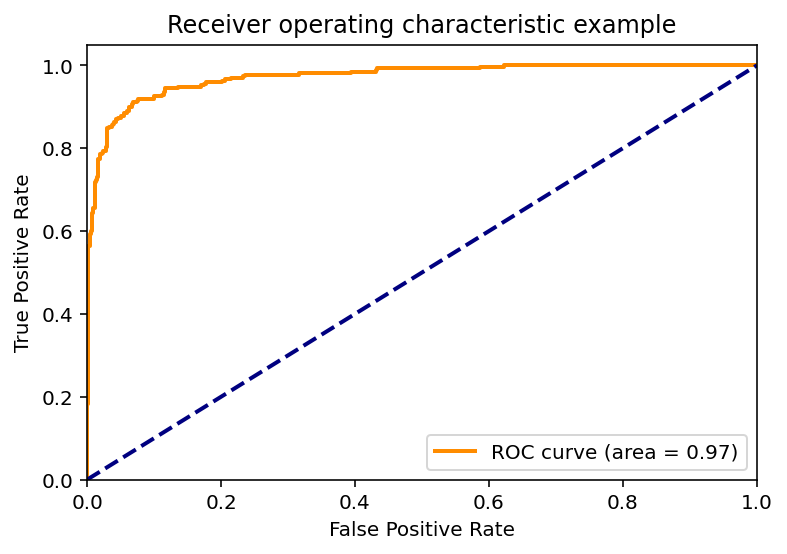

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\1555494331.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


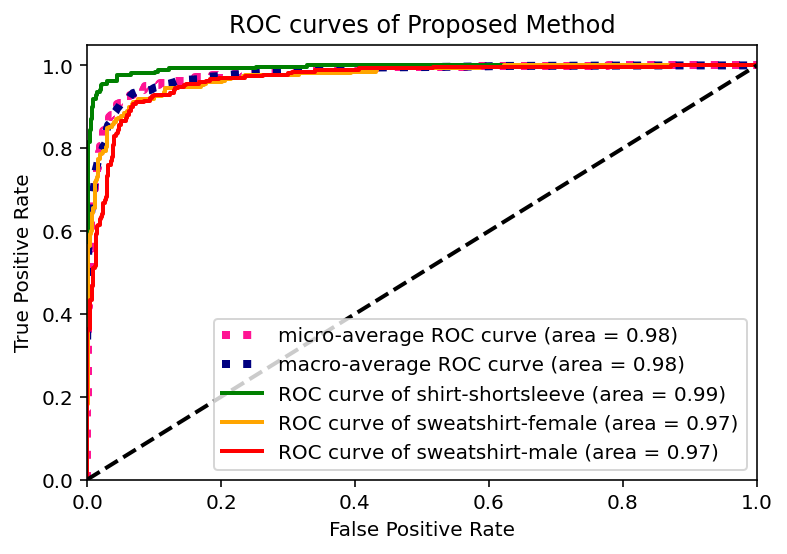

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

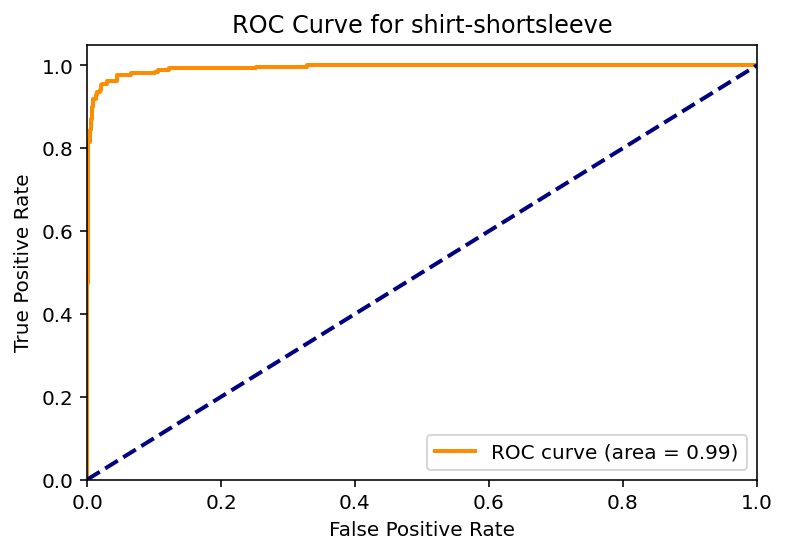

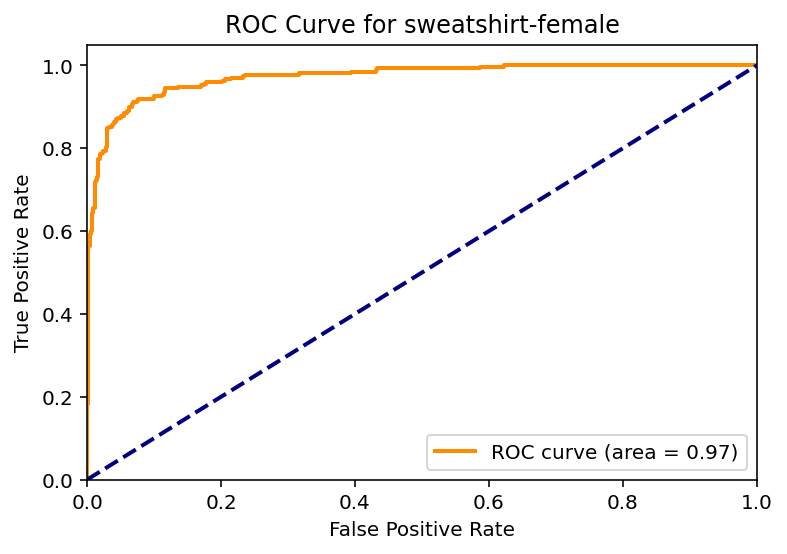

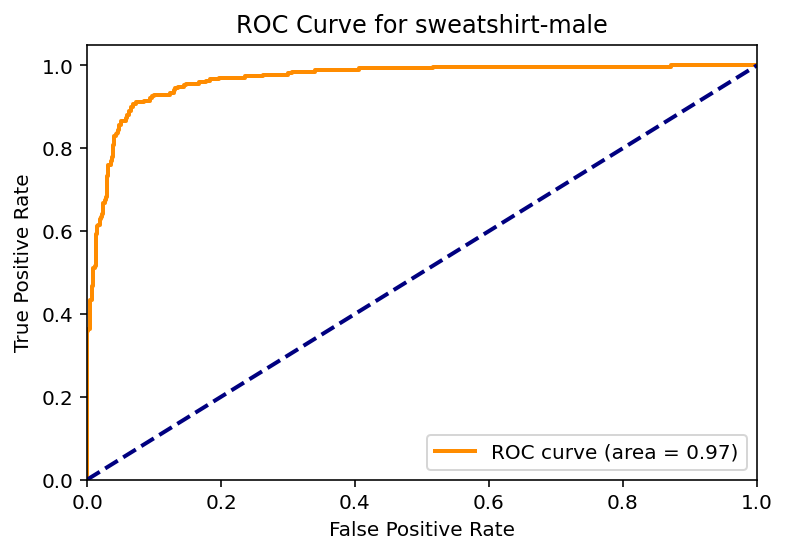

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[258   6   6]
 [  5 244  21]
 [  8  28 234]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

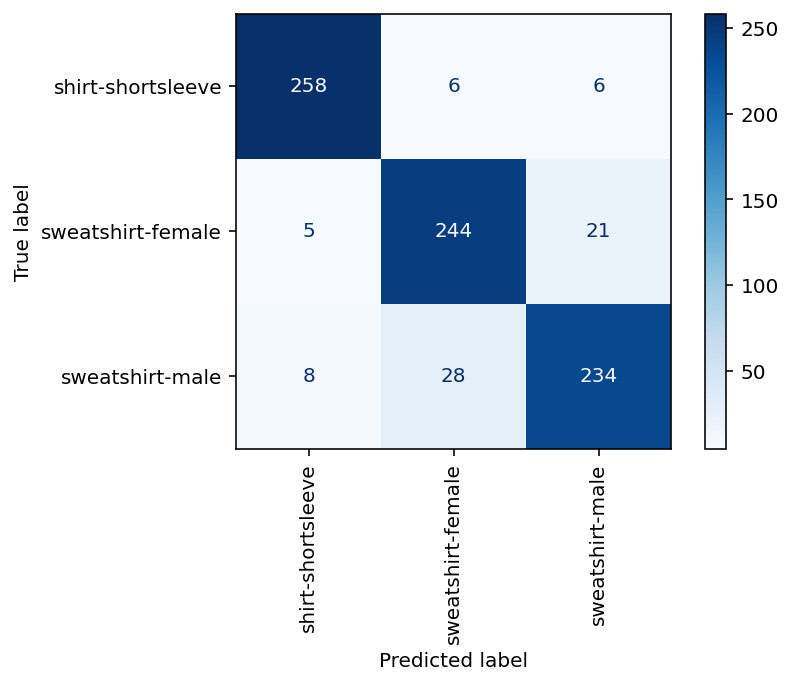

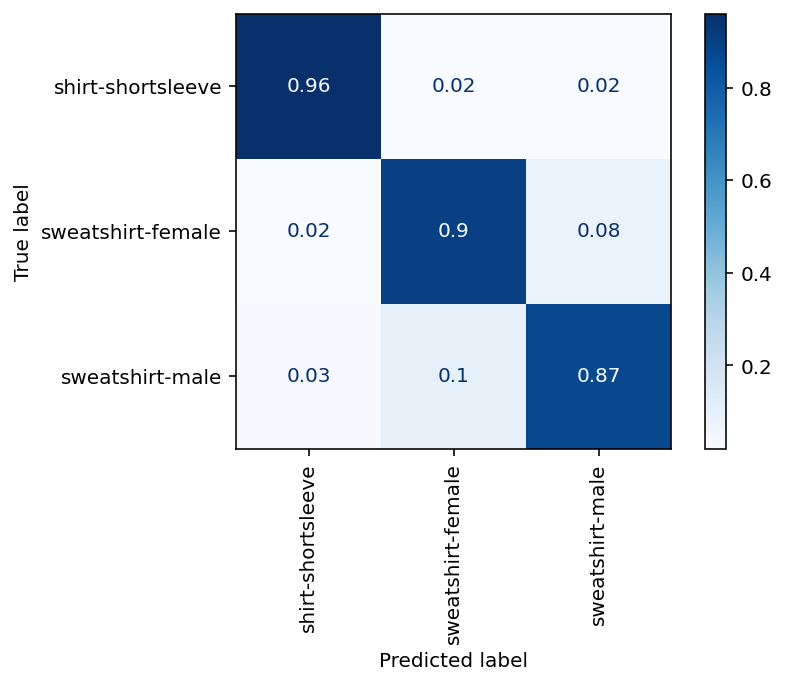

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270


cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.95      0.96      0.95       270
sweatshirt-female       0.88      0.90      0.89       270
  sweatshirt-male       0.90      0.87      0.88       270

         accuracy                           0.91       810
        macro avg       0.91      0.91      0.91       810
     weighted avg       0.91      0.91      0.91       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.908641975308642


### ResNet152 MODEL batch size 128

In [ ]:
batch_size = 128
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

data_dir = 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]

In [ ]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()

        block, n_blocks, channels = config
        self.in_channels = channels[0]

        assert len(n_blocks) == len(channels) == 4

        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)

    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):

        layers = []

        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False

        layers.append(block(self.in_channels, channels, stride, downsample))

        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels

        return nn.Sequential(*layers)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)

        return x, h

class BasicBlock(nn.Module):

    expansion = 1

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):

    expansion = 4

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])


pretrained_model = models.resnet152(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features
OUTPUT_DIM = 3

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
model = ResNet(resnet152_config, OUTPUT_DIM)
model.load_state_dict(pretrained_model.state_dict())

C:\Users\22549275\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\22549275\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]

optimizer = optim.Adam(params, lr = FOUND_LR)

In [ ]:
EPOCHS = 25
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

print(MAX_LRS)

[0.0001, 0.0001, 0.000125, 0.00016666666666666666, 0.00025, 0.0005, 0.001]


In [ ]:
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
def train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs_1 = []
valid_accs_1 = []

train_accs_5 = []
valid_accs_5 = []

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model,valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs_1.append(train_acc_1)
    valid_accs_1.append(valid_acc_1)
    train_accs_5.append(train_acc_5)
    valid_accs_5.append(valid_acc_5)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelresnet128.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% |'\
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% |'\
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

Epoch: 01 | Epoch Time: 1m 39s
	Train Loss: 0.005 | Train Acc @1:  99.87% |Train Acc @5: 100.00%
	Valid Loss: 0.310 | Valid Acc @1:  91.15% |Valid Acc @5:  98.70%
Epoch: 02 | Epoch Time: 1m 44s
	Train Loss: 0.003 | Train Acc @1:  99.96% |Train Acc @5: 100.00%
	Valid Loss: 0.424 | Valid Acc @1:  91.02% |Valid Acc @5:  98.31%
Epoch: 03 | Epoch Time: 1m 45s
	Train Loss: 0.017 | Train Acc @1:  99.54% |Train Acc @5: 100.00%
	Valid Loss: 0.477 | Valid Acc @1:  90.76% |Valid Acc @5:  97.66%
Epoch: 04 | Epoch Time: 1m 45s
	Train Loss: 0.094 | Train Acc @1:  97.47% |Train Acc @5:  99.87%
	Valid Loss: 0.333 | Valid Acc @1:  89.84% |Valid Acc @5:  98.44%
Epoch: 05 | Epoch Time: 1m 47s
	Train Loss: 0.080 | Train Acc @1:  97.13% |Train Acc @5:  99.79%
	Valid Loss: 0.778 | Valid Acc @1:  86.07% |Valid Acc @5:  97.40%
Epoch: 06 | Epoch Time: 1m 37s
	Train Loss: 0.071 | Train Acc @1:  97.80% |Train Acc @5: 100.00%
	Valid Loss: 0.424 | Valid Acc @1:  88.02% |Valid Acc @5:  98.18%
Epoch: 07 | Epoch Time

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

#### Losses and Accuracy ResNet lr 1e-5 plots.

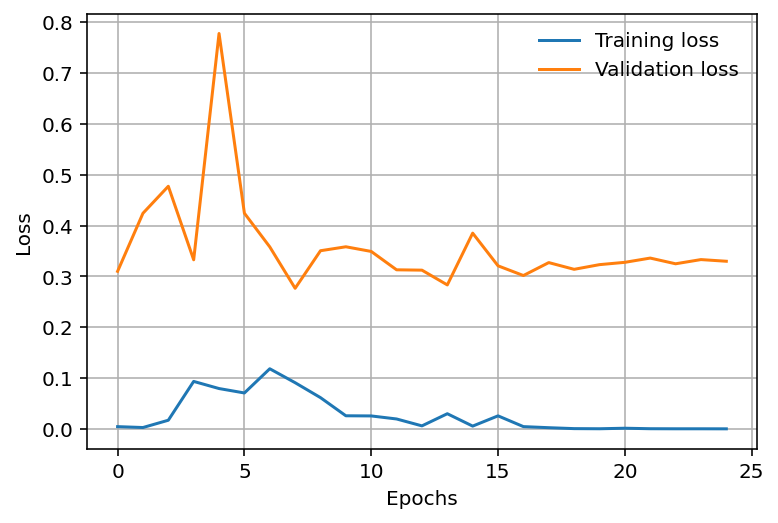

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

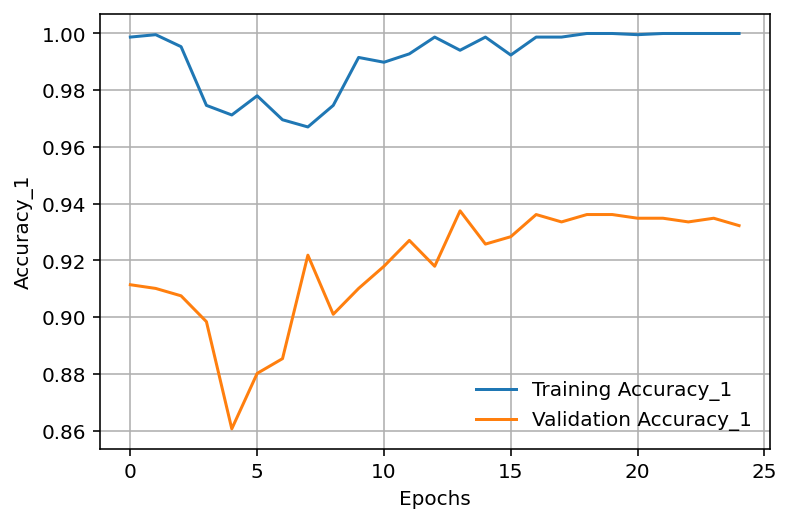

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_1, label='Training Accuracy_1')
plt.plot(valid_accs_1, label='Validation Accuracy_1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_1")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

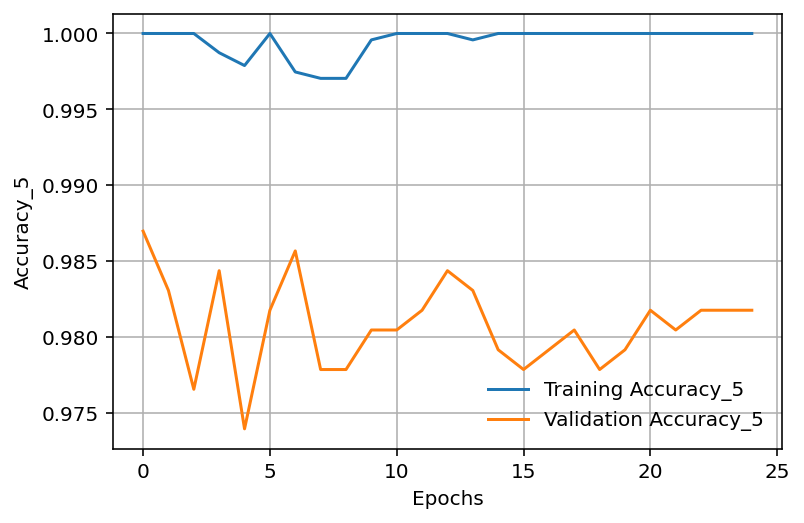

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_5, label='Training Accuracy_5')
plt.plot(valid_accs_5, label='Validation Accuracy_5')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_5")
plt.legend(frameon=False)

# Adding a grid
plt.grid()

# Displaying the plot
plt.show()

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/best-model/best-modelresnet128.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

In [ ]:
labels.unique()

tensor([0])

In [ ]:
len(probs)

810

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_resnet128.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/prediction_resnet128.csv')
predicted_csv.sample(20)

id  shirt-shortsleeve  sweatshirt-female  \
118   shirt-shortsleeve (338)       7.447707e-01       5.701624e-02   
753     sweatshirt-male (761)       6.703623e-04       1.446295e-02   
74   shirt-shortsleeve (1337)       1.000000e+00       7.331889e-15   
91    shirt-shortsleeve (194)       9.998976e-01       7.225726e-05   
52   shirt-shortsleeve (1239)       1.000000e+00       2.744304e-11   
662     sweatshirt-male (352)       4.187250e-02       5.423508e-01   
356  sweatshirt-female (1595)       6.342321e-05       9.994367e-01   
253   shirt-shortsleeve (918)       1.000000e+00       2.893831e-20   
545    sweatshirt-male (1021)       4.751359e-05       2.943207e-04   
30   shirt-shortsleeve (1107)       9.997165e-01       1.877753e-04   
689     sweatshirt-male (476)       7.129938e-03       3.783188e-01   
93     shirt-shortsleeve (20)       1.000000e+00       1.248440e-09   
557    sweatshirt-male (1070)       9.745316e-04       1.109882e-02   
75   shirt-shortsleeve (1339)       9.999996e-01       1.822276e-07   
272  sweatshirt-female (1027)       8.149272e-03       8.238472e-01   
197   shirt-shortsleeve (679)       9.999921e-01       4.942095e-06   
343  sweatshirt-female (1548)       8.217673e-11       1.000000e+00   
498   sweatshirt-female (704)       4.049018e-10       1.000000e+00   
731     sweatshirt-male (636)       1.383972e-02       2.176582e-01   
573    sweatshirt-male (1121)       1.583204e-04       1.253229e-03   

     sweatshirt-male  
118     1.982131e-01  
753     9.848667e-01  
74      2.072880e-15  
91      3.010916e-05  
52      1.141245e-11  
662     4.157767e-01  
356     4.998880e-04  
253     5.072769e-21  
545     9.996582e-01  
30      9.569639e-05  
689     6.145512e-01  
93      3.746516e-10  
557     9.879267e-01  
75      9.887436e-08  
272     1.680035e-01  
197     2.966353e-06  
343     1.129525e-19  
498     2.724943e-18  
731     7.685021e-01  
573     9.985884e-01

In [ ]:
test = pd.read_csv('C:/Users/22549275/OneDrive - MMU/Downloads/deep_assess/predictions/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

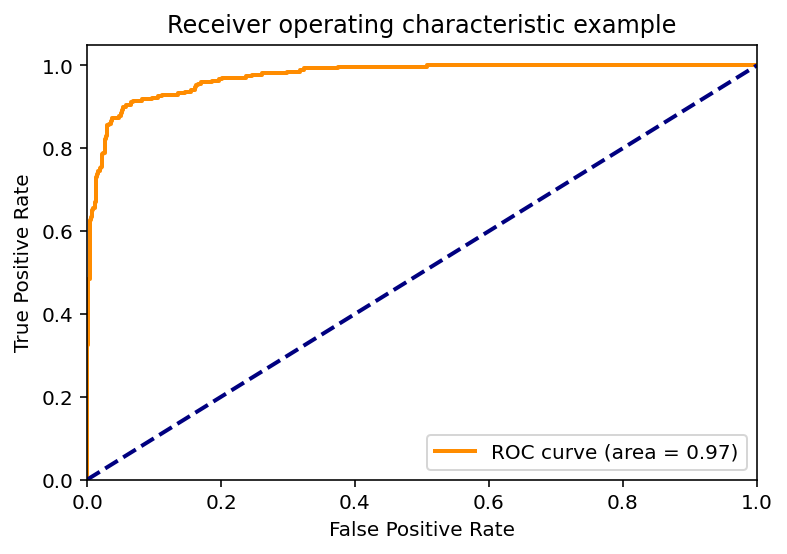

C:\Users\22549275\AppData\Local\Temp\ipykernel_6908\1555494331.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


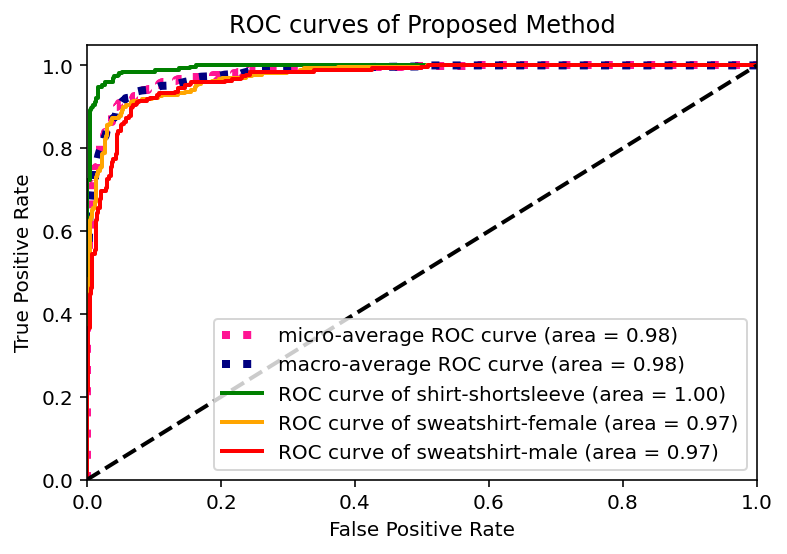

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

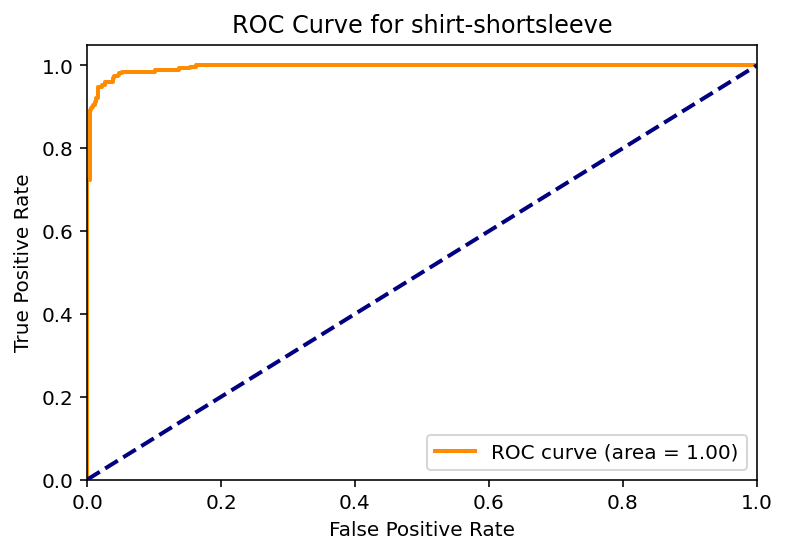

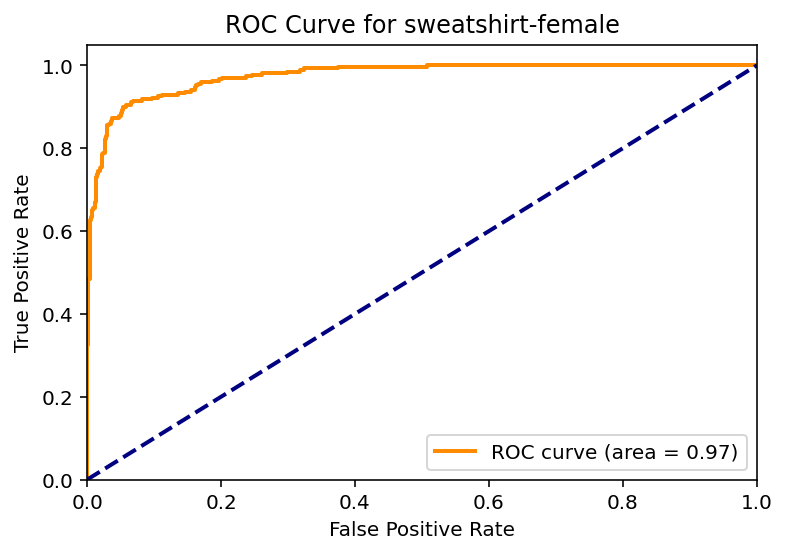

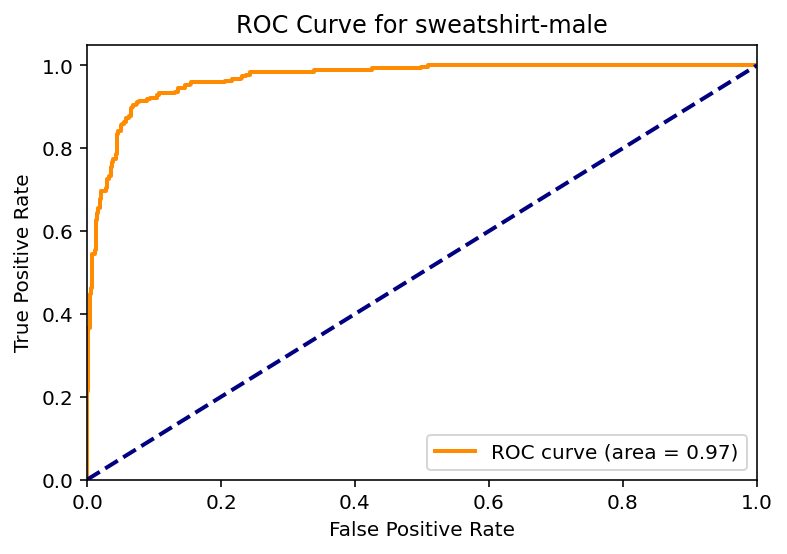

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
class_counts = np.unique(true_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[259   3   8]
 [  7 244  19]
 [ 11  30 229]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


(array([0, 1, 2]),
 [Text(0, 0, 'shirt-shortsleeve'),
  Text(1, 0, 'sweatshirt-female'),
  Text(2, 0, 'sweatshirt-male')])

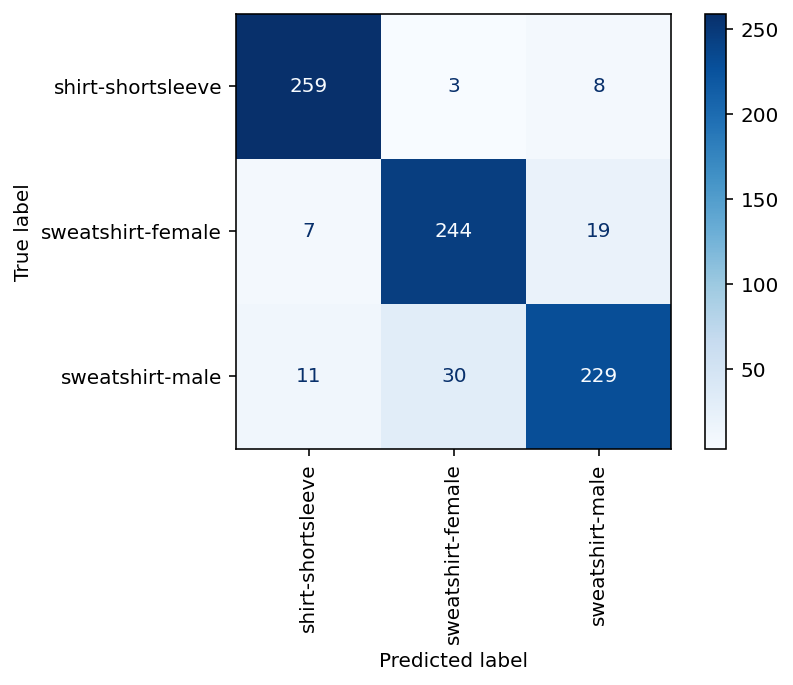

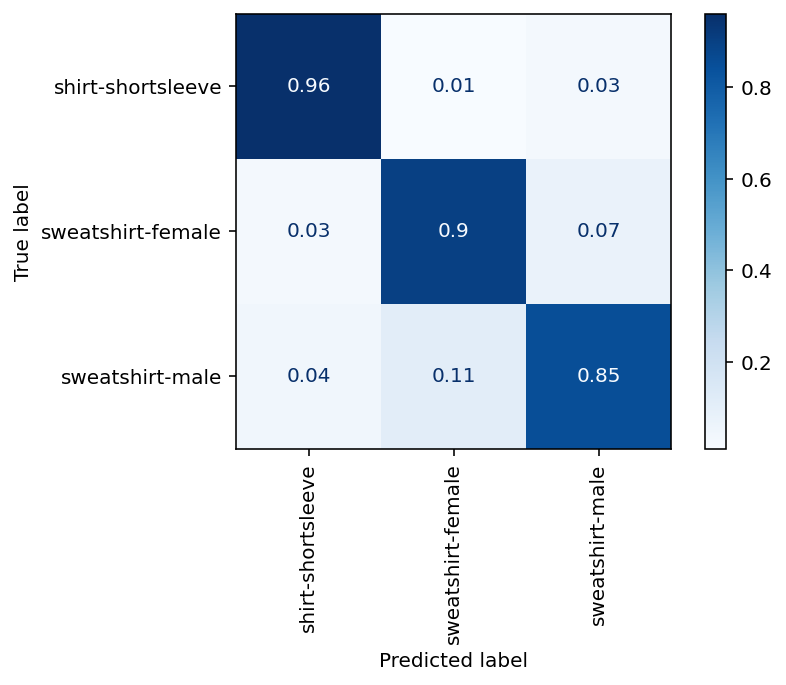

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
# Rotate x-axis tick labels
plt.xticks(rotation=90)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')
# Rotate x-axis tick labels
plt.xticks(rotation=90)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.94      0.96      0.95       270
sweatshirt-female       0.88      0.90      0.89       270
  sweatshirt-male       0.89      0.85      0.87       270

         accuracy                           0.90       810
        macro avg       0.90      0.90      0.90       810
     weighted avg       0.90      0.90      0.90       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.9037037037037037
